<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Order Delay prediction <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

* Lets import the required libraries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm
plt.rcParams['figure.figsize']=[25,9]


* Lets read the data and gather some basic informations about data

In [39]:
data=pd.read_csv("DataCoSupplyChainDataset.csv",encoding='ISO-8859-1')



In [40]:
data.shape

(180519, 53)

* we can conclude that we have 52 independent features and around 180519 observations

In [41]:
data.isnull().sum().sort_values(ascending=False).head()

Product Description    180519
Order Zipcode          155679
Customer Lname              8
Customer Zipcode            3
Type                        0
dtype: int64

* we can conclude that Product description and order zipcode has huge amount of null values and customer  zipcode and 
customer lname has neglegible amount of nullvalues

<AxesSubplot:>

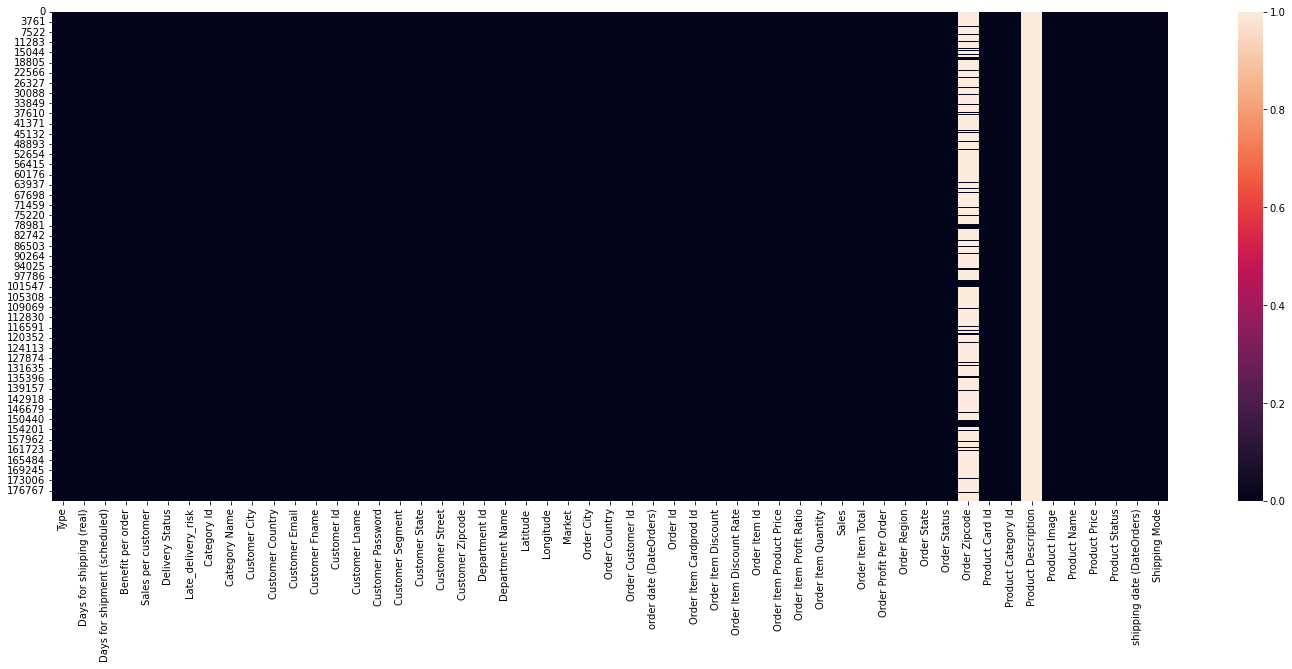

In [42]:
sns.heatmap(data.isnull())

In [43]:
((data.isnull().sum()/len(data))*100).sort_values(ascending=False).head()

Product Description    100.000000
Order Zipcode           86.239676
Customer Lname           0.004432
Customer Zipcode         0.001662
Type                     0.000000
dtype: float64

* product description has 100 percent values as null values

* lets load data dictionary

In [44]:
data_dictionary=pd.read_csv("DescriptionDataCoSupplyChain.csv")

In [45]:
pd.set_option('display.max_rows',None)

In [46]:
data_dictionary

FIELDS  \
0                            Type   
1   Days for shipping (real)        
2   Days for shipment (scheduled)   
3               Benefit per order   
4              Sales per customer   
5                 Delivery Status   
6   Late_delivery_risk              
7                     Category Id   
8                   Category Name   
9                   Customer City   
10               Customer Country   
11                 Customer Email   
12                 Customer Fname   
13                    Customer Id   
14                 Customer Lname   
15              Customer Password   
16               Customer Segment   
17                 Customer State   
18                Customer Street   
19               Customer Zipcode   
20                  Department Id   
21                Department Name   
22                       Latitude   
23                      Longitude   
24                         Market   
25                     Order City   
26                  Order Country   
27              Order Customer Id   
28        order date (DateOrders)   
29                       Order Id   
30         Order Item Cardprod Id   
31            Order Item Discount   
32  Order Item Discount Rate        
33                  Order Item Id   
34  Order Item Product Price        
35        Order Item Profit Ratio   
36            Order Item Quantity   
37                          Sales   
38             Order Item Total     
39         Order Profit Per Order   
40                   Order Region   
41                    Order State   
42                   Order Status   
43                Product Card Id   
44            Product Category Id   
45            Product Description   
46                  Product Image   
47                   Product Name   
48                  Product Price   
49                 Product Status   
50  Shipping date (DateOrders)      
51                  Shipping Mode   

                                          DESCRIPTION  
0                         :  Type of transaction made  
1    :  Actual shipping days of the purchased product  
2   :  Days of scheduled delivery of the purchased...  
3                        :  Earnings per order placed  
4       :  Total sales per customer made per customer  
5   :  Delivery status of orders: Advance shipping...  
6   :  Categorical variable that indicates if send...  
7                            :  Product category code  
8              :  Description of the product category  
9        :  City where the customer made the purchase  
10    :  Country where the customer made the purchase  
11                                :  Customer's email  
12                                   :  Customer name  
13                                     :  Customer ID  
14                               :  Customer lastname  
15                             :  Masked customer key  
16  :  Types of Customers: Consumer , Corporate , ...  
17  :  State to which the store where the purchase...  
18  :  Street to which the store where the purchas...  
19                                :  Customer Zipcode  
20                        :  Department code of store  
21                        :  Department name of store  
22     :  Latitude corresponding to location of store  
23    :  Longitude corresponding to location of store  
24  :  Market to where the order is delivered : Af...  
25                   :  Destination city of the order  
26                :  Destination country of the order  
27                             :  Customer order code  
28                 :  Date on which the order is made  
29                                      :  Order code  
30  :  Product code generated through the RFID reader  
31                       :  Order item discount value  
32                  :  Order item discount percentage  
33                                 :  Order item code  
34              :  Price of products without discount  
35                         :  Order Item Profit R

# Feature Analysis

# Univarient Analysis 
* lets analise features one by one

# Target Feature ::Late Delivery risk

In [47]:
data_dictionary.iloc[6,:]

FIELDS                             Late_delivery_risk           
DESCRIPTION    :  Categorical variable that indicates if send...
Name: 6, dtype: object

* as explained by data dictionary this feature contain a bi class categories in yes or no for late delivery risk

In [48]:
data['Late_delivery_risk'].unique()

array([0, 1], dtype=int64)

In [49]:
data['Late_delivery_risk'].value_counts()

1    98977
0    81542
Name: Late_delivery_risk, dtype: int64

In [50]:
data['Late_delivery_risk'].value_counts([0])

1    0.548291
0    0.451709
Name: Late_delivery_risk, dtype: float64

* as we show both class are almost equally distributed that is banificial for us
as we have sufficient amount of examples for both class,but it is challenge for 
company as company had to face late delivery risk in almost 54 percent of orders

([<matplotlib.patches.Wedge at 0x17a8cd36760>,
 [Text(-0.16624340273592472, 1.087365224313699, 'Yes'),
  Text(0.1662434027359248, -1.087365224313699, 'No')],
 [Text(-0.09067821967414075, 0.5931083041711086, '54.83'),
  Text(0.0906782196741408, -0.5931083041711086, '45.17')])

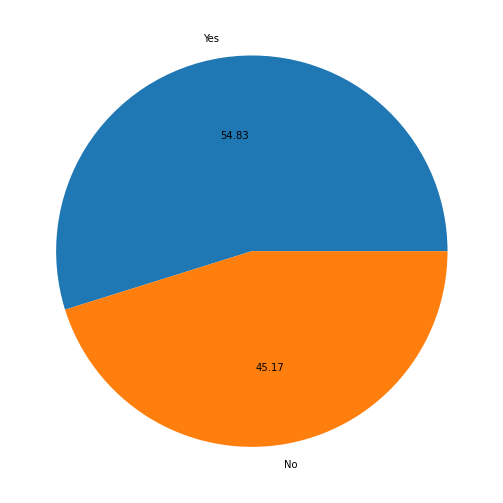

In [51]:
plt.pie(data['Late_delivery_risk'].value_counts(),labels=['Yes','No'],autopct='%0.2f')

In [52]:
significant_feature=pd.DataFrame(columns=['feature name','description','bivarient observation','statical test','business relevence'])

In [53]:
un_significant_feature=pd.DataFrame(columns=['feature name','description','bivarient observation','statical test','business relevence'])

# Feature 1 ::: Type

In [54]:
data.Type.describe()

count     180519
unique         4
top        DEBIT
freq       69295
Name: Type, dtype: object

* contain 4 unique categories ,debit is mode out of them which is repeated around 69295 times

In [55]:
data_dictionary.iloc[0,:]

FIELDS                                Type
DESCRIPTION    :  Type of transaction made
Name: 0, dtype: object

* as we seen from data dictionary type refer to types of transaction made by customer here,we will explore it more 

In [56]:
data.Type.value_counts()

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

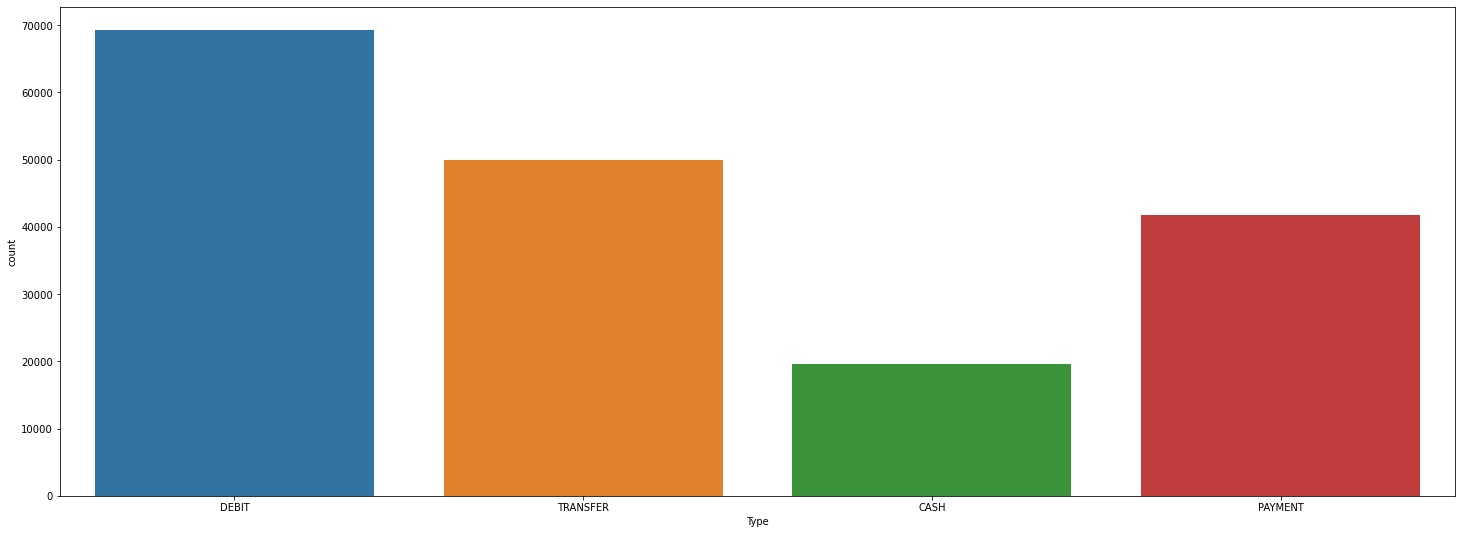

In [57]:
sns.countplot(data.Type)
plt.show()

* out of all four type of payment method the most used by customer is debit and least use by customer is cash

In [58]:
data.Type.value_counts([0])*100

DEBIT       38.386541
TRANSFER    27.633102
PAYMENT     23.113910
CASH        10.866446
Name: Type, dtype: float64

* 38 percent user use debit as transaction option,27 percent use transfer and only 10 percent use cash

# Bi varient Analysis

<AxesSubplot:xlabel='Type'>

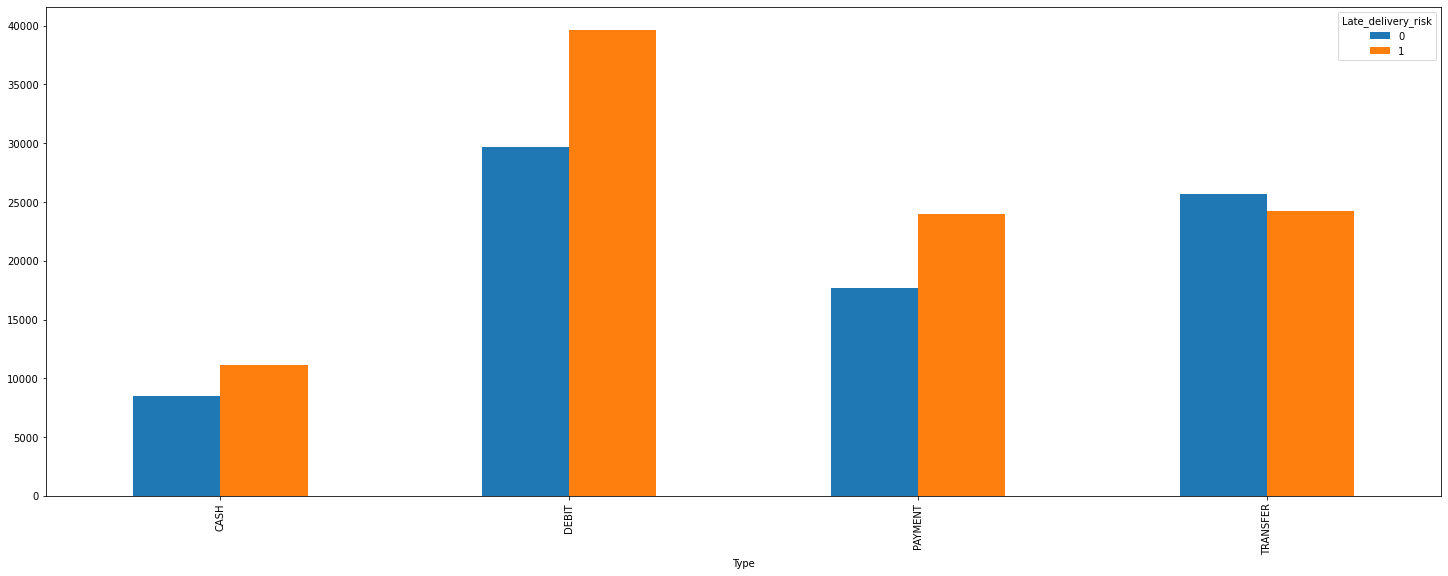

In [59]:
target=data['Late_delivery_risk']
table=pd.crosstab(data.Type,target)
table.plot(kind='bar')

* statistical test to check relation between 'Type and 'Target

In [60]:
# cat vs cat so we will go with chisquare


In [61]:
c, p, dof, expected = chi2_contingency(table)
p

5.128672571053333e-239

* p values is almost 0 so we can conclude that type has effect on target

In [62]:
significant_feature.loc[len(significant_feature.index)]=['Type','Type of transaction made','diffrent type of transaction have diffrent delay ratio','relevent according to chi_square','can not conclude']

# feature 2::: Days for shiping (real)

In [63]:
data['Days for shipping (real)'].head()

0    3
1    5
2    4
3    3
4    2
Name: Days for shipping (real), dtype: int64

In [64]:
data['Days for shipping (real)'].describe()

count    180519.000000
mean          3.497654
std           1.623722
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Days for shipping (real), dtype: float64

* we can see that minimuim value for this feautre is 0 and max is 6 and mean and median lies at 3 showing that 1 to 6 days
are taken in shiping

* lets see data defination to know what is there in data 

In [65]:
data_dictionary.iloc[1,:]

FIELDS                            Days for shipping (real)     
DESCRIPTION    :  Actual shipping days of the purchased product
Name: 1, dtype: object

* as mention in the data dictionary this feature contain detail of actual days taken in shiping of purchased product

In [66]:
data['Days for shipping (real)'].unique()

array([3, 5, 4, 2, 6, 0, 1], dtype=int64)

In [67]:
data['Days for shipping (real)'].value_counts().sort_values(ascending=False)

2    56618
3    28765
6    28723
4    28513
5    28163
0     5080
1     4657
Name: Days for shipping (real), dtype: int64

In [68]:
(data['Days for shipping (real)'].value_counts([0])*100).sort_values(ascending=False)

2    31.364012
3    15.934611
6    15.911345
4    15.795013
5    15.601128
0     2.814108
1     2.579784
Name: Days for shipping (real), dtype: float64

* we can conclude that max days taken on shiping is around 6 we can say that in 31 percent of order placed time taken to 
ship the product is 2 days, and in 2 percent cases item is shipped on same day of order place same for 1 day 2 percent 
item are shiped on 1 day after order and each of 3,4,5,6 days are taken by 15 percent of item each


([<matplotlib.patches.Wedge at 0x17a94bb0d30>,
 [Text(0.6078473830742207, 0.9167996285393127, 'Day 3'),
  Text(-0.8619762313989906, 0.683371770344074, 'Day 5'),
  Text(-1.040597708426081, -0.3565899735247606, 'Day 4'),
  Text(-0.26635799229789536, -1.0672644564207292, 'Day 2'),
  Text(0.7431486799809056, -0.8110055730034398, 'Day 6'),
  Text(1.0656673617626635, -0.2726776009755926, 'Day 0'),
  Text(1.096389305810112, -0.08905329923826967, 'Day 1')],
 [Text(0.331553118040484, 0.5000725246578068, '31.36'),
  Text(-0.4701688534903585, 0.3727482383694949, '15.93'),
  Text(-0.5675987500505895, -0.19450362192259665, '15.91'),
  Text(-0.14528617761703383, -0.5821442489567613, '15.80'),
  Text(0.4053538254441303, -0.44236667618369435, '15.60'),
  Text(0.5812731064159983, -0.14873323689577778, '2.81'),
  Text(0.5980305304418793, -0.048574526857238, '2.58')])

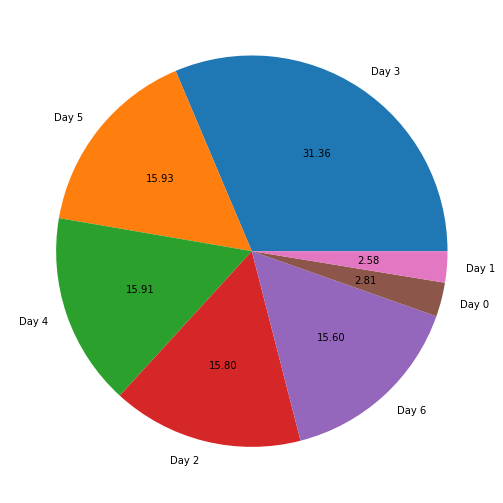

In [69]:
plt.pie(data['Days for shipping (real)'].value_counts(),labels=['Day 3','Day 5','Day 4','Day 2','Day 6','Day 0','Day 1'],autopct='%0.2f')

In [70]:
data['Days for shipping (real)'].value_counts()

2    56618
3    28765
6    28723
4    28513
5    28163
0     5080
1     4657
Name: Days for shipping (real), dtype: int64

<AxesSubplot:xlabel='Days for shipping (real)', ylabel='count'>

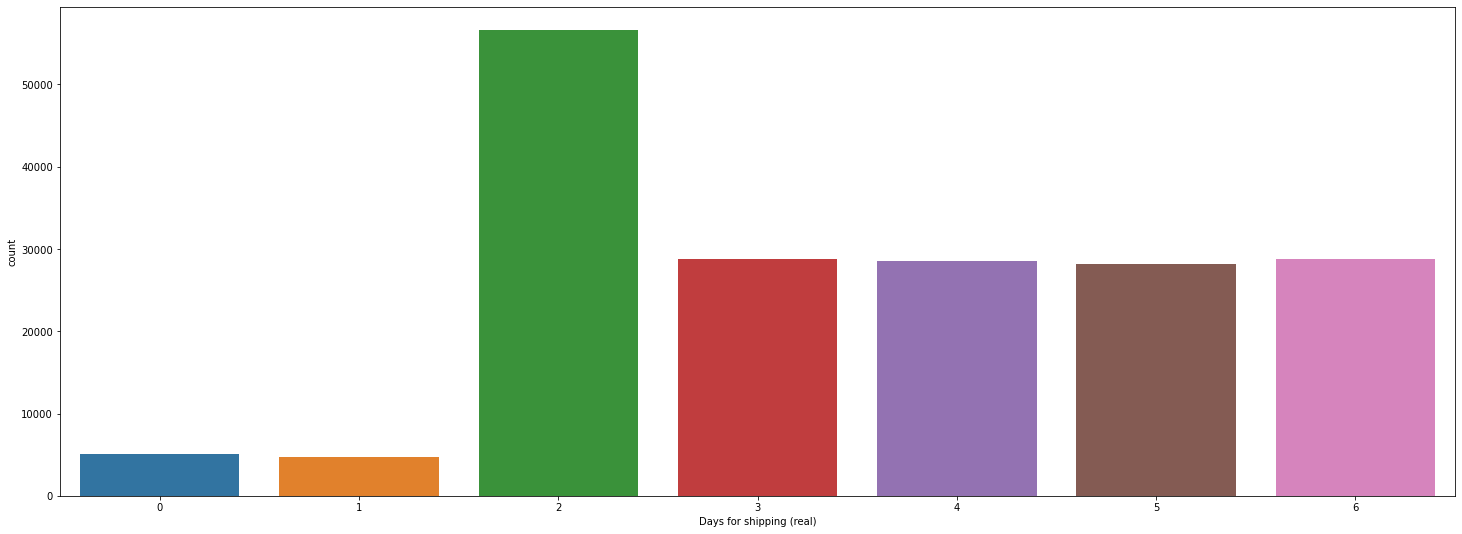

In [71]:
sns.countplot(data['Days for shipping (real)'])

# Bi - Varient Analysis

In [72]:
tbl=pd.crosstab( data['Days for shipping (real)'] ,target)

<AxesSubplot:xlabel='Days for shipping (real)'>

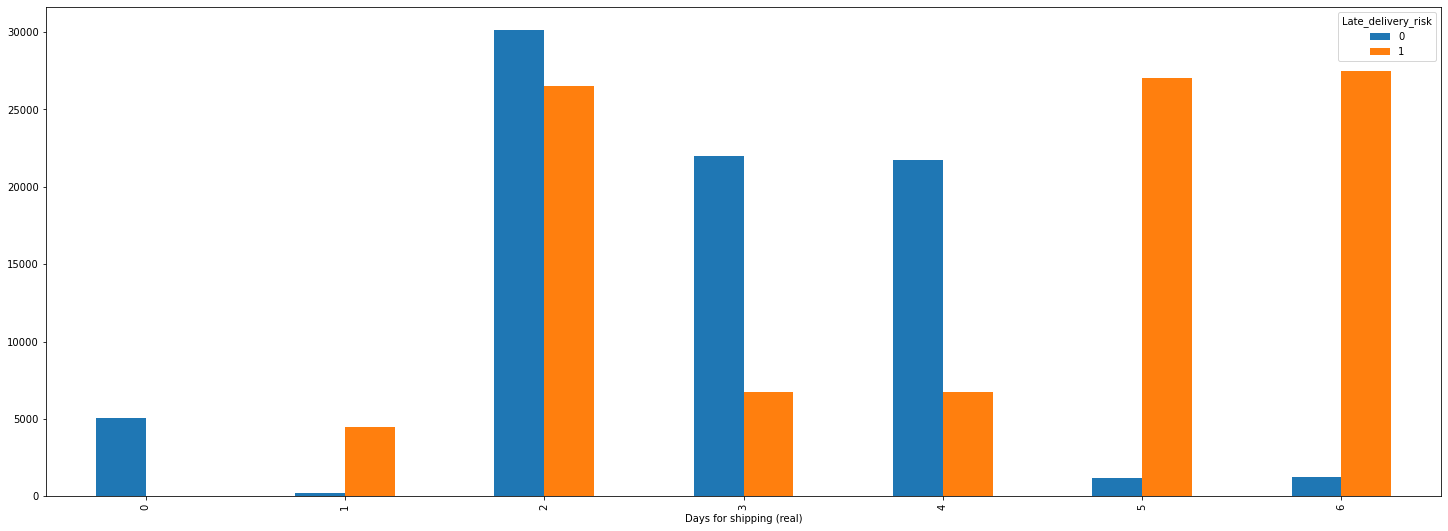

In [73]:
tbl.plot(kind='bar')

In [74]:
#Statistical test:we,ll be applying chi2 contingency test


c, p, dof, expected = chi2_contingency(tbl)
p



0.0

*Inference:It is statistically proven that data['Days for shipping (real)'] has effect on the target as p value is
    less than 0.05
    

In [75]:
significant_feature.loc[len(significant_feature.index)]=['Days for shipping (real)','Days of actual shipping of the purchased','orders having more shipping day are mostly delayed','relevent according to chi2 ','more shipping day effect delay']

# Feature 3 :: Days for shipment (scheduled)

In [76]:
data['Days for shipment (scheduled)'].head()

0    4
1    4
2    4
3    4
4    4
Name: Days for shipment (scheduled), dtype: int64

In [77]:
data['Days for shipment (scheduled)'].describe()

count    180519.000000
mean          2.931847
std           1.374449
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           4.000000
Name: Days for shipment (scheduled), dtype: float64

* we can see that minimuim value for this feautre is 0 and max is 4 and mean is 3 and median lies at 4 and showing 
that 1 to 4 days are pridicted for shiping where as we see in last feature that actual time is more

* lets refer to data dictionary

In [78]:
data_dictionary.iloc[2,:]

FIELDS                             Days for shipment (scheduled)
DESCRIPTION    :  Days of scheduled delivery of the purchased...
Name: 2, dtype: object

* as mention in the data dictionary this feature contain detail of pridicted days taken in shiping of purchased product

In [79]:
data['Days for shipment (scheduled)'].unique()

array([4, 1, 2, 0], dtype=int64)

In [80]:
data['Days for shipment (scheduled)'].value_counts().sort_values(ascending=False)

4    107752
2     35216
1     27814
0      9737
Name: Days for shipment (scheduled), dtype: int64

In [81]:
(data['Days for shipment (scheduled)'].value_counts([0])*100).sort_values(ascending=False)

4    59.690116
2    19.508196
1    15.407796
0     5.393892
Name: Days for shipment (scheduled), dtype: float64

* we can conclude that max days pridicted on shiping is around 4 we can say that in 59.69 percent of order placed predicted time
taken to ship the product is 4 days, and in 5 percent cases item is predicted toshipped on same day of order place
1 and 2 day are predicted around 15 se 20 percent 


<AxesSubplot:xlabel='Days for shipment (scheduled)', ylabel='count'>

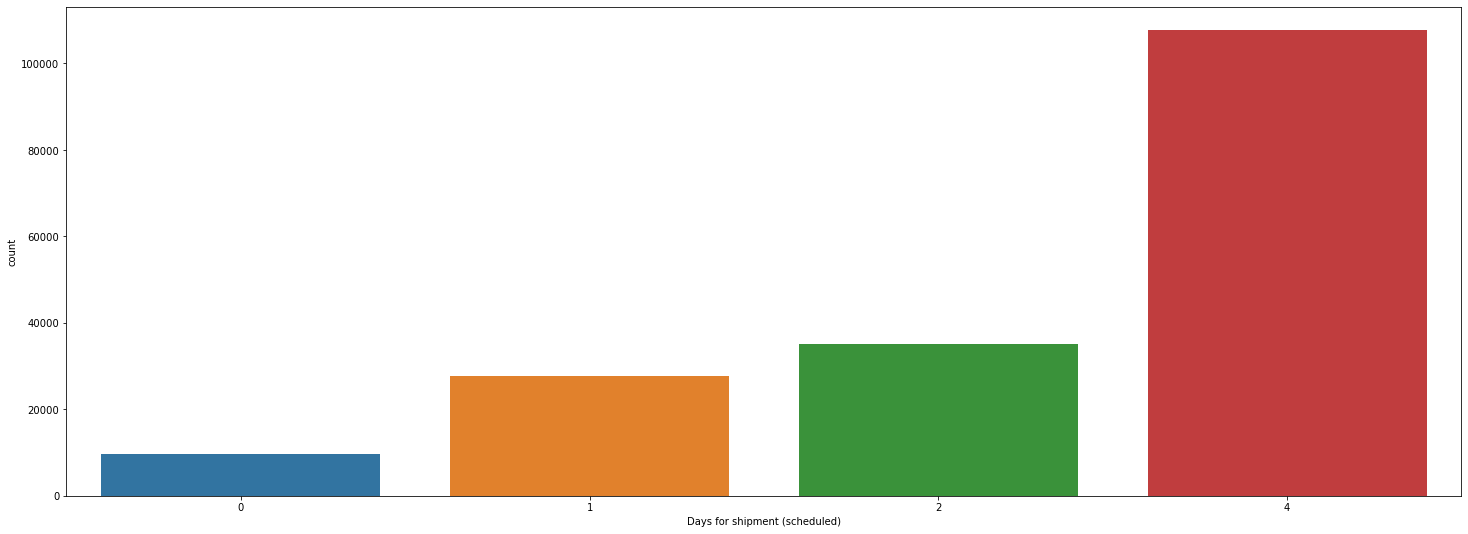

In [82]:
sns.countplot(data['Days for shipment (scheduled)'])

* in most of cases pridicted shiping days are 4 and company only pridict 0,1,2 and 4 days

# Bi-Varient Analysis

In [83]:
tbl=pd.crosstab( data['Days for shipment (scheduled)'] ,target)

<AxesSubplot:xlabel='Days for shipment (scheduled)'>

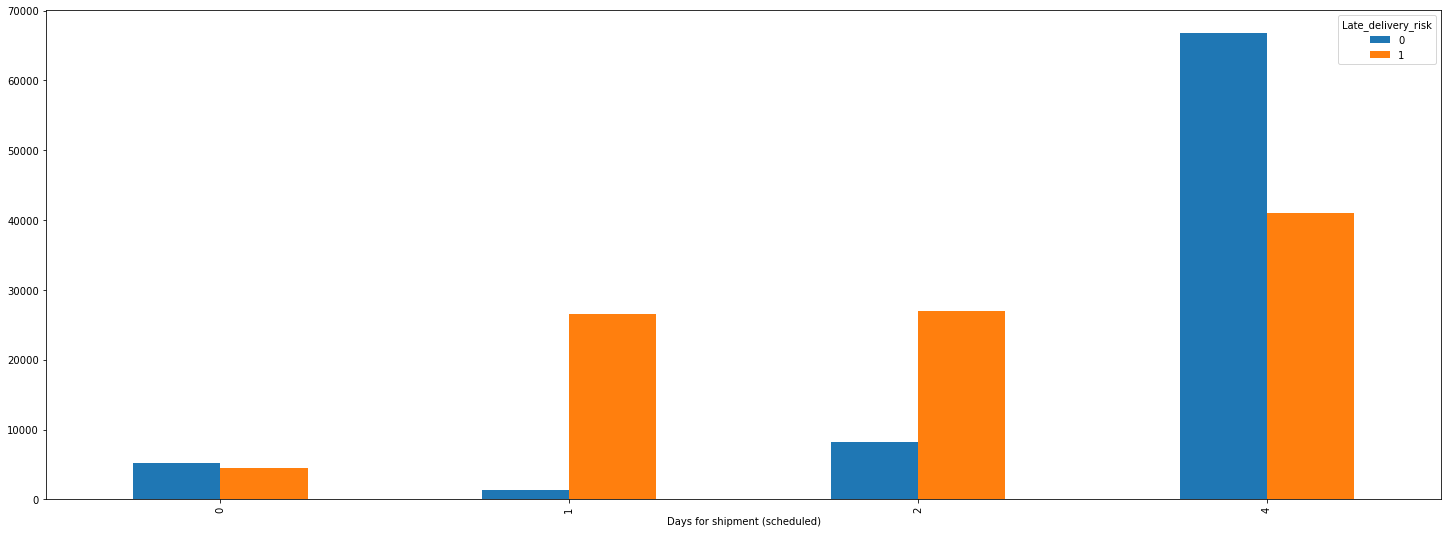

In [84]:
tbl.plot.bar()

In [85]:
#Statistical test:we,ll be applying chi2 contingency


c, p, dof, expected = chi2_contingency(tbl)
p

0.0

*Inference:It is statistically proven that "data['Days for shipment (scheduled)']" has effect on the target as p value is
    less than 0.05

In [86]:
significant_feature.loc[len(significant_feature.index)]=['Days for shipment (scheduled)','Days of scheduled shipping of the purchased','sheduled shipping day 1 or 2 are prone to delay','relevent according to chi2','shipping day sheduled  impact business']

In [87]:
significant_feature

feature name                                  description  \
0                           Type                     Type of transaction made   
1       Days for shipping (real)     Days of actual shipping of the purchased   
2  Days for shipment (scheduled)  Days of scheduled shipping of the purchased   

                               bivarient observation  \
0  diffrent type of transaction have diffrent del...   
1  orders having more shipping day are mostly del...   
2    sheduled shipping day 1 or 2 are prone to delay   

                      statical test                      business relevence  
0  relevent according to chi_square                        can not conclude  
1       relevent according to chi2           more shipping day effect delay  
2        relevent according to chi2  shipping day sheduled  impact business

# feature 4:: 'Benefit per order'

In [88]:
data['Benefit per order'].head()

0     91.250000
1   -249.089996
2   -247.779999
3     22.860001
4    134.210007
Name: Benefit per order, dtype: float64

In [89]:
data['Benefit per order'].describe()

count    180519.000000
mean         21.974989
std         104.433526
min       -4274.979980
25%           7.000000
50%          31.520000
75%          64.800003
max         911.799988
Name: Benefit per order, dtype: float64

<AxesSubplot:xlabel='Benefit per order', ylabel='Density'>

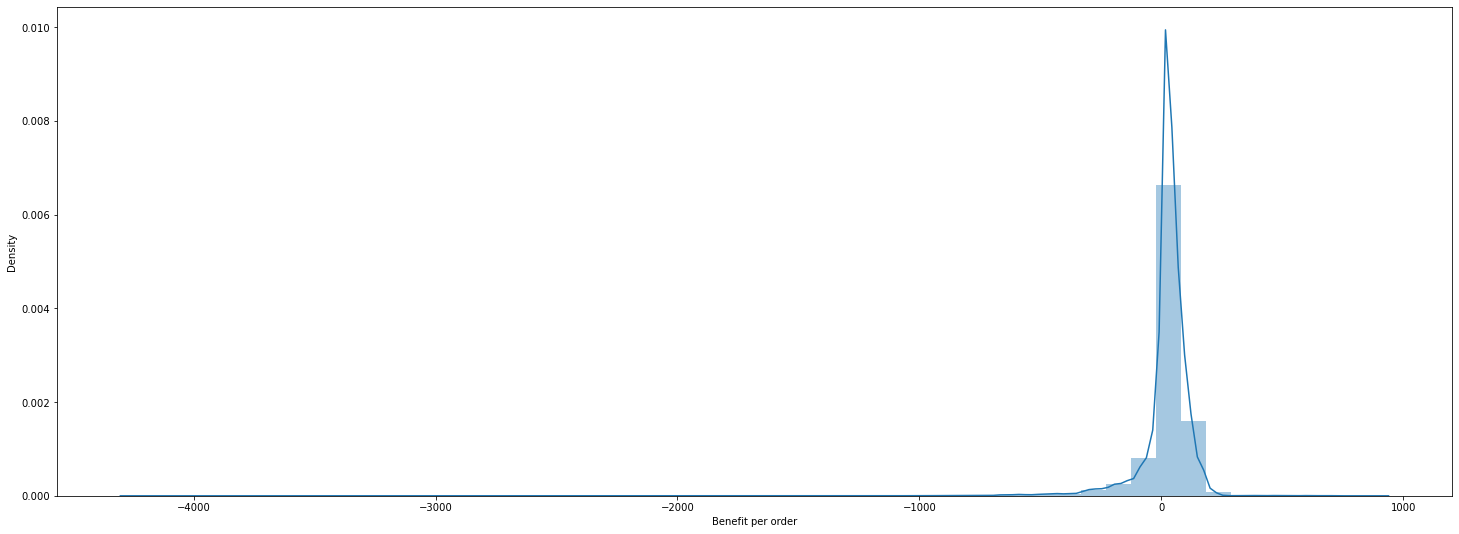

In [90]:
sns.distplot(data['Benefit per order']) # left skewed outliers are present

* lets refer to the data defination

In [91]:
data_dictionary.iloc[3,:]

FIELDS                    Benefit per order
DESCRIPTION    :  Earnings per order placed
Name: 3, dtype: object

* as we see from data defination this feature contain earning of each order placed by customers

* consist of positive and negetive entries may be profit and loss

In [92]:
data['Benefit per order'][data['Benefit per order']<0]

1         -249.089996
2         -247.779999
15        -259.579987
16        -246.360001
28         -17.139999
33         -97.339996
34        -425.579987
48         -30.750000
49        -122.730003
53         -21.750000
59        -184.779999
61          -3.650000
75        -285.070007
79         -26.690001
80        -117.330002
96         -23.629999
109       -140.000000
110        -32.599998
112        -11.810000
117        -79.190002
121        -18.809999
125       -783.669983
127       -269.970001
128        -22.500000
135       -239.860001
136       -155.899994
145        -50.580002
158       -277.670013
179        -13.580000
188       -284.529999
192        -24.820000
195        -76.370003
199        -12.990000
202         -2.190000
205       -266.790008
212       -145.130005
216       -459.000000
217       -248.000000
221       -261.440002
224        -76.669998
226        -82.010002
240         -6.170000
247       -184.259995
254        -29.379999
256       -105.779999
262       

*  we can conclude that 33784 obervation are negetive and rest are positive 

In [93]:
data['Benefit per order'][data['Benefit per order']<0].sum()

-3883547.345768667

In [94]:
data['Benefit per order'][data['Benefit per order']>0].sum()

7850450.319819024

* we have analyse that company suffer a suffcient amount of loss in many orders

In [95]:
data['Benefit per order'].min() # height loss suffered by factory on any order is of amount 4274 

-4274.97998

In [96]:
data['Benefit per order'].dtypes

dtype('float64')

<AxesSubplot:xlabel='Benefit per order'>

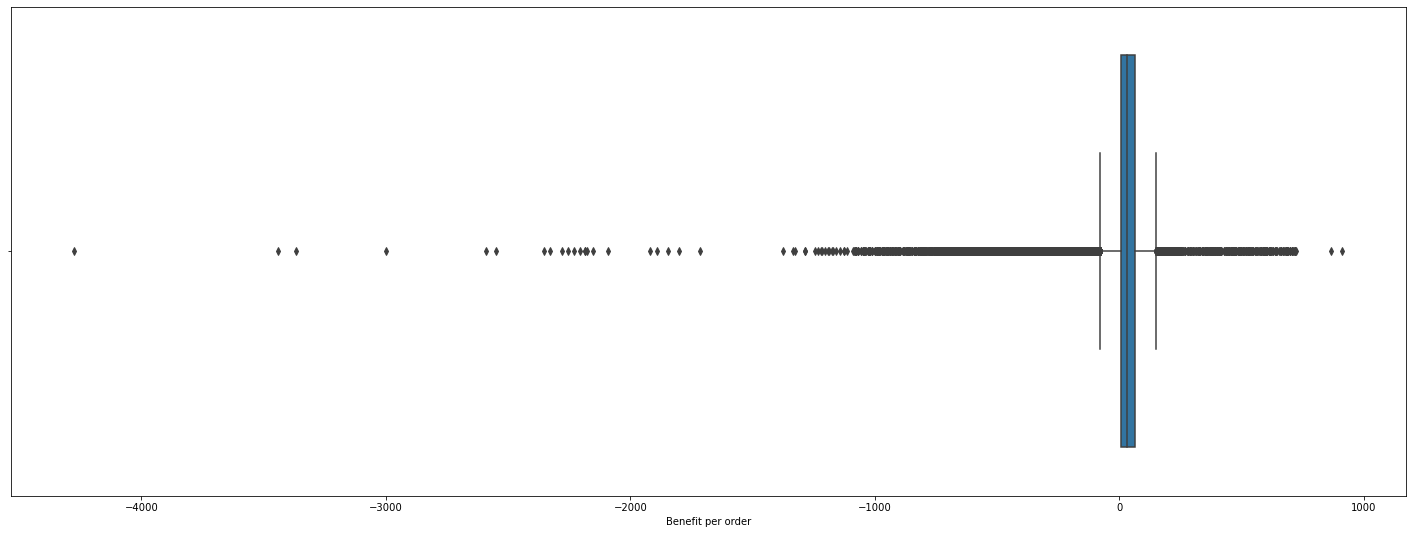

In [97]:
sns.boxplot(data['Benefit per order'])# huge amount of outliers on both side of central tendancy

# Bi Varient Analysis

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Benefit per order'>

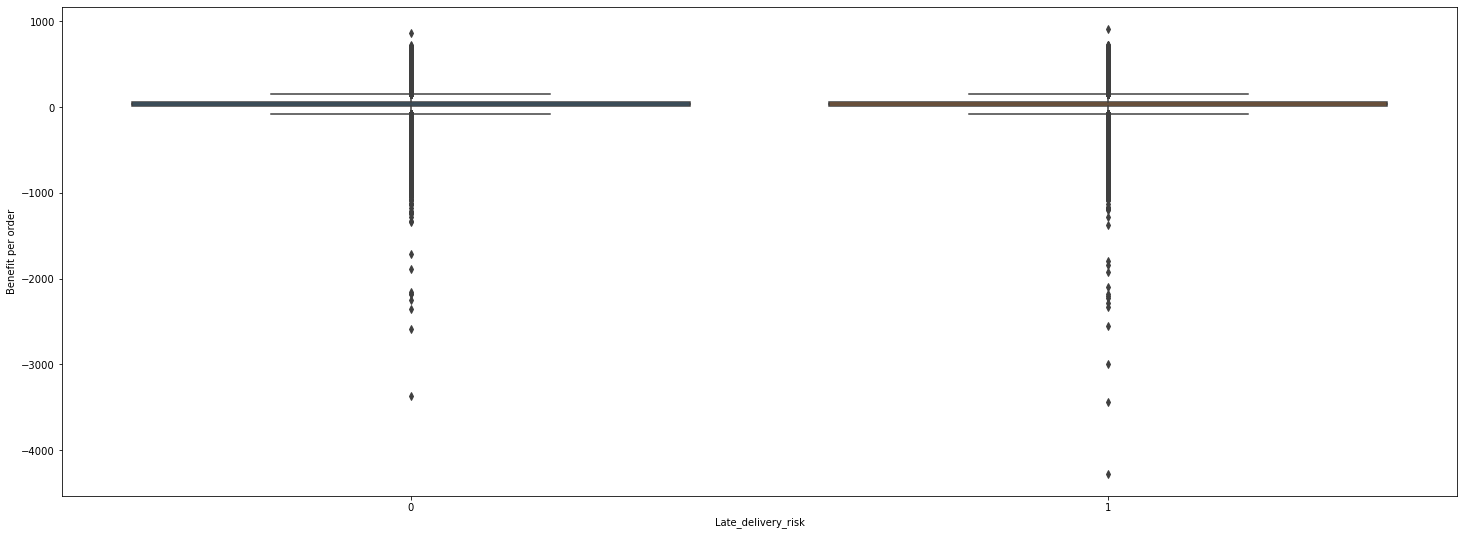

In [98]:
sns.boxplot(x=target,y =data['Benefit per order'] )

In [99]:
#Statistical test:we,ll be applying annova lm


model = sfa.ols("data['Benefit per order']~target",data=data).fit()
#annova table
print(anova_lm(model))

                df        sum_sq       mean_sq         F    PR(>F)
target         1.0  2.734754e+04  27347.540691  2.507506  0.113307
Residual  180517.0  1.968767e+09  10906.270222       NaN       NaN


* p values of benifit per order is almost 11 percent showing that benifit per order has insignificant
impact on target

In [63]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Benefit per order','Earnings per order placed','it displays positive and negative values','unrelevant according to anova_lm','no relevance on delay']

# feature 5:Sales per customer

In [64]:
data['Sales per customer'].head()

0    314.640015
1    311.359985
2    309.720001
3    304.809998
4    298.250000
Name: Sales per customer, dtype: float64

In [65]:
data['Sales per customer'].describe()

count    180519.000000
mean        183.107609
std         120.043670
min           7.490000
25%         104.379997
50%         163.990005
75%         247.399994
max        1939.989990
Name: Sales per customer, dtype: float64

In [66]:
data["Sales per customer"].describe()

count    180519.000000
mean        183.107609
std         120.043670
min           7.490000
25%         104.379997
50%         163.990005
75%         247.399994
max        1939.989990
Name: Sales per customer, dtype: float64

<AxesSubplot:xlabel='Sales per customer', ylabel='Density'>

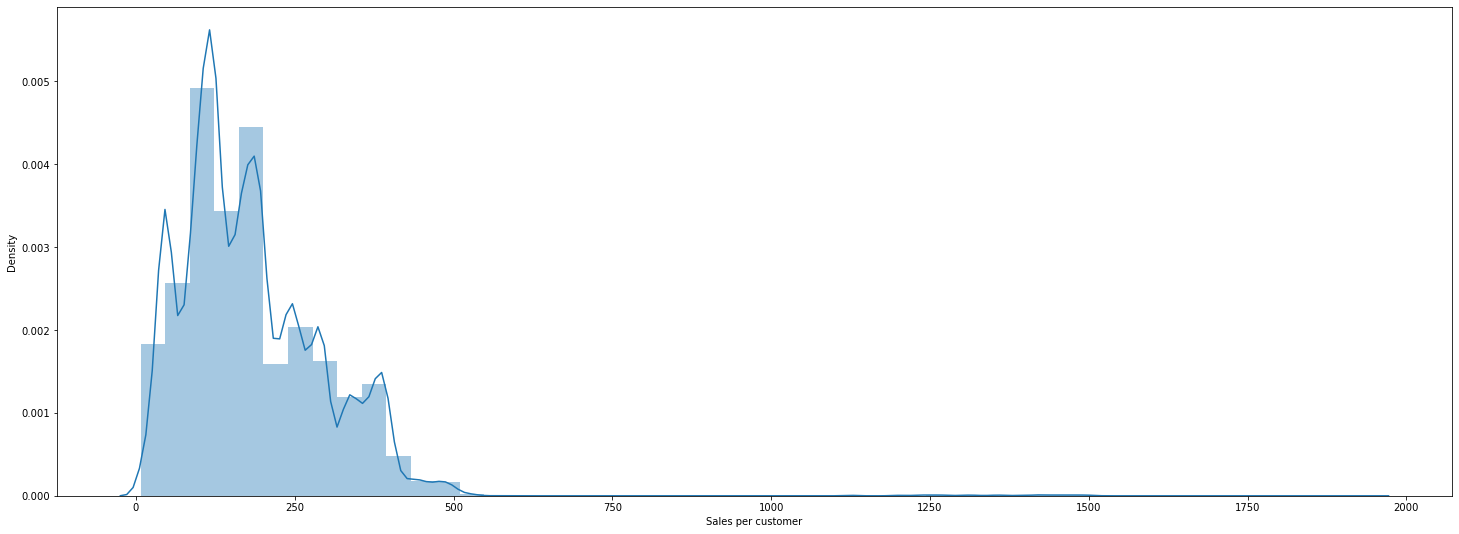

In [67]:
sns.distplot(data['Sales per customer'])# right skewed outliers are present

* lets refer to data dictionary

In [68]:
data_dictionary.iloc[4,:]

FIELDS                                    Sales per customer
DESCRIPTION    :  Total sales per customer made per customer
Name: 4, dtype: object

* as we see from data defination this feature contain total sale  of all order placed by per customers

In [69]:
data["Sales per customer"].min()

7.489999771

In [70]:
data["Sales per customer"].max()

1939.98999

<AxesSubplot:xlabel='Sales per customer'>

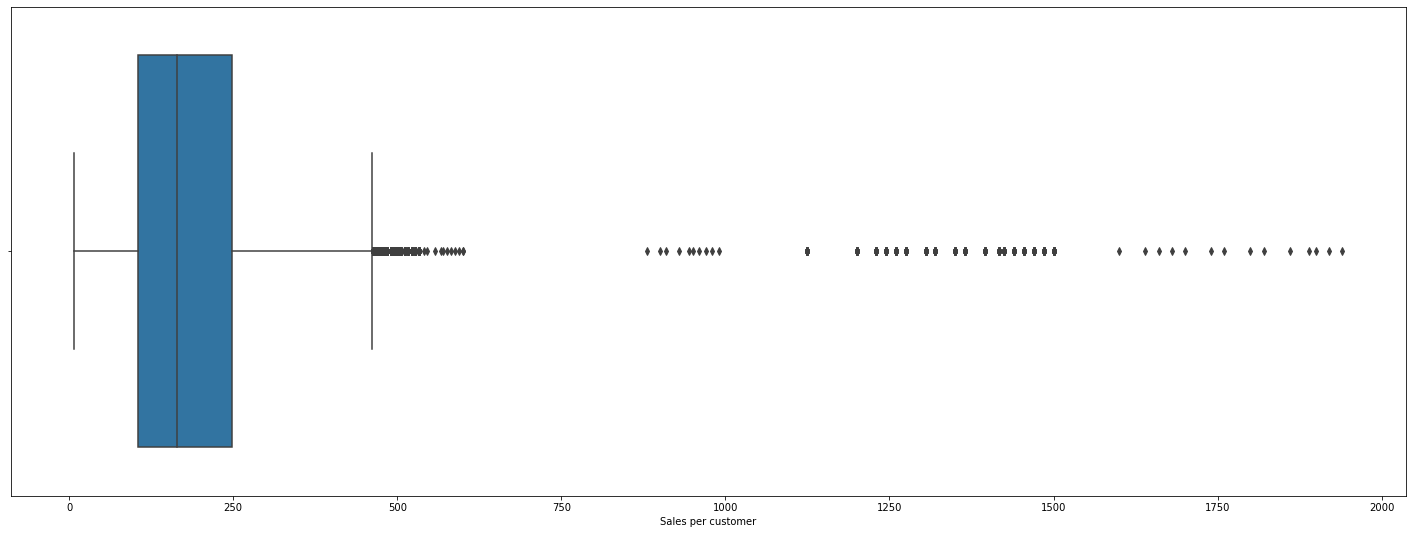

In [71]:
sns.boxplot(data['Sales per customer'])# huge amount of outliers are also present

# Bi_Varient Analysis

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Sales per customer'>

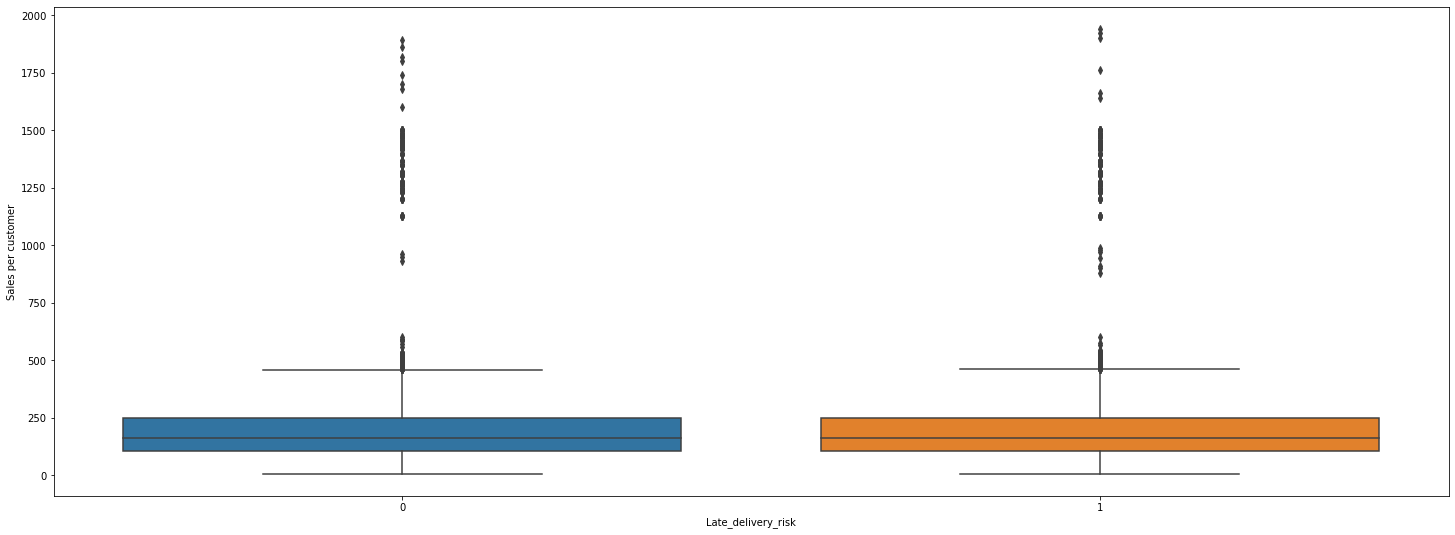

In [72]:
sns.boxplot(x=target,y =data['Sales per customer'] )

In [73]:
#Statistical test:we,ll be applying annova lm


model = sfa.ols("target~data['Sales per customer']",data=data).fit()
#annova table
print(anova_lm(model))

                                  df        sum_sq   mean_sq         F  \
data['Sales per customer']       1.0      0.642629  0.642629  2.594728   
Residual                    180517.0  44708.127827  0.247667       NaN   

                              PR(>F)  
data['Sales per customer']  0.107222  
Residual                         NaN  


* p values of sales per customer is almost 11 percent showing that benifit per order has insignificant
impact on target

In [74]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Sales per customer','Total sales per customer ','it displays uniform distribution','unrelevant according to anova_lm','no relevance on delay']

In [75]:
un_significant_feature

feature name                description  \
0   Benefit per order  Earnings per order placed   
1  Sales per customer  Total sales per customer    

                      bivarient observation                     statical test  \
0  it displays positive and negative values  unrelevant according to anova_lm   
1          it displays uniform distribution  unrelevant according to anova_lm   

      business relevence  
0  no relevance on delay  
1  no relevance on delay

# feature 6 :: Delivery status

In [76]:
data_dictionary.iloc[5,:]

FIELDS                                           Delivery Status
DESCRIPTION    :  Delivery status of orders: Advance shipping...
Name: 5, dtype: object

* this feature consist of different delivery status of orders placed by customers

In [77]:
data['Delivery Status'].head()

0    Advance shipping
1       Late delivery
2    Shipping on time
3    Advance shipping
4    Advance shipping
Name: Delivery Status, dtype: object

In [78]:
data['Delivery Status'].describe()

count            180519
unique                4
top       Late delivery
freq              98977
Name: Delivery Status, dtype: object

* 4 unique delivery status with model of late delivery

In [79]:
data['Delivery Status'].value_counts().sort_values(ascending=False)

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

In [80]:
data['Delivery Status'].value_counts([0]).sort_values(ascending=False)

Late delivery        0.548291
Advance shipping     0.230402
Shipping on time     0.178352
Shipping canceled    0.042954
Name: Delivery Status, dtype: float64

* almost 54 percent delivery are late from estimated time of delivery where as 23 percent delivery are advanced shiping

<AxesSubplot:xlabel='Delivery Status', ylabel='count'>

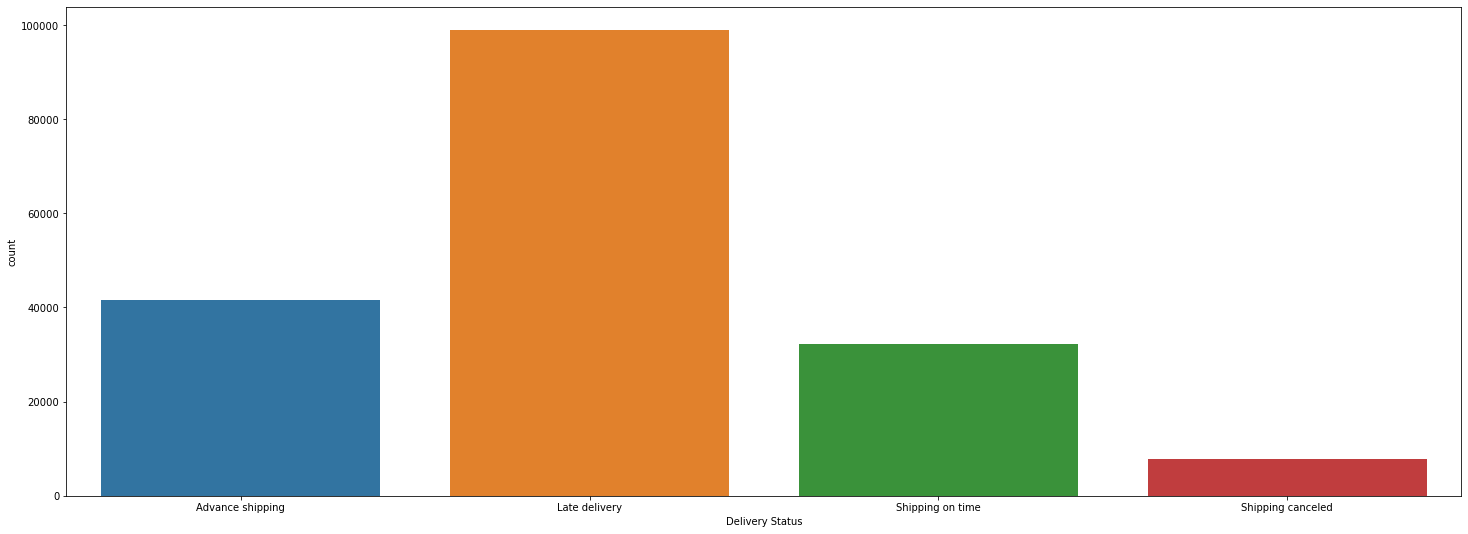

In [81]:
sns.countplot(data['Delivery Status'])

# Bi-Varient Analysis

<AxesSubplot:xlabel='Delivery Status'>

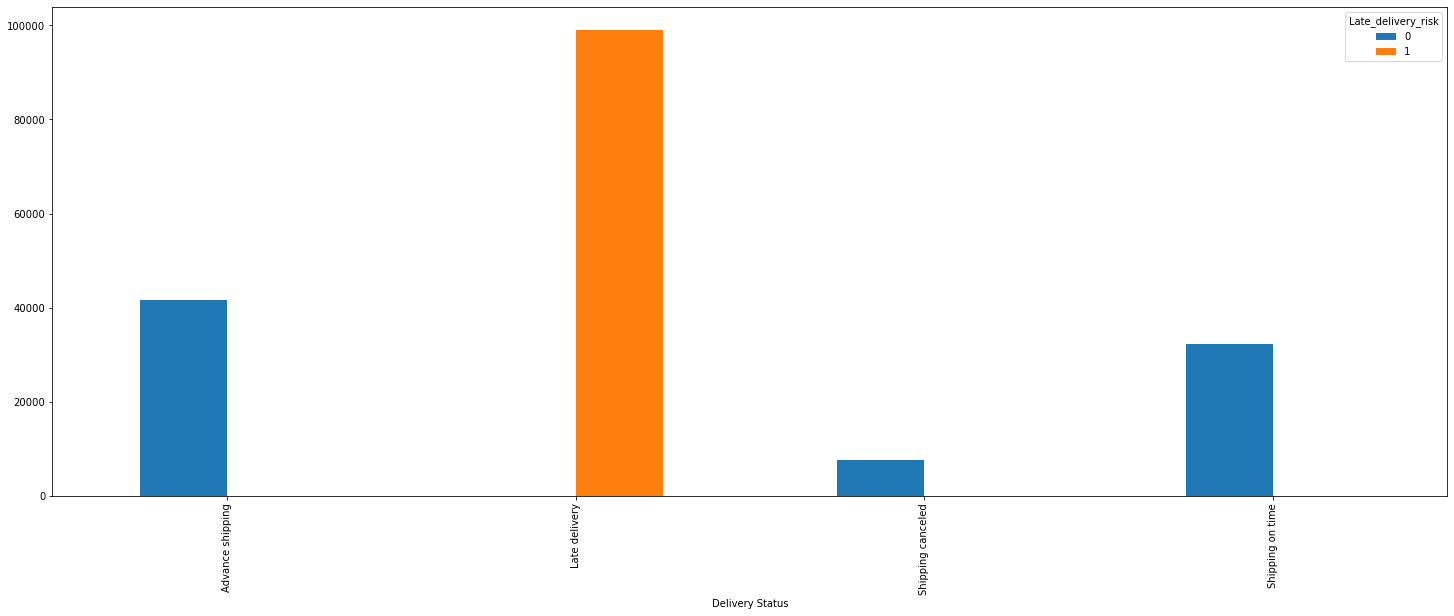

In [82]:
table=pd.crosstab(data['Delivery Status'],target)
table.plot(kind='bar')

In [83]:
# cat vs cat so we will go with chisquare
c, p, dof, expected = chi2_contingency(table)
p

0.0

* p value is 0 show that delivey status has good impact on late delivery

In [84]:
significant_feature.loc[len(significant_feature.index)]=['Delivery Status','Delivery status of orders','late delivery in Delivery Status have more late delivery risk','relevent according to chi2','Delivery Status have impact on business']

In [85]:
significant_feature

feature name                                  description  \
0                           Type                     Type of transaction made   
1       Days for shipping (real)     Days of actual shipping of the purchased   
2  Days for shipment (scheduled)  Days of scheduled shipping of the purchased   
3                Delivery Status                    Delivery status of orders   

                               bivarient observation  \
0  diffrent type of transaction have diffrent del...   
1  orders having more shipping day are mostly del...   
2    sheduled shipping day 1 or 2 are prone to delay   
3  late delivery in Delivery Status have more lat...   

                      statical test                       business relevence  
0  relevent according to chi_square                         can not conclude  
1       relevent according to chi2            more shipping day effect delay  
2        relevent according to chi2   shipping day sheduled  impact business  
3        relevent according to chi2  Delivery Status have impact on business

# feature 7 :: Category Id

In [86]:
data_dictionary.iloc[7,:]

FIELDS                      Category Id
DESCRIPTION    :  Product category code
Name: 7, dtype: object

* as we seen from data dictionary it contain product category code 

In [87]:
data['Category Id'].unique()

array([73, 17, 29, 24, 13, 12,  9, 41, 37, 38, 44,  3, 18, 43, 65, 62, 64,
        4,  2, 26, 40, 76, 66, 70,  6, 11, 16, 36, 10, 63,  5, 60, 45, 59,
       67, 61, 68,  7, 72, 69, 71, 75, 35, 34, 33, 32, 31, 30, 74, 48, 46],
      dtype=int64)

* as we have notice this id contain unique product category id for different type of products

In [88]:
len(data['Category Id'].unique())# contain 51 unique values

51

In [89]:
data['Category Id'].value_counts().sort_values(ascending=False)

17    24551
18    22246
24    21035
46    19298
45    17325
48    15540
43    13729
9     12487
29    10984
37     2029
40     1780
36     1475
26     1201
13     1127
35     1070
41      974
75      838
63      652
76      650
3       632
7       614
62      592
74      529
33      524
72      492
68      484
66      484
67      483
64      442
32      441
44      440
71      434
65      431
12      423
59      405
38      384
69      362
73      357
5       343
6       328
11      309
30      283
61      271
70      208
60      207
31      181
2       138
10      111
16       68
4        67
34       61
Name: Category Id, dtype: int64

In [90]:
data['Category Id'].value_counts([0]).sort_values(ascending=False)

17    0.136002
18    0.123234
24    0.116525
46    0.106903
45    0.095973
48    0.086085
43    0.076053
9     0.069173
29    0.060847
37    0.011240
40    0.009860
36    0.008171
26    0.006653
13    0.006243
35    0.005927
41    0.005396
75    0.004642
63    0.003612
76    0.003601
3     0.003501
7     0.003401
62    0.003279
74    0.002930
33    0.002903
72    0.002725
68    0.002681
66    0.002681
67    0.002676
64    0.002448
32    0.002443
44    0.002437
71    0.002404
65    0.002388
12    0.002343
59    0.002244
38    0.002127
69    0.002005
73    0.001978
5     0.001900
6     0.001817
11    0.001712
30    0.001568
61    0.001501
70    0.001152
60    0.001147
31    0.001003
2     0.000764
10    0.000615
16    0.000377
4     0.000371
34    0.000338
Name: Category Id, dtype: float64

* product id 24,18,17,46 are best seller among all where as 16,4,34 are least seller

<AxesSubplot:xlabel='Category Id', ylabel='count'>

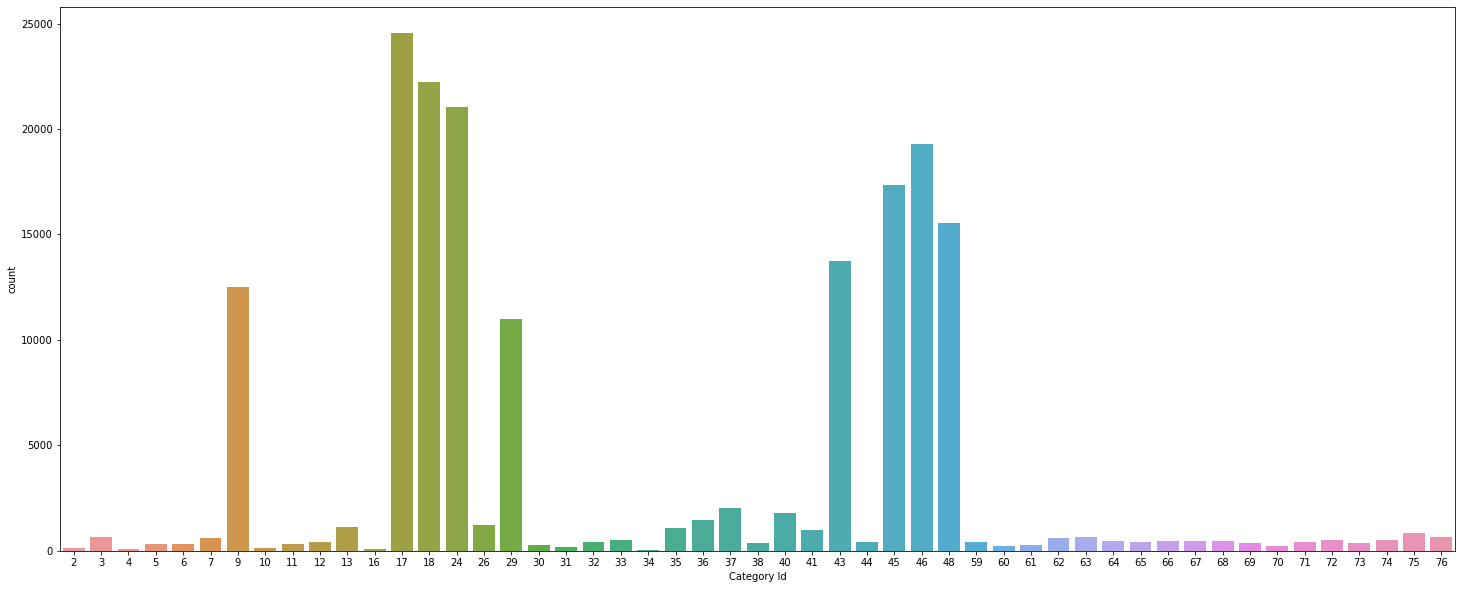

In [91]:
plt.figure(figsize=[25,10])
sns.countplot(data['Category Id'])

In [92]:
data['Category Id'].dtypes

dtype('int64')

# Bi-Varient Analysis

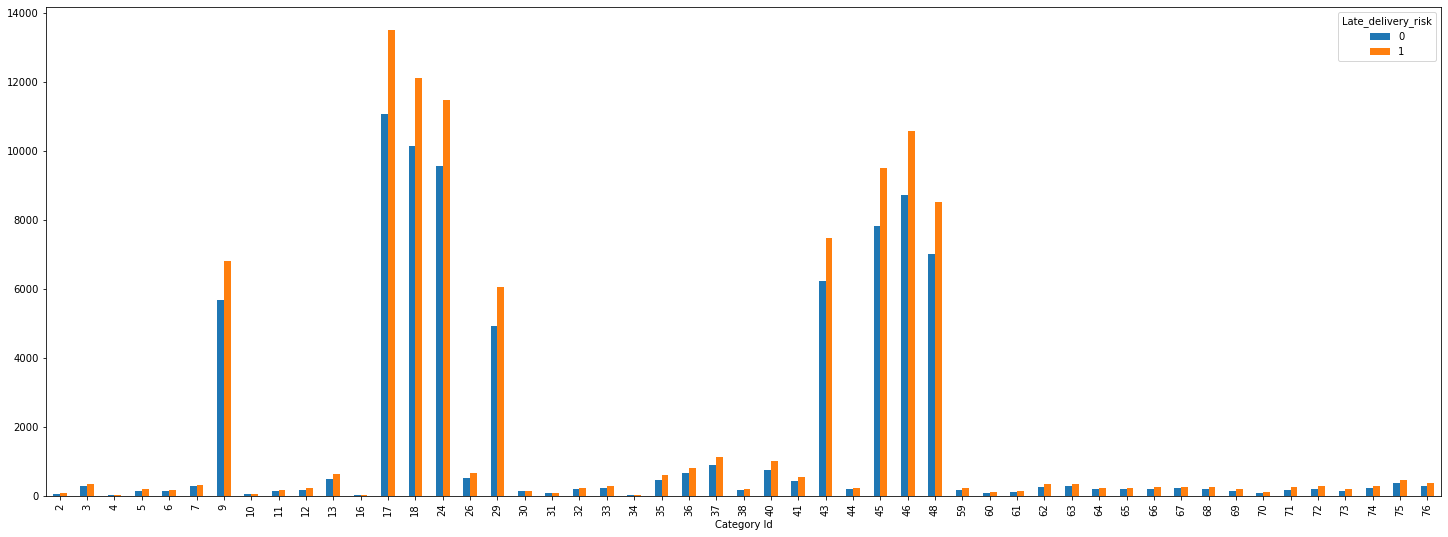

In [93]:
table=pd.crosstab(data['Category Id'],target)
bar=table.plot(kind='bar')
plt.show()

In [94]:
table

Late_delivery_risk      0      1
Category Id                     
2                      63     75
3                     283    349
4                      30     37
5                     137    206
6                     145    183
7                     285    329
9                    5682   6805
10                     47     64
11                    133    176
12                    185    238
13                    500    627
16                     29     39
17                  11055  13496
18                  10125  12121
24                   9559  11476
26                    537    664
29                   4926   6058
30                    148    135
31                     84     97
32                    212    229
33                    233    291
34                     19     42
35                    468    602
36                    670    805
37                    886   1143
38                    179    205
40                    766   1014
41                    432    542
43                   6242   7487
44                    193    247
45                   7809   9516
46                   8733  10565
48                   7023   8517
59                    176    229
60                     98    109
61                    130    141
62                    248    344
63                    304    348
64                    218    224
65                    193    238
66                    213    271
67                    224    259
68                    214    270
69                    160    202
70                     95    113
71                    186    248
72                    202    290
73                    159    198
74                    238    291
75                    383    455
76                    283    367

* statical test to check signficance

In [95]:
c, p, dof, expected = chi2_contingency(table)
p

0.7468284823123976

* here p value is high i.e 74 percent showing that we accept Ho taht is two feature are independent

In [96]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Customer Id','Product category code','it displays uniform distribution','unrelevant according to chi2','no relevance ']

In [97]:
un_significant_feature

feature name                description  \
0   Benefit per order  Earnings per order placed   
1  Sales per customer  Total sales per customer    
2         Customer Id      Product category code   

                      bivarient observation                     statical test  \
0  it displays positive and negative values  unrelevant according to anova_lm   
1          it displays uniform distribution  unrelevant according to anova_lm   
2          it displays uniform distribution      unrelevant according to chi2   

      business relevence  
0  no relevance on delay  
1  no relevance on delay  
2          no relevance

# Feature 8::Category Name

In [98]:
data_dictionary.iloc[8,:]

FIELDS                                  Category Name
DESCRIPTION    :  Description of the product category
Name: 8, dtype: object

* this feature contain description of all product categories

In [99]:
data['Category Name'].unique()

array(['Sporting Goods', 'Cleats', 'Shop By Sport', "Women's Apparel",
       'Electronics', 'Boxing & MMA', 'Cardio Equipment', 'Trade-In',
       "Kids' Golf Clubs", 'Hunting & Shooting', 'Baseball & Softball',
       "Men's Footwear", 'Camping & Hiking', 'Consumer Electronics',
       'Cameras ', 'Computers', 'Basketball', 'Soccer', "Girls' Apparel",
       'Accessories', "Women's Clothing", 'Crafts', "Men's Clothing",
       'Tennis & Racquet', 'Fitness Accessories', 'As Seen on  TV!',
       'Golf Balls', 'Strength Training', "Children's Clothing",
       'Lacrosse', 'Baby ', 'Fishing', 'Books ', 'DVDs', 'CDs ', 'Garden',
       'Hockey', 'Pet Supplies', 'Health and Beauty', 'Music',
       'Video Games', 'Golf Gloves', 'Golf Bags & Carts', 'Golf Shoes',
       'Golf Apparel', "Women's Golf Clubs", "Men's Golf Clubs", 'Toys',
       'Water Sports', 'Indoor/Outdoor Games'], dtype=object)

In [100]:
len(data['Category Name'].unique())

50

* almost equal number of observation as compare to the customer id

In [101]:
data['Category Name'].value_counts().sort_values(ascending=False)

Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Crafts                    484
Garden                    484
DVDs                      483
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Electronics      431
Boxing & MMA              423
Books     

In [102]:
data['Category Name'].value_counts([0]).sort_values(ascending=False)

Cleats                  0.136002
Men's Footwear          0.123234
Women's Apparel         0.116525
Indoor/Outdoor Games    0.106903
Fishing                 0.095973
Water Sports            0.086085
Camping & Hiking        0.076053
Cardio Equipment        0.069173
Shop By Sport           0.060847
Electronics             0.017483
Accessories             0.009860
Golf Balls              0.008171
Girls' Apparel          0.006653
Golf Gloves             0.005927
Trade-In                0.005396
Video Games             0.004642
Children's Clothing     0.003612
Women's Clothing        0.003601
Baseball & Softball     0.003501
Hockey                  0.003401
Cameras                 0.003279
Toys                    0.002930
Golf Shoes              0.002903
Pet Supplies            0.002725
Crafts                  0.002681
Garden                  0.002681
DVDs                    0.002676
Computers               0.002448
Golf Apparel            0.002443
Hunting & Shooting      0.002437
Music     

* contain exactly same info as category id

# Bi-Varient Analysis

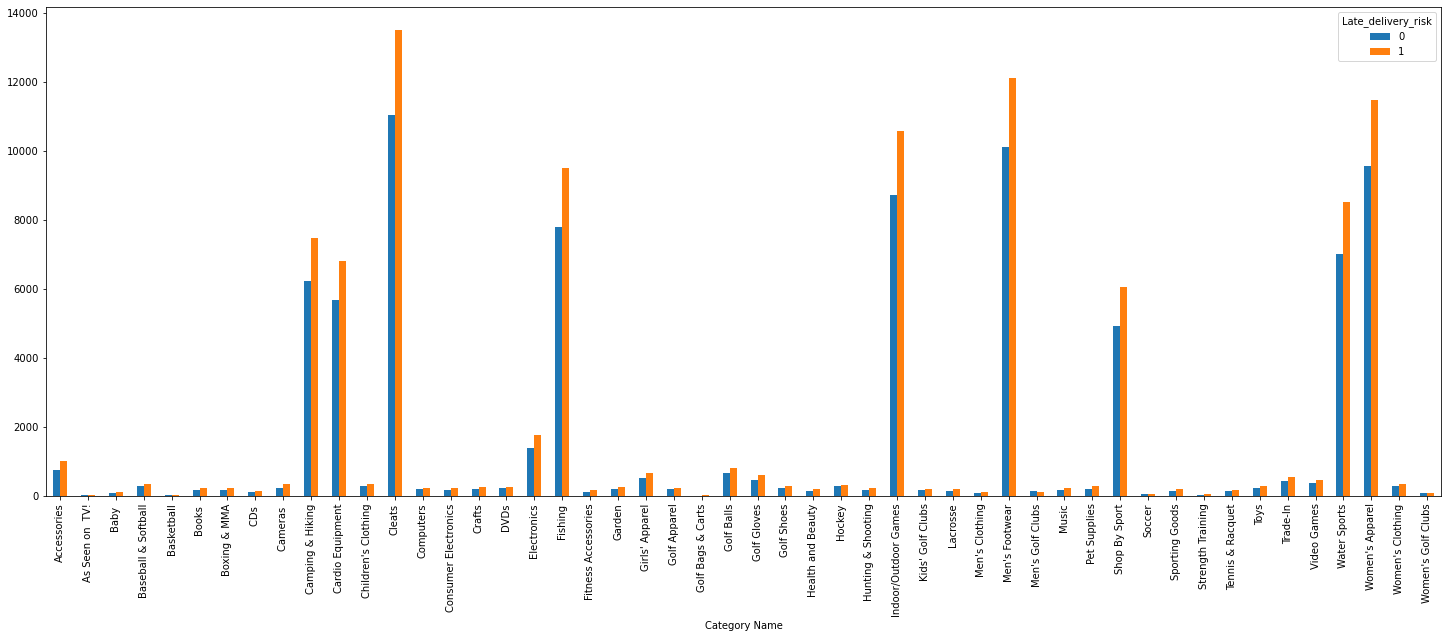

In [103]:
table=pd.crosstab(data['Category Name'],target)
bar=table.plot(kind='bar')
plt.show()

* statical test to check signficance

In [104]:
c, p, dof, expected = chi2_contingency(table)
p

0.7179808169070767

* here p value is high i.e 71 percent showing that we accept Ho taht is two feature are independent

In [105]:
data.drop(['Category Name'],axis=1,inplace=True)

In [106]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Category Name','Description of the product category','it displays uniform distribution','unrelevant according to chi2','no relevance ']

In [107]:
un_significant_feature

feature name                          description  \
0   Benefit per order            Earnings per order placed   
1  Sales per customer            Total sales per customer    
2         Customer Id                Product category code   
3       Category Name  Description of the product category   

                      bivarient observation                     statical test  \
0  it displays positive and negative values  unrelevant according to anova_lm   
1          it displays uniform distribution  unrelevant according to anova_lm   
2          it displays uniform distribution      unrelevant according to chi2   
3          it displays uniform distribution      unrelevant according to chi2   

      business relevence  
0  no relevance on delay  
1  no relevance on delay  
2          no relevance   
3          no relevance

# Feature ::9 Customer City

In [108]:
data_dictionary.iloc[9,:]

FIELDS                                        Customer City
DESCRIPTION    :  City where the customer made the purchase
Name: 9, dtype: object

* this feature contain info of city where customer made purchase

In [109]:
data['Customer City'].unique()

array(['Caguas', 'San Jose', 'Los Angeles', 'Tonawanda', 'Miami',
       'San Ramon', 'Freeport', 'Salinas', 'Peabody', 'Canovanas',
       'Paramount', 'Mount Prospect', 'Long Beach', 'Rancho Cordova',
       'Billings', 'Wilkes Barre', 'Roseville', 'Bellflower', 'Wheaton',
       'Detroit', 'Dallas', 'Carlisle', 'Newark', 'Panorama City',
       'Atlanta', 'Fremont', 'Rochester', 'Bayamon', 'Guayama',
       'Juana Diaz', 'Fort Washington', 'Bakersfield', 'Corona',
       'Cincinnati', 'Germantown', 'Carrollton', 'Houston', 'Ewa Beach',
       'Lakewood', 'Rome', 'Vista', 'Fort Worth', 'Fond Du Lac',
       'Philadelphia', 'Ontario', 'Oviedo', 'Buffalo', 'Honolulu',
       'Oceanside', 'North Tonawanda', 'Clovis', 'Jamaica',
       'Granite City', 'Medford', 'Pomona', 'Tempe', 'Santa Ana', 'York',
       'Aurora', 'Simi Valley', 'Silver Spring', 'Saint Paul',
       'San Antonio', 'Bronx', 'Greenville', 'Morristown', 'San Diego',
       'Oxnard', 'Albuquerque', 'Amarillo', 'Lutz', 'B

In [110]:
len(data['Customer City'].unique())

563

* 563 differnt cities where customer placed the order

In [111]:
data['Customer City'].value_counts().sort_values(ascending=False)

Caguas                  66770
Chicago                  3885
Los Angeles              3417
Brooklyn                 3412
New York                 1816
Philadelphia             1577
Bronx                    1500
San Diego                1437
Miami                    1314
Houston                  1297
Las Vegas                1164
Dallas                   1029
Aurora                   1015
Detroit                   958
Phoenix                   945
San Jose                  943
Cleveland                 784
Lancaster                 762
San Antonio               730
Memphis                   707
Virginia Beach            691
El Paso                   649
Fort Lauderdale           646
Columbus                  642
Washington                627
Honolulu                  609
Tucson                    582
Bakersfield               581
Baltimore                 565
Albuquerque               552
Long Beach                546
Newark                    544
Saint Paul                541
Pompano Be

In [112]:
data['Customer City'].value_counts([0]).sort_values(ascending=False)

Caguas                  0.369878
Chicago                 0.021521
Los Angeles             0.018929
Brooklyn                0.018901
New York                0.010060
Philadelphia            0.008736
Bronx                   0.008309
San Diego               0.007960
Miami                   0.007279
Houston                 0.007185
Las Vegas               0.006448
Dallas                  0.005700
Aurora                  0.005623
Detroit                 0.005307
Phoenix                 0.005235
San Jose                0.005224
Cleveland               0.004343
Lancaster               0.004221
San Antonio             0.004044
Memphis                 0.003916
Virginia Beach          0.003828
El Paso                 0.003595
Fort Lauderdale         0.003579
Columbus                0.003556
Washington              0.003473
Honolulu                0.003374
Tucson                  0.003224
Bakersfield             0.003218
Baltimore               0.003130
Albuquerque             0.003058
Long Beach

* some cities have good amount of orders where as some have neglegible amount of orders

# Bi-Varient Analysis

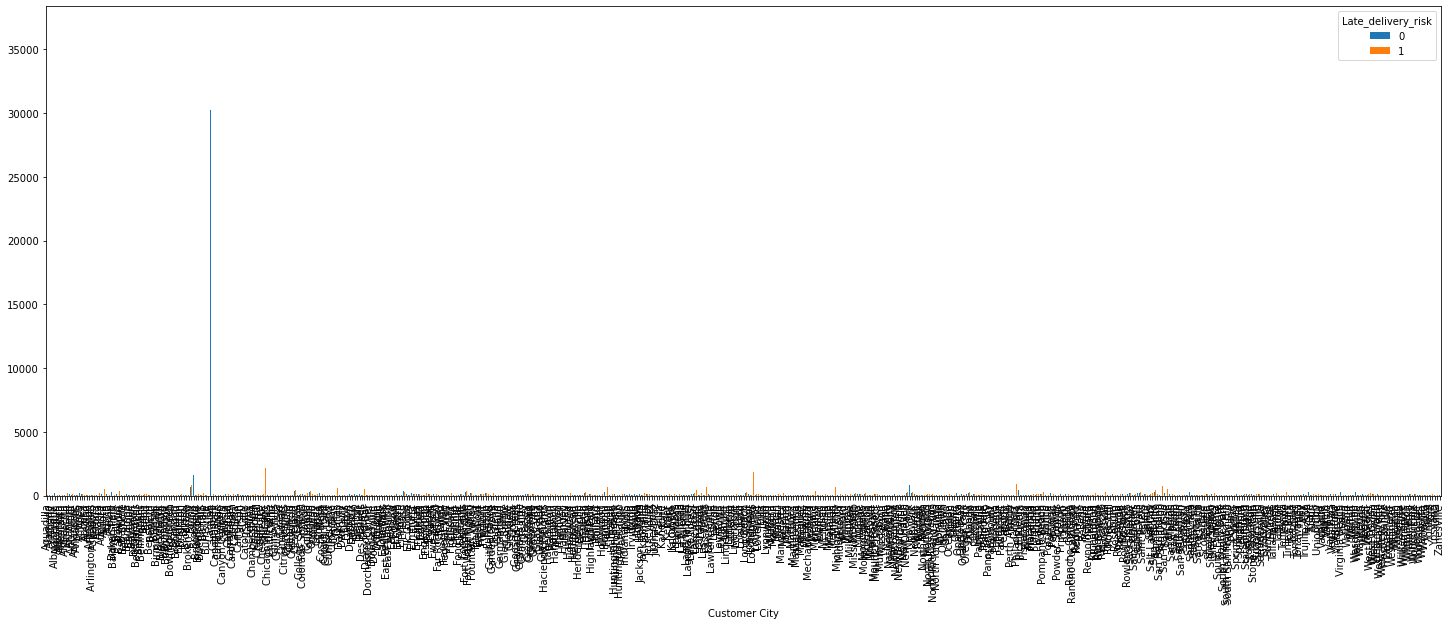

In [113]:
table=pd.crosstab(data['Customer City'],target)
bar=table.plot(kind='bar')
plt.show()

* due to 563 diffrent  cities we can not able to  visualise 

* statitical test of independency

In [114]:
c, p, dof, expected = chi2_contingency(table)
p

1.727279395129362e-141

* here p value is less  then 5 percent i.e almost 0 percent showing that we reject Ho that is two feature are independent

In [115]:
# step just for practice
mapp=data['Customer City'].value_counts()
data['Customer City']=data['Customer City'].apply(lambda x : mapp[x])

In [116]:
significant_feature.loc[len(significant_feature.index)]=['Customer City','City where the customer made the purchase','cannot  conclude from visuals','relevent according to chi2','Customer City impact on business']

In [117]:
significant_feature

feature name                                  description  \
0                           Type                     Type of transaction made   
1       Days for shipping (real)     Days of actual shipping of the purchased   
2  Days for shipment (scheduled)  Days of scheduled shipping of the purchased   
3                Delivery Status                    Delivery status of orders   
4                  Customer City    City where the customer made the purchase   

                               bivarient observation  \
0  diffrent type of transaction have diffrent del...   
1  orders having more shipping day are mostly del...   
2    sheduled shipping day 1 or 2 are prone to delay   
3  late delivery in Delivery Status have more lat...   
4                      cannot  conclude from visuals   

                      statical test                       business relevence  
0  relevent according to chi_square                         can not conclude  
1       relevent according to chi2            more shipping day effect delay  
2        relevent according to chi2   shipping day sheduled  impact business  
3        relevent according to chi2  Delivery Status have impact on business  
4        relevent according to chi2         Customer City impact on business

# Feature 10 :: Customer Country

In [118]:
data_dictionary.iloc[10,:]

FIELDS                                        Customer Country
DESCRIPTION    :  Country where the customer made the purchase
Name: 10, dtype: object

* this feature contain information of the Country where the customer made the purchase

In [119]:
data['Customer Country'].unique()

array(['Puerto Rico', 'EE. UU.'], dtype=object)

In [120]:
len(data['Customer Country'].unique())

2

In [121]:
data['Customer Country'].value_counts()

EE. UU.        111146
Puerto Rico     69373
Name: Customer Country, dtype: int64

In [122]:
data['Customer Country'].value_counts([0])

EE. UU.        0.615703
Puerto Rico    0.384297
Name: Customer Country, dtype: float64

 * contain only two categories showing that the target customer for our company belong to only two countries

* country eeuu have 61 percent of total orders where as second country have remaining orders

# Bi-Varient Analysis

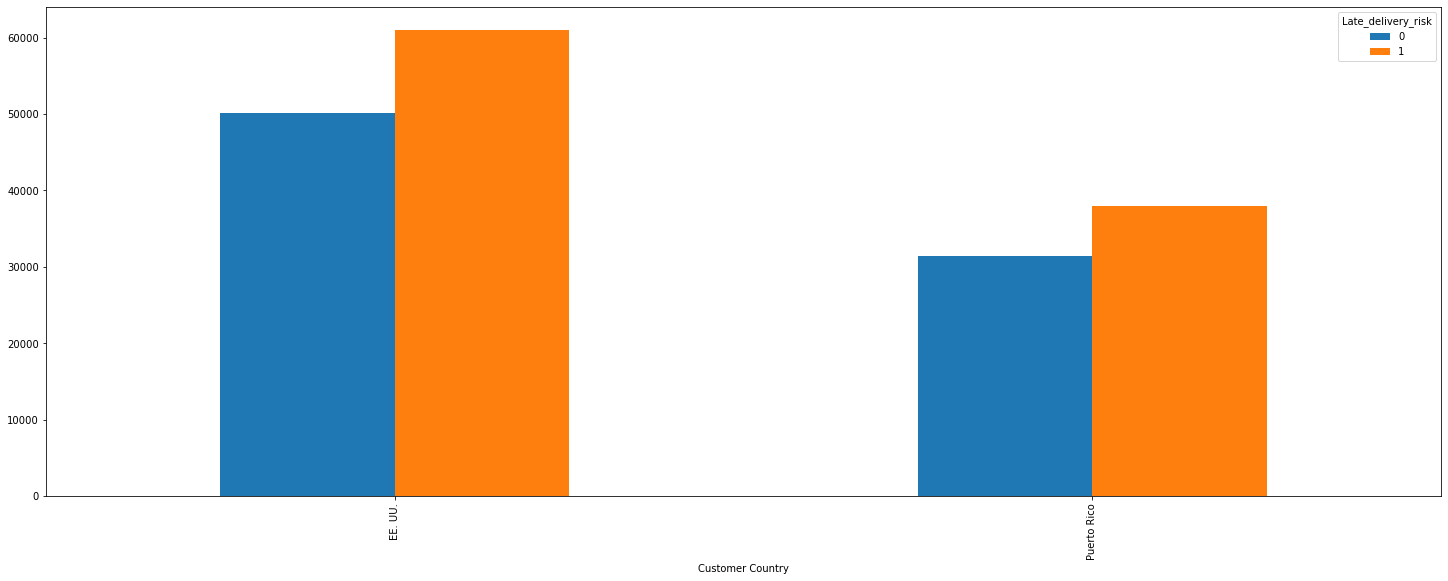

In [123]:
table=pd.crosstab(data['Customer Country'],target)
bar=table.plot(kind='bar')
plt.show()

* statitical test of independency

In [124]:
c, p, dof, expected = chi2_contingency(table)
p

0.660935525163501

* here p value is high i.e 64 percent showing that we accept Ho that is two feature are independent

In [125]:
# just for practice
data.drop(['Customer Country'],axis=1,inplace=True)

In [126]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Customer Country','Country where the customer made the purchase','it displays uniform distribution','unrelevant according to chi2','may impact delay']

In [127]:
un_significant_feature

feature name                                   description  \
0   Benefit per order                     Earnings per order placed   
1  Sales per customer                     Total sales per customer    
2         Customer Id                         Product category code   
3       Category Name           Description of the product category   
4    Customer Country  Country where the customer made the purchase   

                      bivarient observation                     statical test  \
0  it displays positive and negative values  unrelevant according to anova_lm   
1          it displays uniform distribution  unrelevant according to anova_lm   
2          it displays uniform distribution      unrelevant according to chi2   
3          it displays uniform distribution      unrelevant according to chi2   
4          it displays uniform distribution      unrelevant according to chi2   

      business relevence  
0  no relevance on delay  
1  no relevance on delay  
2          no relevance   
3          no relevance   
4       may impact delay

# Feature 11:: customer email

In [128]:
data_dictionary.iloc[11,:]

FIELDS              Customer Email
DESCRIPTION    :  Customer's email
Name: 11, dtype: object

* this feature contain email adresss of all the customers who placed the order

In [129]:
data['Customer Email'].unique()

array(['XXXXXXXXX'], dtype=object)

* contain onlyy XXXX for each observation so we cannot find any interference from it so we have to dro it

In [130]:
data.drop('Customer Email',axis=1,inplace=True)

In [131]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Customer Email','Email of customers','contain only  XXXX for each observation','not applicable','not applicable']

In [132]:
un_significant_feature

feature name                                   description  \
0   Benefit per order                     Earnings per order placed   
1  Sales per customer                     Total sales per customer    
2         Customer Id                         Product category code   
3       Category Name           Description of the product category   
4    Customer Country  Country where the customer made the purchase   
5      Customer Email                            Email of customers   

                      bivarient observation                     statical test  \
0  it displays positive and negative values  unrelevant according to anova_lm   
1          it displays uniform distribution  unrelevant according to anova_lm   
2          it displays uniform distribution      unrelevant according to chi2   
3          it displays uniform distribution      unrelevant according to chi2   
4          it displays uniform distribution      unrelevant according to chi2   
5   contain only  XXXX for each observation                    not applicable   

      business relevence  
0  no relevance on delay  
1  no relevance on delay  
2          no relevance   
3          no relevance   
4       may impact delay  
5         not applicable

# Feature 12::Customer F name

In [133]:
data_dictionary.iloc[12,:]

FIELDS           Customer Fname
DESCRIPTION    :  Customer name
Name: 12, dtype: object

* this feature contain info about the first name of all the customers

In [134]:
len(data['Customer Fname'].unique()) # contain only 782 unique values we will see what can we do from it

782

# Bi_varient Analysis

* as this feature has  782 unique values it it not possible to plot

In [135]:
mapp=data['Customer Fname'].value_counts()
data['Customer Fname']=data['Customer Fname'].apply(lambda x : mapp[x])

In [136]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Customer Fname','First name of customers','contain unique first name','not applicable','not applicable']

In [137]:
un_significant_feature

feature name                                   description  \
0   Benefit per order                     Earnings per order placed   
1  Sales per customer                     Total sales per customer    
2         Customer Id                         Product category code   
3       Category Name           Description of the product category   
4    Customer Country  Country where the customer made the purchase   
5      Customer Email                            Email of customers   
6      Customer Fname                       First name of customers   

                      bivarient observation                     statical test  \
0  it displays positive and negative values  unrelevant according to anova_lm   
1          it displays uniform distribution  unrelevant according to anova_lm   
2          it displays uniform distribution      unrelevant according to chi2   
3          it displays uniform distribution      unrelevant according to chi2   
4          it displays uniform distribution      unrelevant according to chi2   
5   contain only  XXXX for each observation                    not applicable   
6                 contain unique first name                    not applicable   

      business relevence  
0  no relevance on delay  
1  no relevance on delay  
2          no relevance   
3          no relevance   
4       may impact delay  
5         not applicable  
6         not applicable

# feature ::13 Customer Id

In [138]:
data_dictionary.iloc[13,:]

FIELDS            Customer Id
DESCRIPTION    :  Customer ID
Name: 13, dtype: object

* this feature contain customer id for each customer visit to this company for oreder

In [139]:
len(data['Customer Id'].unique())#contain 20000 unique values we have to drop it as we cannot takeany inference from it

20652

* we will extract the usefull info from this info and later on we will drop it

In [140]:
data['Customer Id'].describe()

count    180519.000000
mean       6691.379495
std        4162.918106
min           1.000000
25%        3258.500000
50%        6457.000000
75%        9779.000000
max       20757.000000
Name: Customer Id, dtype: float64

# Bi-Varient

* lets treat it as nuerical column and see significance on target

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Customer Id'>

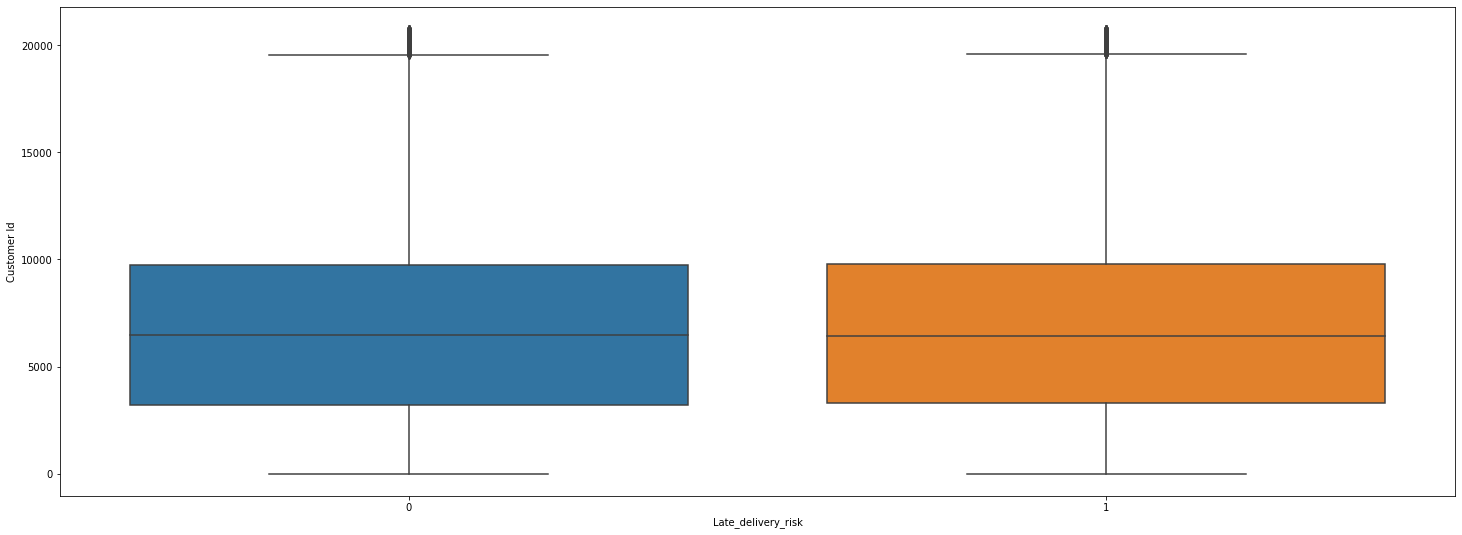

In [141]:
sns.boxplot(x=target,y =data['Customer Id'] )

* statical test to see significance

In [142]:
model = sfa.ols("data['Customer Id']~target",data=data).fit()
#annova table
print(anova_lm(model))

                df        sum_sq       mean_sq         F    PR(>F)
target         1.0  6.893530e+06  6.893530e+06  0.397781  0.528238
Residual  180517.0  3.128350e+12  1.732994e+07       NaN       NaN


* here p value is high i.e 52 percent showing that we accept Ho that is two feature are independent

In [143]:
data.drop(['Customer Id'],axis=1,inplace=True)

In [144]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Customer Id','Id of customers','contain unique customer id','no relevance according to anova_lm','no relevance']

In [145]:
un_significant_feature


feature name                                   description  \
0   Benefit per order                     Earnings per order placed   
1  Sales per customer                     Total sales per customer    
2         Customer Id                         Product category code   
3       Category Name           Description of the product category   
4    Customer Country  Country where the customer made the purchase   
5      Customer Email                            Email of customers   
6      Customer Fname                       First name of customers   
7         Customer Id                               Id of customers   

                      bivarient observation  \
0  it displays positive and negative values   
1          it displays uniform distribution   
2          it displays uniform distribution   
3          it displays uniform distribution   
4          it displays uniform distribution   
5   contain only  XXXX for each observation   
6                 contain unique first name   
7                contain unique customer id   

                        statical test     business relevence  
0    unrelevant according to anova_lm  no relevance on delay  
1    unrelevant according to anova_lm  no relevance on delay  
2        unrelevant according to chi2          no relevance   
3        unrelevant according to chi2          no relevance   
4        unrelevant according to chi2       may impact delay  
5                      not applicable         not applicable  
6                      not applicable         not applicable  
7  no relevance according to anova_lm           no relevance

In [146]:
significant_feature

feature name                                  description  \
0                           Type                     Type of transaction made   
1       Days for shipping (real)     Days of actual shipping of the purchased   
2  Days for shipment (scheduled)  Days of scheduled shipping of the purchased   
3                Delivery Status                    Delivery status of orders   
4                  Customer City    City where the customer made the purchase   

                               bivarient observation  \
0  diffrent type of transaction have diffrent del...   
1  orders having more shipping day are mostly del...   
2    sheduled shipping day 1 or 2 are prone to delay   
3  late delivery in Delivery Status have more lat...   
4                      cannot  conclude from visuals   

                      statical test                       business relevence  
0  relevent according to chi_square                         can not conclude  
1       relevent according to chi2            more shipping day effect delay  
2        relevent according to chi2   shipping day sheduled  impact business  
3        relevent according to chi2  Delivery Status have impact on business  
4        relevent according to chi2         Customer City impact on business

# Feature 14::Customer L name

In [147]:
data_dictionary.iloc[14,:]

FIELDS               Customer Lname
DESCRIPTION    :  Customer lastname
Name: 14, dtype: object

* this feature contain info about the last name of all the customers

In [148]:
len(data['Customer Lname'].unique()) # contain only 1110 unique values we will see what can we do from it

1110

* we will try to extract the info which we can in future from this feature

# Bi-Varient Analysis

* as this feature has 1110 unique values it it not possible to plot


* statatical test of independecy

In [149]:
table=pd.crosstab(data['Customer Lname'],target)

In [150]:
c, p, dof, expected = chi2_contingency(table)
p

3.5289542430375076e-256

* it looks like significant according to statical test we will see how to use it

In [151]:
significant_feature.loc[len(significant_feature.index)]=['Customer Lname','Customer lastname','Cannot be able to visualize due to many unique values','relevent according to chi_square','we will try to extract some information']

In [152]:
significant_feature

feature name                                  description  \
0                           Type                     Type of transaction made   
1       Days for shipping (real)     Days of actual shipping of the purchased   
2  Days for shipment (scheduled)  Days of scheduled shipping of the purchased   
3                Delivery Status                    Delivery status of orders   
4                  Customer City    City where the customer made the purchase   
5                 Customer Lname                            Customer lastname   

                               bivarient observation  \
0  diffrent type of transaction have diffrent del...   
1  orders having more shipping day are mostly del...   
2    sheduled shipping day 1 or 2 are prone to delay   
3  late delivery in Delivery Status have more lat...   
4                      cannot  conclude from visuals   
5  Cannot be able to visualize due to many unique...   

                      statical test                       business relevence  
0  relevent according to chi_square                         can not conclude  
1       relevent according to chi2            more shipping day effect delay  
2        relevent according to chi2   shipping day sheduled  impact business  
3        relevent according to chi2  Delivery Status have impact on business  
4        relevent according to chi2         Customer City impact on business  
5  relevent according to chi_square  we will try to extract some information

In [153]:
un_significant_feature

feature name                                   description  \
0   Benefit per order                     Earnings per order placed   
1  Sales per customer                     Total sales per customer    
2         Customer Id                         Product category code   
3       Category Name           Description of the product category   
4    Customer Country  Country where the customer made the purchase   
5      Customer Email                            Email of customers   
6      Customer Fname                       First name of customers   
7         Customer Id                               Id of customers   

                      bivarient observation  \
0  it displays positive and negative values   
1          it displays uniform distribution   
2          it displays uniform distribution   
3          it displays uniform distribution   
4          it displays uniform distribution   
5   contain only  XXXX for each observation   
6                 contain unique first name   
7                contain unique customer id   

                        statical test     business relevence  
0    unrelevant according to anova_lm  no relevance on delay  
1    unrelevant according to anova_lm  no relevance on delay  
2        unrelevant according to chi2          no relevance   
3        unrelevant according to chi2          no relevance   
4        unrelevant according to chi2       may impact delay  
5                      not applicable         not applicable  
6                      not applicable         not applicable  
7  no relevance according to anova_lm           no relevance

# feature 15:: customer password

In [154]:
data_dictionary.iloc[15,:]

FIELDS              Customer Password
DESCRIPTION    :  Masked customer key
Name: 15, dtype: object

* this feature contain masked customer key

In [155]:
data['Customer Password'].unique()

array(['XXXXXXXXX'], dtype=object)

* contain only XXX so we will drop it and move on to the next feature 

In [156]:
data.drop('Customer Password',axis=1,inplace=True)

In [157]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Customer Password','Masked customer key','contain only  XXXX for each observation','not applicable','not applicable']

# Feature 16::: Customer Segment

In [158]:
data_dictionary.iloc[16,:]

FIELDS                                          Customer Segment
DESCRIPTION    :  Types of Customers: Consumer , Corporate , ...
Name: 16, dtype: object

* this feature contain information of diffrent segment of the customers

In [159]:
data['Customer Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [160]:
data['Customer Segment'].value_counts()

Consumer       93504
Corporate      54789
Home Office    32226
Name: Customer Segment, dtype: int64

In [161]:
data['Customer Segment'].value_counts([0])

Consumer       0.517973
Corporate      0.303508
Home Office    0.178519
Name: Customer Segment, dtype: float64

* there are 3 segment of customers out of which 51 percent of orders are placed by consumer segment

<AxesSubplot:xlabel='Customer Segment', ylabel='count'>

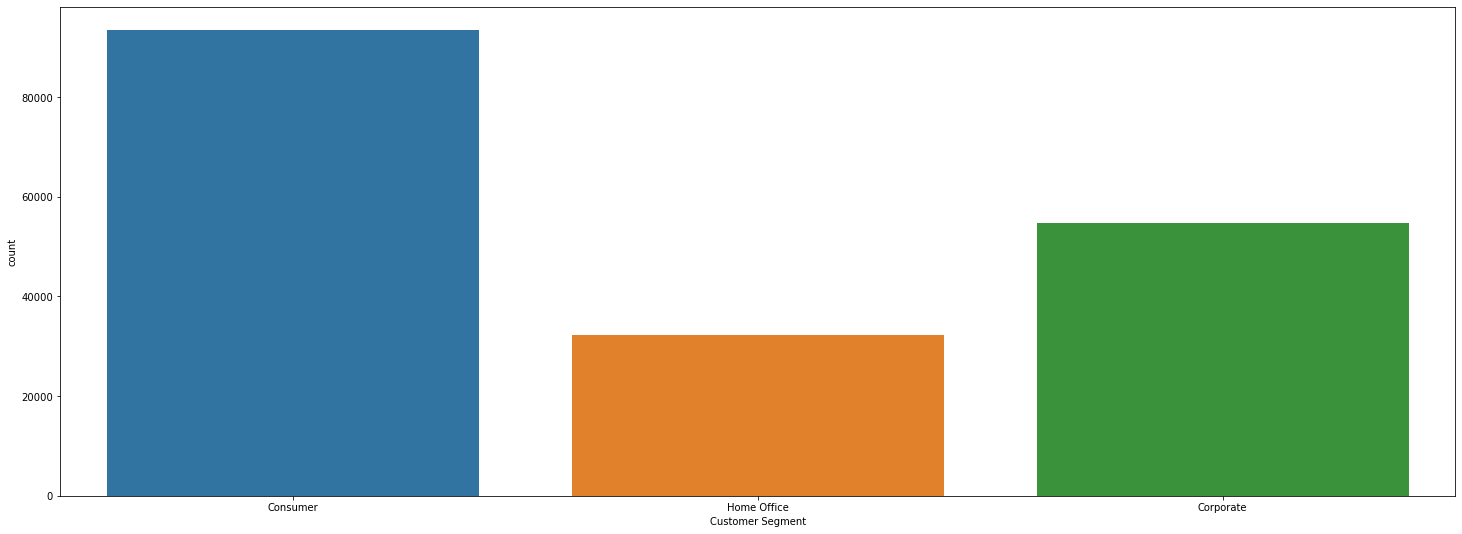

In [162]:
sns.countplot(data['Customer Segment'])

# Bi-Varient Analysis

<AxesSubplot:xlabel='Customer Segment'>

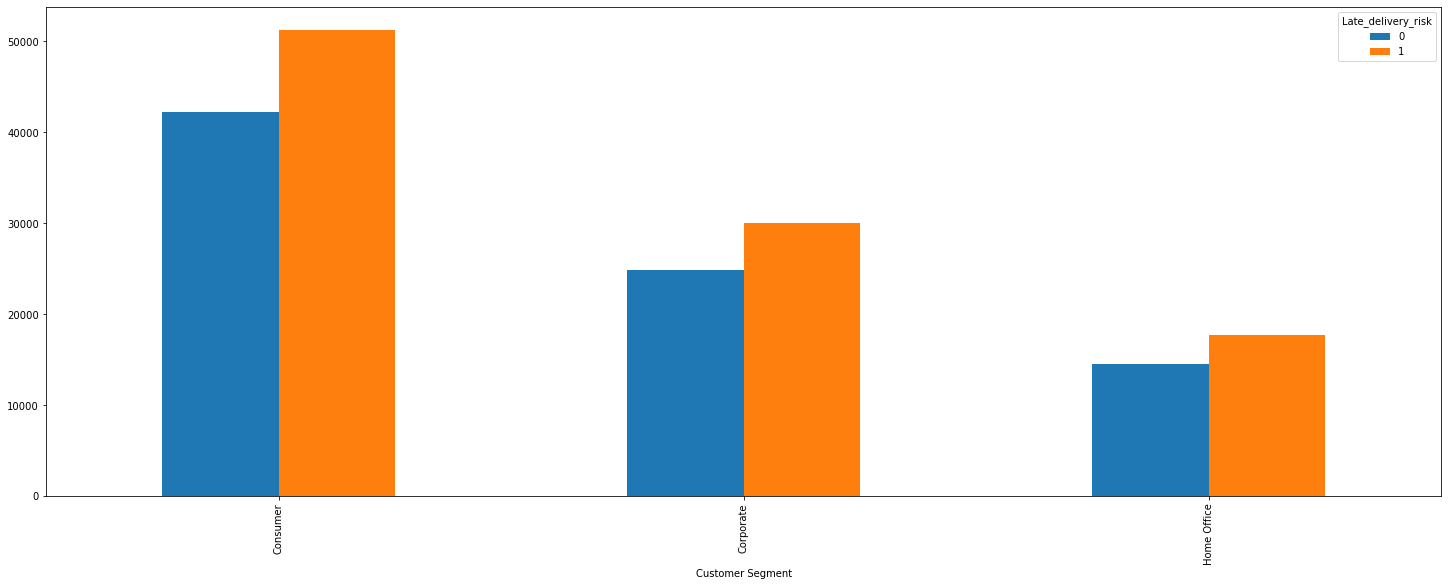

In [163]:
table=pd.crosstab(data['Customer Segment'],target)
table.plot(kind='bar')

* statatical test of independecy

In [164]:
c, p, dof, expected = chi2_contingency(table)
p

0.5990740516327164

* here p value is high i.e 59 percent showing that we accept Ho that is two feature are independent

In [165]:
data.drop(['Customer Segment'],axis=1,inplace=True)

In [166]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Customer Segment','Types of Customers','Uniform distribution among all segments','Unsignificant according to chi-square','Customer segment not impact delay']

# feature 17:: Customer State

In [167]:
data_dictionary.iloc[17,:]

FIELDS                                            Customer State
DESCRIPTION    :  State to which the store where the purchase...
Name: 17, dtype: object

* this feature contain info of the  State to which the store belong where the order is placed


In [168]:
len(data['Customer State'].unique())

46

In [169]:
data['Customer State'].value_counts()

PR       69373
CA       29223
NY       11327
TX        9103
IL        7631
FL        5456
OH        4095
PA        3824
MI        3804
NJ        3191
AZ        3026
GA        2503
MD        2415
NC        1992
CO        1914
VA        1849
OR        1668
MA        1607
TN        1582
NV        1440
MO        1354
HI        1248
CT        1094
UT         968
NM         949
LA         948
WA         920
WI         850
MN         672
SC         665
IN         581
DC         579
KY         487
KS         458
DE         269
RI         243
WV         241
OK         232
ND         215
ID         167
AR         164
MT          87
IA          67
AL          35
95758        2
91732        1
Name: Customer State, dtype: int64

In [170]:
data['Customer State'].value_counts([0])

PR       0.384297
CA       0.161883
NY       0.062747
TX       0.050427
IL       0.042273
FL       0.030224
OH       0.022685
PA       0.021183
MI       0.021073
NJ       0.017677
AZ       0.016763
GA       0.013866
MD       0.013378
NC       0.011035
CO       0.010603
VA       0.010243
OR       0.009240
MA       0.008902
TN       0.008764
NV       0.007977
MO       0.007501
HI       0.006913
CT       0.006060
UT       0.005362
NM       0.005257
LA       0.005252
WA       0.005096
WI       0.004709
MN       0.003723
SC       0.003684
IN       0.003218
DC       0.003207
KY       0.002698
KS       0.002537
DE       0.001490
RI       0.001346
WV       0.001335
OK       0.001285
ND       0.001191
ID       0.000925
AR       0.000908
MT       0.000482
IA       0.000371
AL       0.000194
95758    0.000011
91732    0.000006
Name: Customer State, dtype: float64

* there are 46 diffrent state from where purchase happen out 
of which only one state is major performer whereas some has very few num of orders

<AxesSubplot:xlabel='Customer State', ylabel='count'>

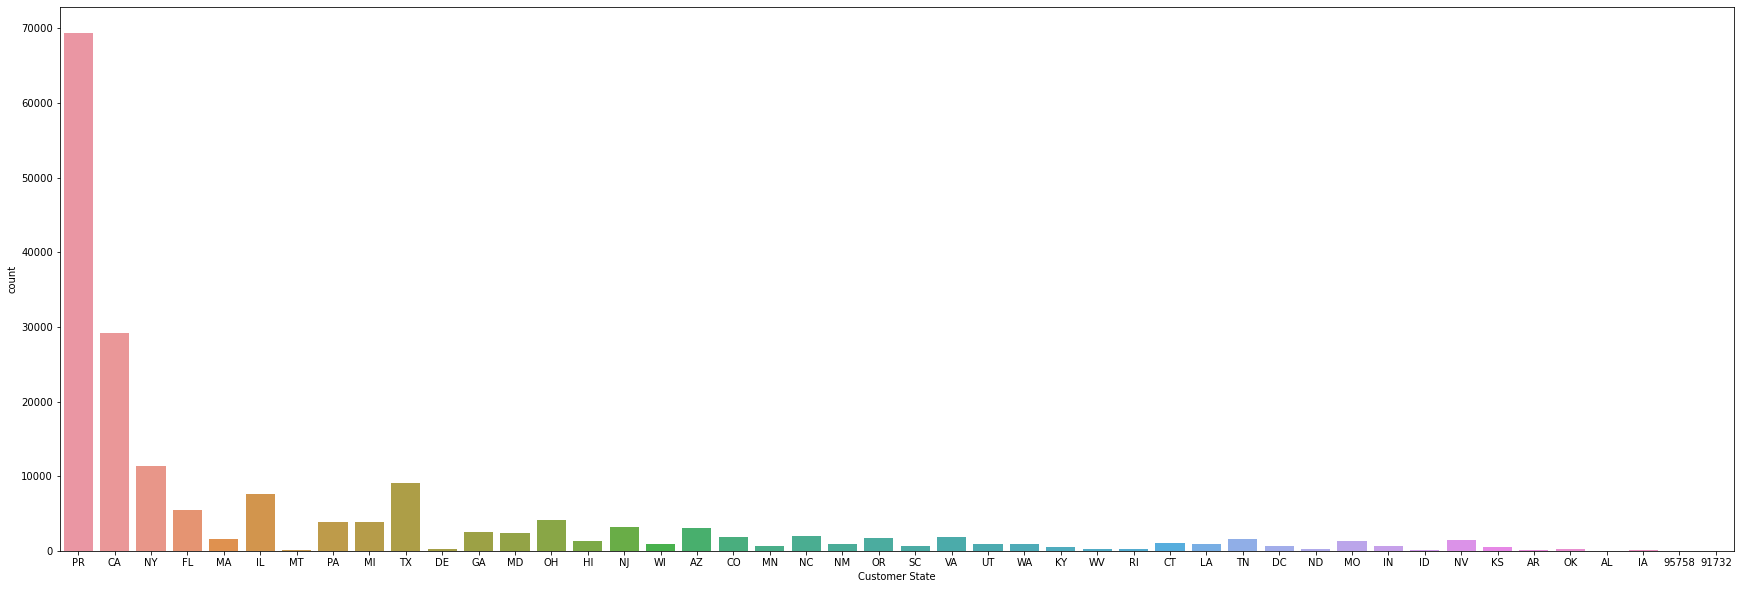

In [171]:
plt.figure(figsize=[30,10])
sns.countplot(data['Customer State'])

# Bi-Varient Analysis

<AxesSubplot:xlabel='Customer State'>

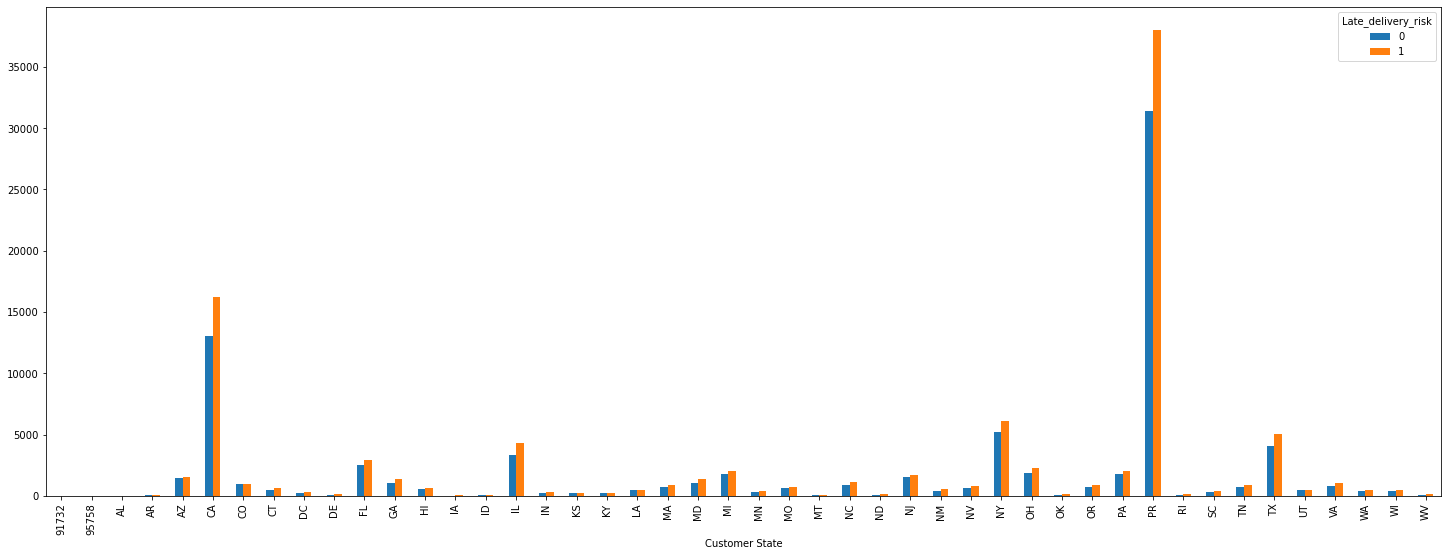

In [172]:
table=table=pd.crosstab(data['Customer State'],target)
table.plot(kind='bar')

* statatical test of independecy

In [173]:
c, p, dof, expected = chi2_contingency(table)
p

3.4110017608181488e-06

* p value is less then 5 percent showing we will reject the null hypothesis implies that two feature are independent

In [174]:
significant_feature.loc[len(significant_feature.index)]=['Customer State','State to which the store where the purchase','no uniform distribution','relevent according to chi_square','Customer State has  an impact on business']

# Feature 18:: Customer Street

In [175]:
data_dictionary.iloc[18,:]

FIELDS                                           Customer Street
DESCRIPTION    :  Street to which the store where the purchas...
Name: 18, dtype: object

* this feature contain information of Street to which the store where the purchase/order placed

In [176]:
len(data['Customer Street'].unique())

7458

In [177]:
data['Customer Street'].head()

0    5365 Noble Nectar Island
1            2679 Rustic Loop
2        8510 Round Bear Gate
3             3200 Amber Bend
4    8671 Iron Anchor Corners
Name: Customer Street, dtype: object

* contain large amount of categories we will colect the usefull info and after that will drop it

# Bi-Varient Analysis 

In [178]:
table=pd.crosstab(data['Customer Street'],target)


* since 7400 categories not possible to visiualise so lets check statically its significance

In [179]:
c, p, dof, expected = chi2_contingency(table)
p

0.0

* p value is less then 5 percent showing we will reject the null hypothesis implies that two feature are independent

In [180]:
mapp=data['Customer Street'].value_counts()
data['Customer Street']=data['Customer Street'].apply(lambda x : mapp[x])

In [181]:
significant_feature.loc[len(significant_feature.index)]=['Customer Street','Customer Street','Cannot be visualized due to many values','relevent according to chi_square','Customer Street has impact on business ']

# feature 19 ::zipcode

In [182]:
data_dictionary.iloc[19,:]

FIELDS            Customer Zipcode
DESCRIPTION    :  Customer Zipcode
Name: 19, dtype: object

* this feature contain info of the zipcode of the place where customer placed the order

In [183]:
len(data['Customer Zipcode'].unique())

996

In [184]:
data['Customer Zipcode'].value_counts()

725.0      66770
921.0        337
23455.0      334
957.0        297
79109.0      292
33324.0      283
80012.0      280
33624.0      261
92115.0      256
97701.0      254
92024.0      254
11226.0      253
33068.0      252
78040.0      252
44136.0      248
10031.0      246
91790.0      242
20783.0      241
27502.0      240
91306.0      236
77083.0      236
92833.0      235
78586.0      234
89103.0      228
63116.0      225
80631.0      224
48126.0      223
11236.0      222
8540.0       220
12550.0      219
91748.0      218
60643.0      218
17013.0      217
791.0        216
11520.0      214
6460.0       211
11218.0      209
44109.0      209
90024.0      209
92780.0      208
70117.0      208
94509.0      207
21218.0      207
93063.0      207
13760.0      206
14221.0      203
19104.0      203
96822.0      201
76106.0      200
45140.0      200
11219.0      199
49201.0      199
10467.0      199
67212.0      198
43230.0      198
93003.0      197
60617.0      197
92691.0      197
48205.0      1

In [185]:
data['Customer Zipcode'].value_counts([0])

725.0      0.369884
921.0      0.001867
23455.0    0.001850
957.0      0.001645
79109.0    0.001618
33324.0    0.001568
80012.0    0.001551
33624.0    0.001446
92115.0    0.001418
97701.0    0.001407
92024.0    0.001407
11226.0    0.001402
33068.0    0.001396
78040.0    0.001396
44136.0    0.001374
10031.0    0.001363
91790.0    0.001341
20783.0    0.001335
27502.0    0.001330
91306.0    0.001307
77083.0    0.001307
92833.0    0.001302
78586.0    0.001296
89103.0    0.001263
63116.0    0.001246
80631.0    0.001241
48126.0    0.001235
11236.0    0.001230
8540.0     0.001219
12550.0    0.001213
91748.0    0.001208
60643.0    0.001208
17013.0    0.001202
791.0      0.001197
11520.0    0.001185
6460.0     0.001169
11218.0    0.001158
44109.0    0.001158
90024.0    0.001158
92780.0    0.001152
70117.0    0.001152
94509.0    0.001147
21218.0    0.001147
93063.0    0.001147
13760.0    0.001141
14221.0    0.001125
19104.0    0.001125
96822.0    0.001113
76106.0    0.001108
45140.0    0.001108


* 995 unique zipcode out of which most used zipcode is 725 with 36 percent of total orders

# Bi-Varient Analysis

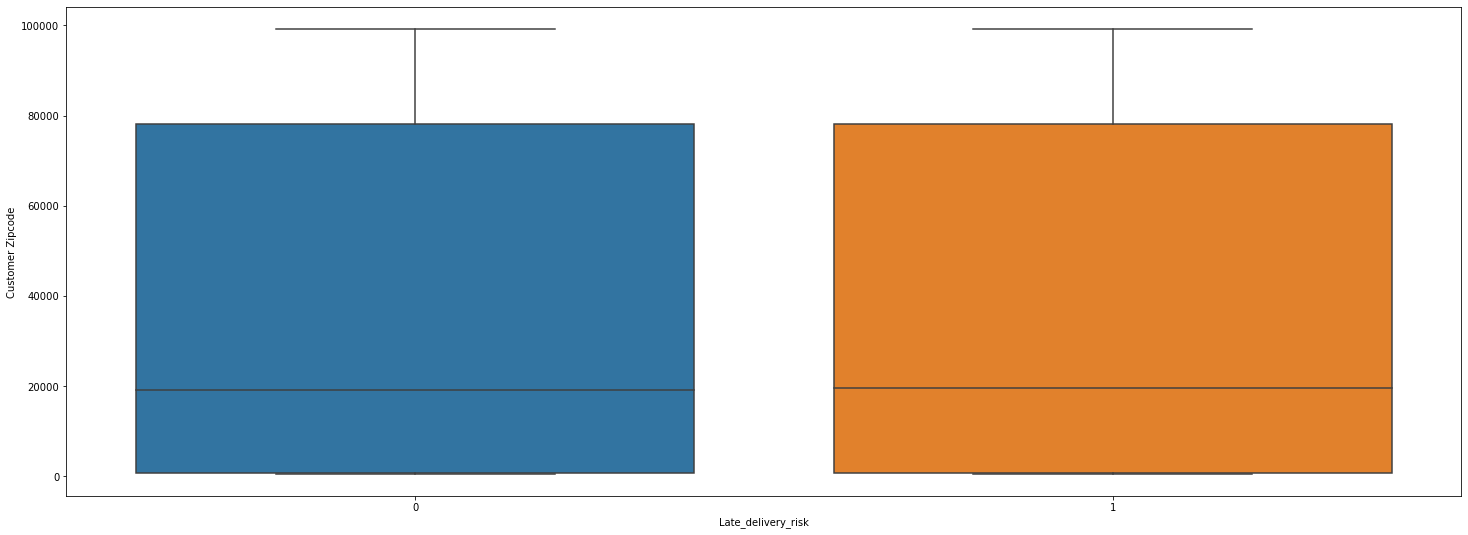

In [186]:
sns.boxplot(data['Late_delivery_risk'],data['Customer Zipcode'])
plt.show()

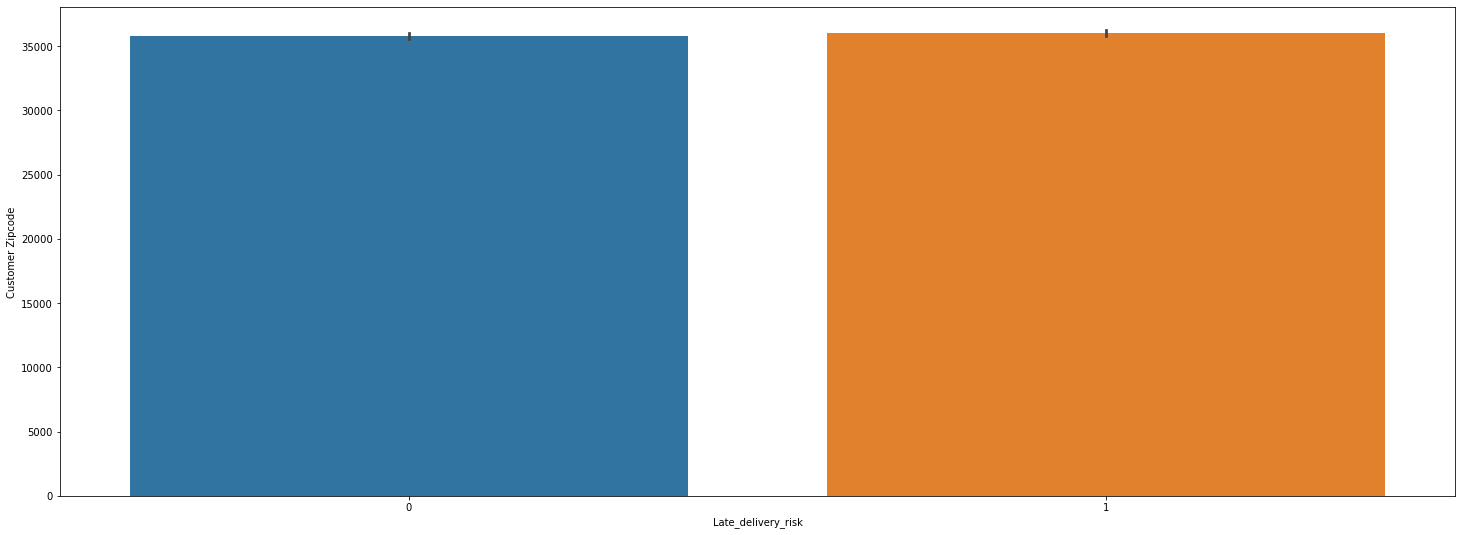

In [187]:
sns.barplot(data['Late_delivery_risk'],data['Customer Zipcode'])
plt.show()

*  Late Delivery Risk seems to have almost same distribution fot both the classes. 

* statical test of independency

In [188]:
model=sfa.ols("data['Customer Zipcode']~target",data=data).fit()
print(anova_lm(model))

                df        sum_sq       mean_sq        F  PR(>F)
target         1.0  2.520892e+09  2.520892e+09  1.78859  0.1811
Residual  180514.0  2.544219e+14  1.409430e+09      NaN     NaN


* Since the Pvalue is greater than 0.05 so we can conclude that Customer zipcode has no effect on Late Delivery Risk

In [189]:
data.drop(['Customer Zipcode'],axis=1,inplace=True)

In [190]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Zipcode','Customer Zipcode','contain many unique values','Significant according to annova test','customer zipcode may have relevance with order delay']

# feature 20::: Department Id

In [191]:
data_dictionary.iloc[20,:]

FIELDS                       Department Id
DESCRIPTION    :  Department code of store
Name: 20, dtype: object

* this feature contain info of the department code of the Store

In [192]:
data['Department Id'].unique()

array([ 2,  4,  5,  3,  6,  7, 10,  8,  9, 11, 12], dtype=int64)

In [193]:
data['Department Id'].value_counts()

7     66861
4     48998
5     33220
3     14525
6      9686
2      2479
9      2026
10     1465
11      492
8       405
12      362
Name: Department Id, dtype: int64

In [194]:
data['Department Id'].value_counts([0])

7     0.370382
4     0.271428
5     0.184025
3     0.080462
6     0.053656
2     0.013733
9     0.011223
10    0.008115
11    0.002725
8     0.002244
12    0.002005
Name: Department Id, dtype: float64

* stores have 11 diffrent deparments where max number of order lies in 7 num department

In [195]:
data['Department Id'].describe()

count    180519.000000
mean          5.443460
std           1.629246
min           2.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          12.000000
Name: Department Id, dtype: float64

In [196]:
data['Department Id'].dtypes

dtype('int64')

In [197]:
data['Department Id']=data['Department Id'].astype('object')

<AxesSubplot:xlabel='Department Id', ylabel='count'>

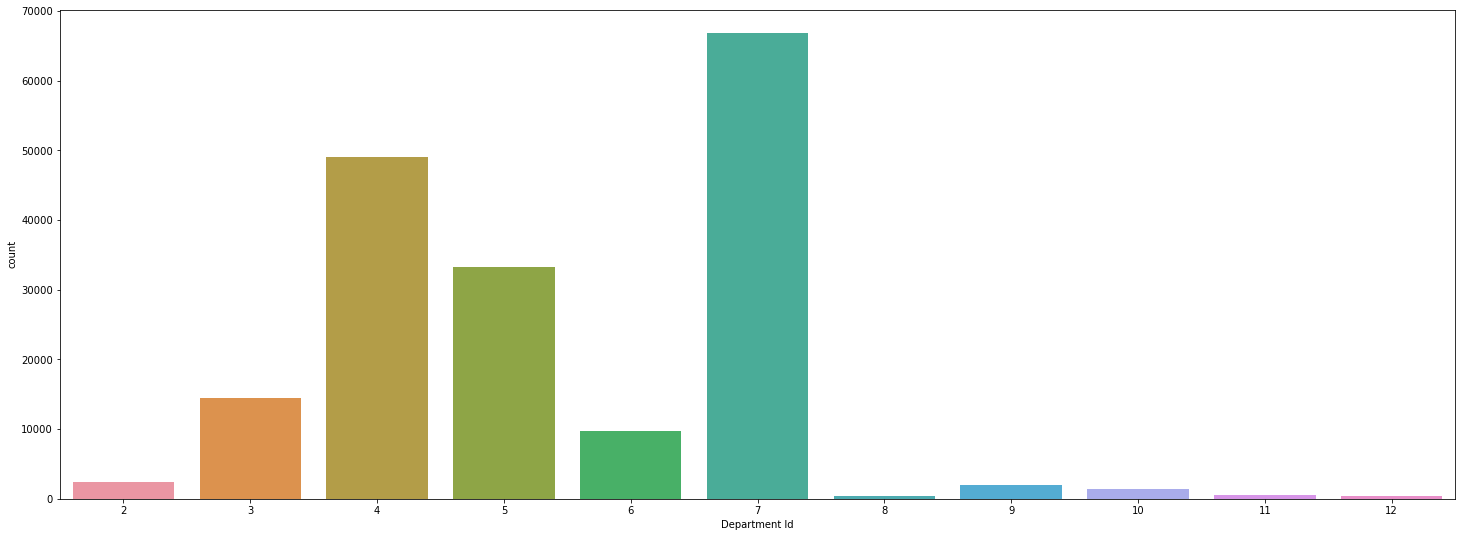

In [198]:
sns.countplot(data['Department Id'])

# Bi-Varient Analysis

<AxesSubplot:xlabel='Department Id'>

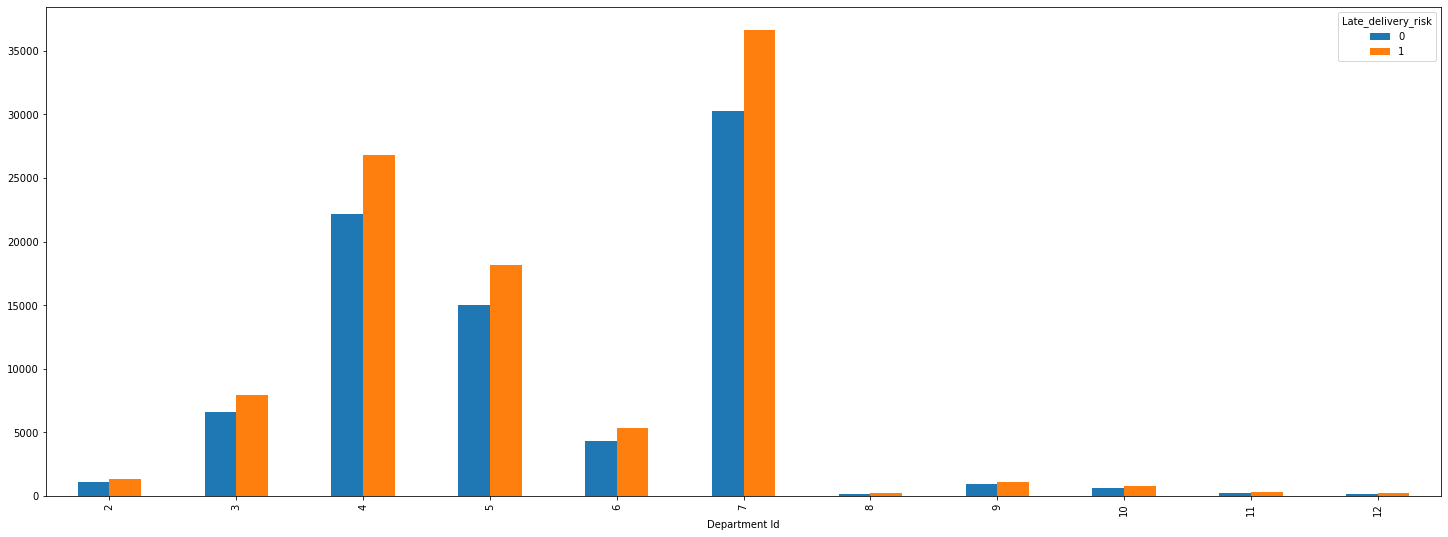

In [199]:
table=table=pd.crosstab(data['Department Id'],target)
table.plot(kind='bar')

* statical test of indepency

In [200]:
c, p, dof, expected = chi2_contingency(table)
p

0.7564916045517328

* Since the Pvalue is more than 0.05 so we can conclude that Department Id has no effect on Late Delivery Risk

In [201]:
data.drop(['Department Id'],axis=1,inplace=True)

In [202]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Department Id','Department code of store','Contain uniform distribution among all the departments','not significant according to chi-square','No effect on order delay']

# Feature 21 Department Name

In [203]:
data_dictionary.iloc[21,:]

FIELDS                     Department Name
DESCRIPTION    :  Department name of store
Name: 21, dtype: object

* this feature contain info about deparment name of stores

In [204]:
len(data['Department Name'].unique())

11

In [205]:
data['Department Name'].value_counts()

Fan Shop              66861
Apparel               48998
Golf                  33220
Footwear              14525
Outdoors               9686
Fitness                2479
Discs Shop             2026
Technology             1465
Pet Shop                492
Book Shop               405
Health and Beauty       362
Name: Department Name, dtype: int64

In [206]:
data['Department Name'].value_counts([0])

Fan Shop              0.370382
Apparel               0.271428
Golf                  0.184025
Footwear              0.080462
Outdoors              0.053656
Fitness               0.013733
Discs Shop            0.011223
Technology            0.008115
Pet Shop              0.002725
Book Shop             0.002244
Health and Beauty     0.002005
Name: Department Name, dtype: float64

* this feature contain 11 unique department names out of them 37 percent order belong to fan shop

<AxesSubplot:xlabel='Department Name', ylabel='count'>

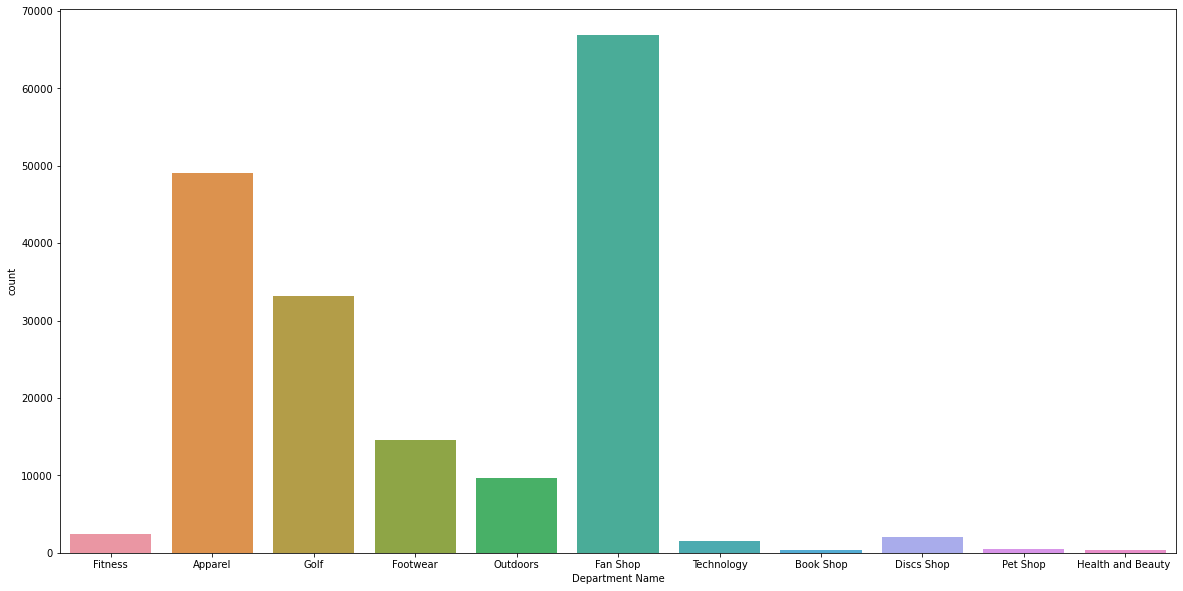

In [207]:
plt.figure(figsize=[20,10])
sns.countplot(data['Department Name'])

# Bi-Varient

<AxesSubplot:xlabel='Department Name'>

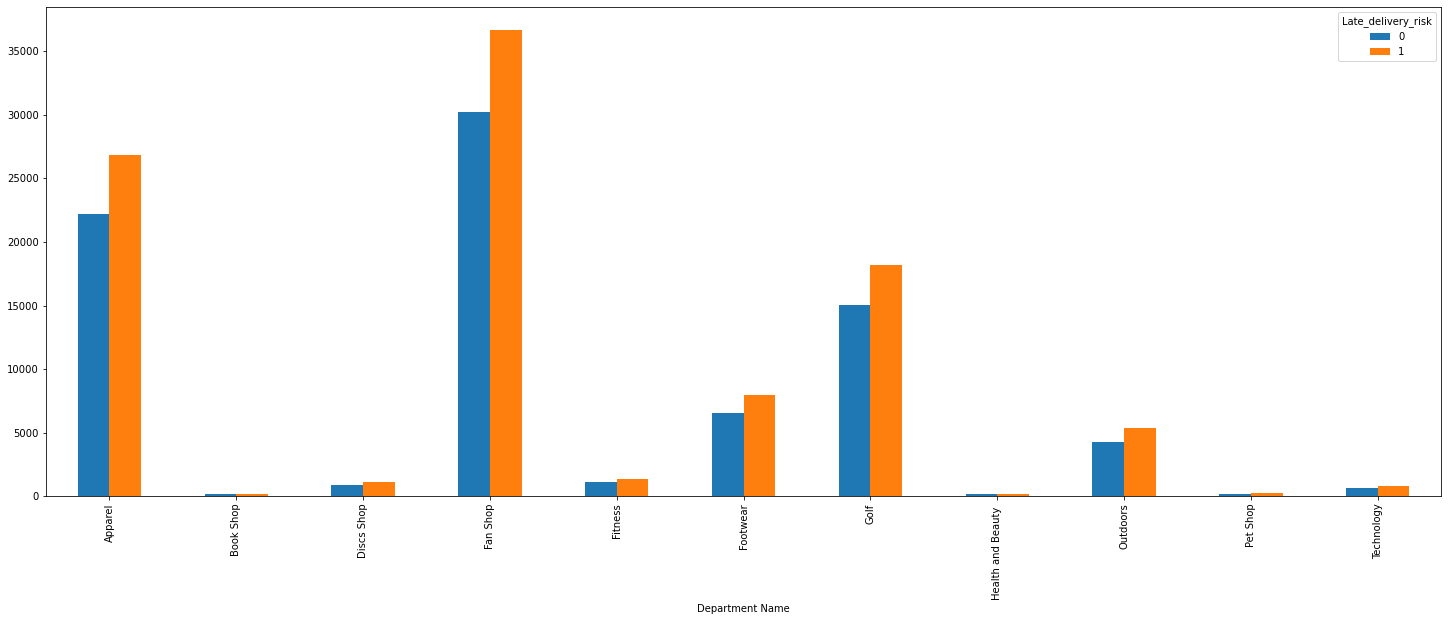

In [208]:
table=pd.crosstab(data['Department Name'],data['Late_delivery_risk'])
table.plot(kind='bar')

* Distribution of Late Delivery Risk seems to be same for both the classes
* People from Fan Shop has highest chance of Late Delivery Risk
* People from Technology has lowest chance of Late Delivery Risk

* statical test of indepedency

In [209]:
# Applying ChiSquare Contingency Test to check the effect of Department Name on Late Delivery Risk
teststats,pvalue,dof,exp_value=chi2_contingency(table)


In [210]:
print(pvalue)

0.7564916045517328


* Since the pvalue is greater than 0.05 so we conclude that Department Name has no effect no Late Delivery Risk

In [211]:
data.drop(['Department Name'],axis=1,inplace=True)

In [212]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Department Name','Department name of store','uniform distribution','no relevance according to chi2','Department Name has no effect on Delay']

# Feature 22 :: Latitude

In [213]:
data_dictionary.iloc[22,:]

FIELDS                                               Latitude
DESCRIPTION    :  Latitude corresponding to location of store
Name: 22, dtype: object

* this feature contain info about Latitude corresponding to location of store

In [214]:
len(data.Latitude.unique())  #

11250

In [215]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Latitude','Latitude corresponding to location of store','Cannot able to perform due to high unique values','not applicable','not applicable']

* we will drop the feature as it contain a huge amount of unique values and lattitude info which is not too much of use

# Feature 23 ::Longitude

In [216]:
data_dictionary.iloc[23,:]

FIELDS                                               Longitude
DESCRIPTION    :  Longitude corresponding to location of store
Name: 23, dtype: object

* this feature contain info of  Longitude corresponding to location of store

In [217]:
len(data.Longitude.unique())  #we will treat it same as longitude

4487

 * we will treat it same as longitude

* lets drop feature lattitude and longitude

In [218]:
data.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [219]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Longitude','Longitude corresponding to location of store','Cannot able to perform due to high unique values','not applicable','not applicable']

# Feature 24 :: Market

In [220]:
data_dictionary.iloc[24,:]

FIELDS                                                    Market
DESCRIPTION    :  Market to where the order is delivered : Af...
Name: 24, dtype: object

* this feature contsin info of the Market to where the order is delivered

In [221]:
data['Market'].unique()

array(['Pacific Asia', 'USCA', 'Africa', 'Europe', 'LATAM'], dtype=object)

In [222]:
data['Market'].value_counts()

LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64

In [223]:
data['Market'].value_counts([0])

LATAM           0.285809
Europe          0.278375
Pacific Asia    0.228563
USCA            0.142916
Africa          0.064337
Name: Market, dtype: float64

In [224]:
data['Market'].describe()

count     180519
unique         5
top        LATAM
freq       51594
Name: Market, dtype: object

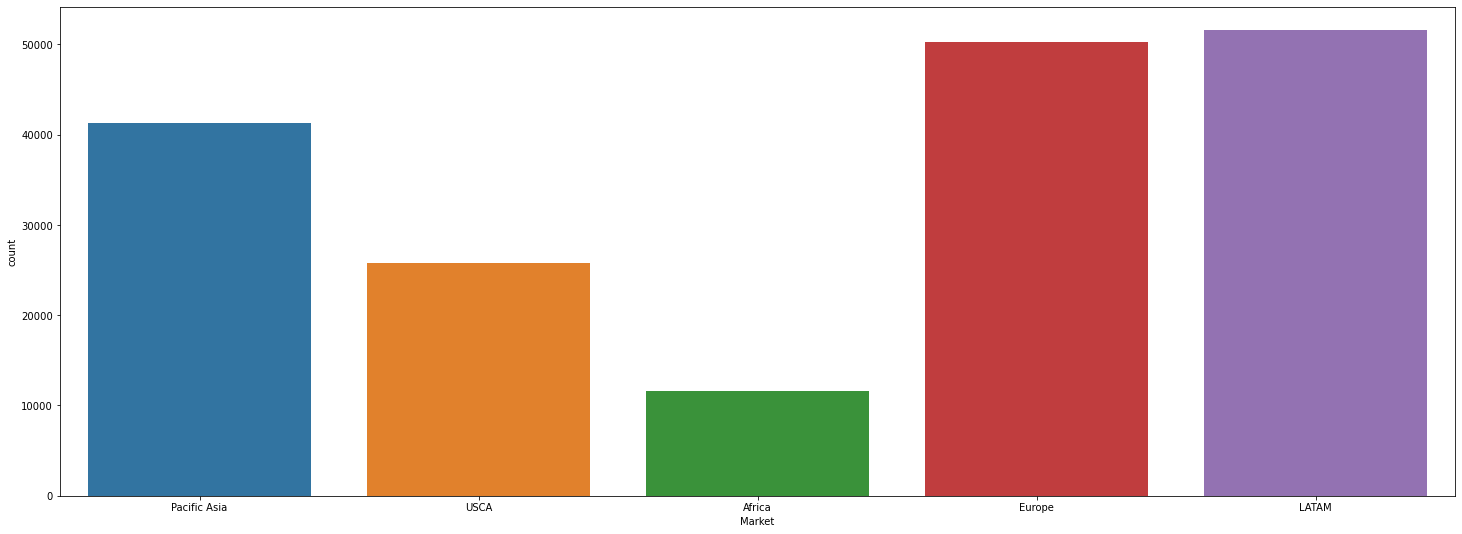

In [225]:
sns.countplot(data['Market'])
plt.show()

*  LATAM has the highest order in the market followed by Europe,Pacific Asia,USCA and Africa

# Bi-Varient Analysis

<AxesSubplot:xlabel='Market'>

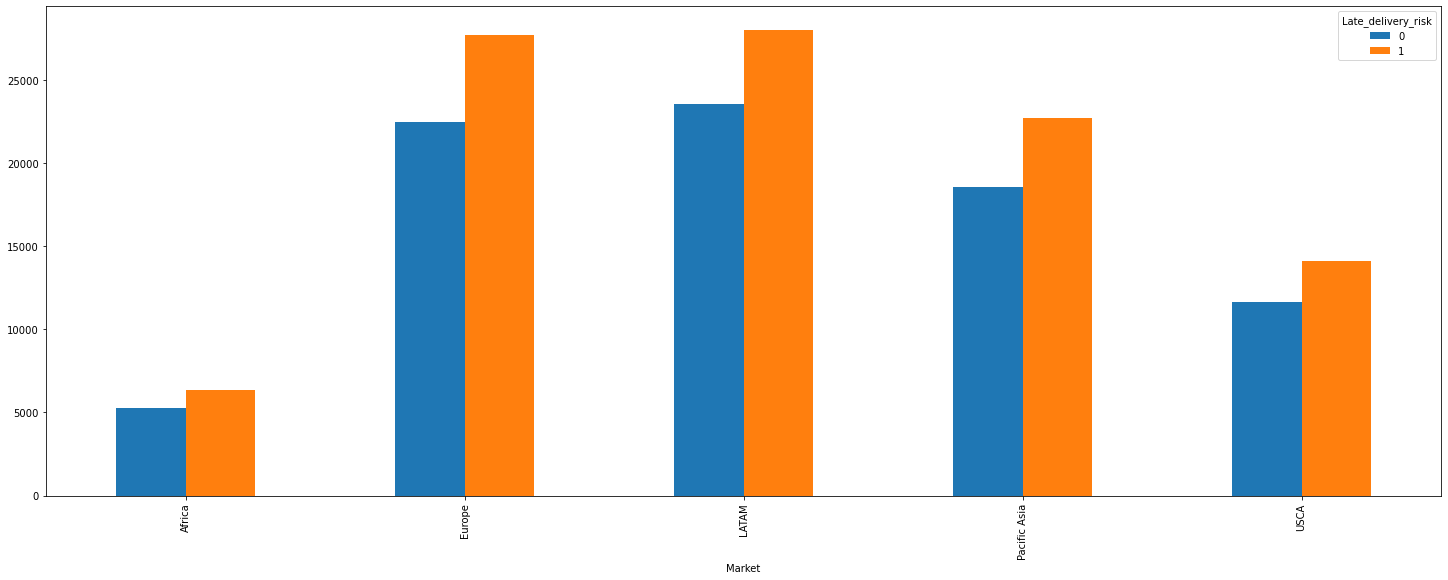

In [226]:
table=pd.crosstab(data['Market'],data['Late_delivery_risk'])
table.plot(kind='bar')

In [227]:
#Applying ChiSquare Contingency Test to check the effect of Market on Late Delivery Risk
teststats,pvalue,dof,exp_value=chi2_contingency(table)
print(pvalue)

0.07044822520489222


* Since the Pvalue is greater than 0.05 but value is 0.07 so we can will consider feature dependent

In [228]:
significant_feature.loc[len(significant_feature.index)]=['Market','name of continent where they operate ','Cannot be able to visualize due to many values','relevent according to chi_square','Market has impact on business ']

# Feature 25:::order city

In [229]:
data_dictionary.iloc[25,:]

FIELDS                               Order City
DESCRIPTION    :  Destination city of the order
Name: 25, dtype: object

* this feature contain info about Destination city of the order

In [230]:
data['Order City'].unique()

array(['Bekasi', 'Bikaner', 'Townsville', ..., 'Tongling', 'Liuyang',
       'Nashua'], dtype=object)

In [231]:
data['Order City'].describe()

count            180519
unique             3597
top       Santo Domingo
freq               2211
Name: Order City, dtype: object

In [232]:
data['Order City'].value_counts(normalize=True).head()

Santo Domingo    0.012248
New York City    0.012198
Los Angeles      0.010221
Tegucigalpa      0.009877
Managua          0.009318
Name: Order City, dtype: float64

* large number of cities we have to either drop it or bin it

# Bi-varient analysis

<AxesSubplot:xlabel='Order City'>

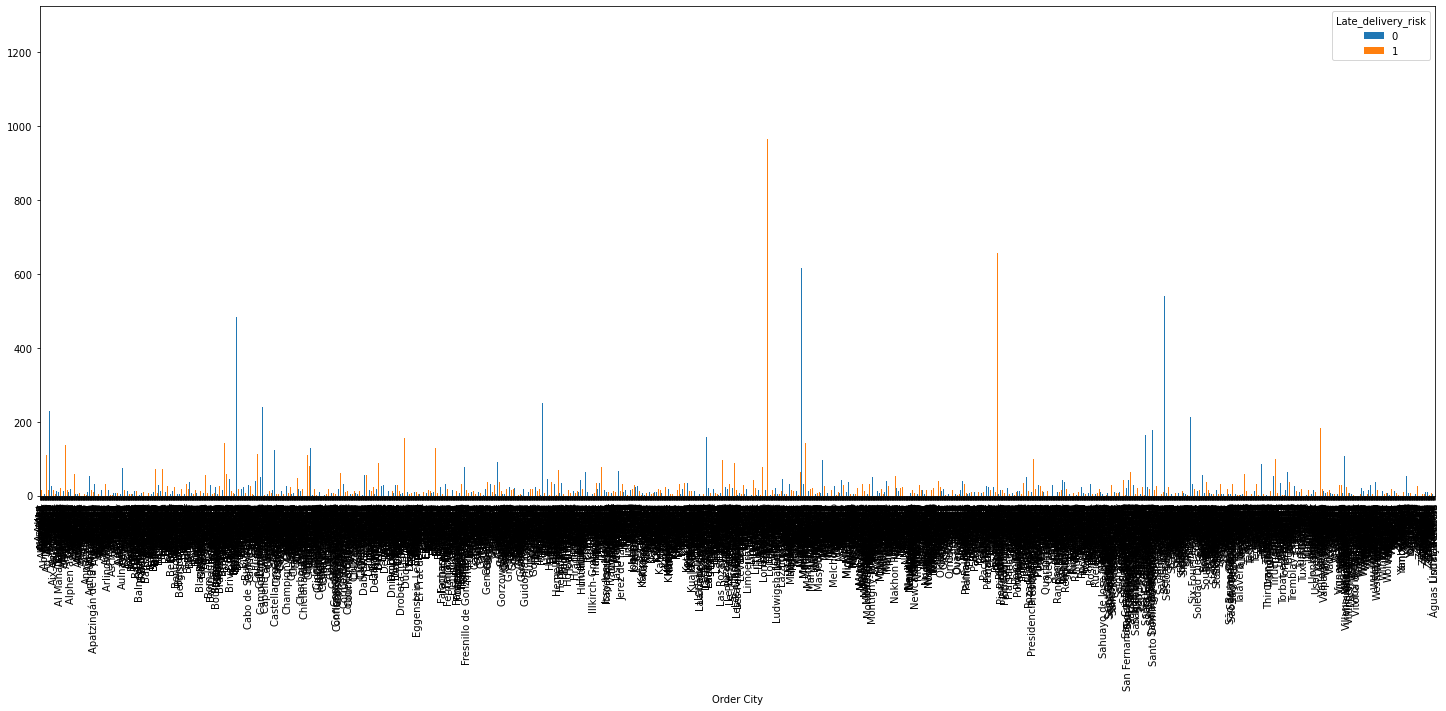

In [233]:
table=pd.crosstab(data['Order City'],data['Late_delivery_risk'])
table.plot(kind='bar')

# Statistical Analysis

In [234]:
#Applying ChiSquare Contingency Test to check the effect of Market on Late Delivery Risk
teststats,pvalue,dof,exp_value=chi2_contingency(table)
print(pvalue)

0.0


Since the Pvalue is less than 0.05 so we can will consider feature dependent

In [235]:
significant_feature.loc[len(significant_feature.index)]=['Order City','Name of the city from where the order is placed ','Cannot visualize due to many values','relevent according to chi_square','Order City has impact on business ']

# feature 26 ::Order Country

In [236]:
data_dictionary.iloc[26,:]

FIELDS                               Order Country
DESCRIPTION    :  Destination country of the order
Name: 26, dtype: object

* this feature contain information about the  Destination country of the order

In [237]:
data['Order Country'].unique()

array(['Indonesia', 'India', 'Australia', 'China', 'Japón',
       'Corea del Sur', 'Singapur', 'Turquía', 'Mongolia',
       'Estados Unidos', 'Nigeria', 'República Democrática del Congo',
       'Senegal', 'Marruecos', 'Alemania', 'Francia', 'Países Bajos',
       'Reino Unido', 'Guatemala', 'El Salvador', 'Panamá',
       'República Dominicana', 'Venezuela', 'Colombia', 'Honduras',
       'Brasil', 'México', 'Uruguay', 'Argentina', 'Cuba', 'Perú',
       'Nicaragua', 'Ecuador', 'Angola', 'Sudán', 'Somalia',
       'Costa de Marfil', 'Egipto', 'Italia', 'España', 'Suecia',
       'Austria', 'Canada', 'Madagascar', 'Argelia', 'Liberia', 'Zambia',
       'Níger', 'SudAfrica', 'Mozambique', 'Tanzania', 'Ruanda', 'Israel',
       'Nueva Zelanda', 'Bangladés', 'Tailandia', 'Irak', 'Arabia Saudí',
       'Filipinas', 'Kazajistán', 'Irán', 'Myanmar (Birmania)',
       'Uzbekistán', 'Benín', 'Camerún', 'Kenia', 'Togo', 'Ucrania',
       'Polonia', 'Portugal', 'Rumania', 'Trinidad y Tobago',


In [238]:
len(data['Order Country'].unique())

164

In [239]:
data['Order Country'].describe()

count             180519
unique               164
top       Estados Unidos
freq               24840
Name: Order Country, dtype: object

In [240]:
data['Order Country'].value_counts(normalize=True).head(10)

Estados Unidos    0.137603
Francia           0.073244
México            0.072967
Alemania          0.052981
Australia         0.047070
Brasil            0.044245
Reino Unido       0.040450
China             0.031897
Italia            0.027637
India             0.026496
Name: Order Country, dtype: float64

* contain 162 diffrent countries so we have to bin it to move forward/have to processed it

# Bi-varient analysis

<AxesSubplot:xlabel='Order Country'>

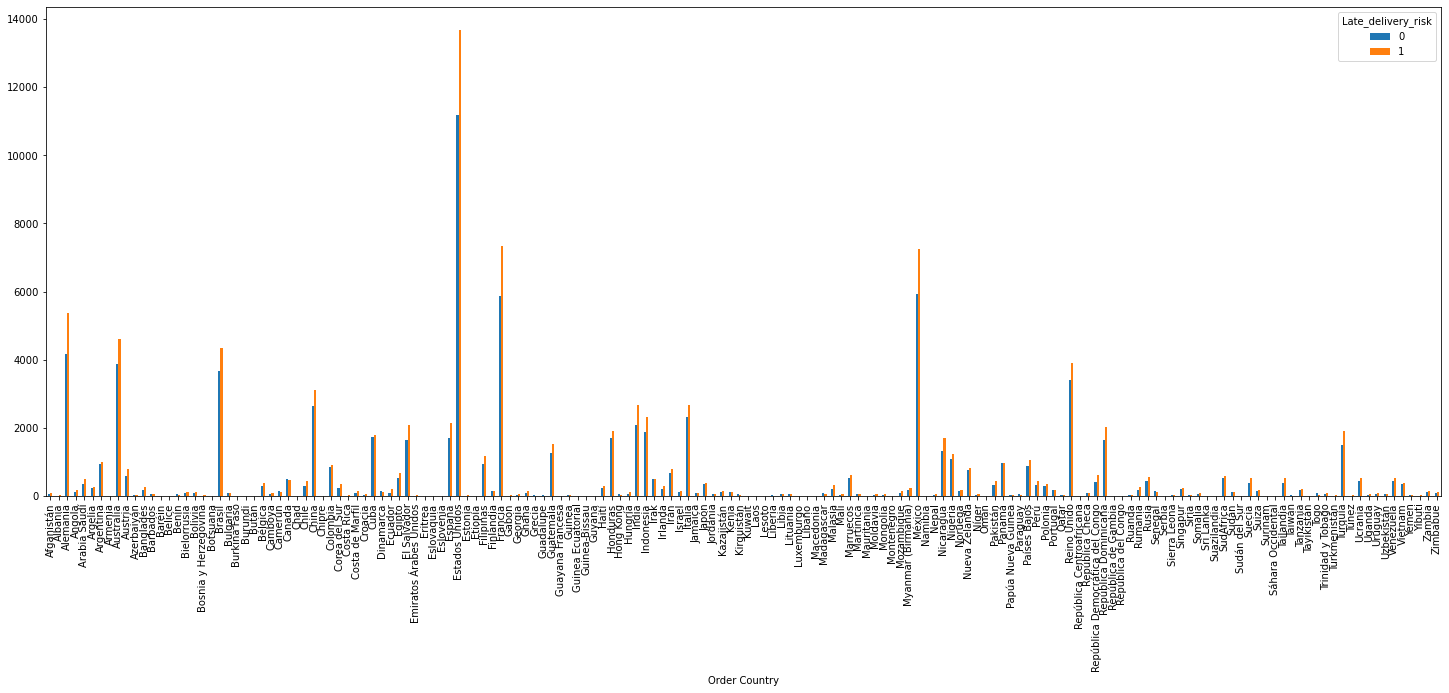

In [241]:
table=pd.crosstab(data['Order Country'],data['Late_delivery_risk'])
table.plot(kind='bar')

# Statistical Test

In [242]:
#Applying ChiSquare Contingency Test to check the effect of Order Country on Late Delivery Risk
teststats,pvalue,dof,exp_value=chi2_contingency(table)
print(pvalue)

4.0108437231692065e-48


Since the Pvalue is less than 0.05 so we can will consider feature dependent.

In [243]:
significant_feature.loc[len(significant_feature.index)]=['Order Country','Name of the Country from where the order is placed ','Cannot visualize due to many values','relevent according to chi_square','Order Country has impact on business ']

# Feature 27:: order customer id

In [244]:
data_dictionary.iloc[27,:]

FIELDS              Order Customer Id
DESCRIPTION    :  Customer order code
Name: 27, dtype: object

* this feature contain infor about the  Customer order code

In [245]:
data['Order Customer Id'].describe()

count    180519.000000
mean       6691.379495
std        4162.918106
min           1.000000
25%        3258.500000
50%        6457.000000
75%        9779.000000
max       20757.000000
Name: Order Customer Id, dtype: float64

In [246]:
len(data['Order Customer Id'].unique())

20652

In [247]:
data['Order Customer Id'].value_counts().head()

5654     47
10591    45
5004     45
5715     44
3708     44
Name: Order Customer Id, dtype: int64

* a huge amount of unique values we will frop it after extracting useful meterial

# Bi-varient analysis

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Customer Id'>

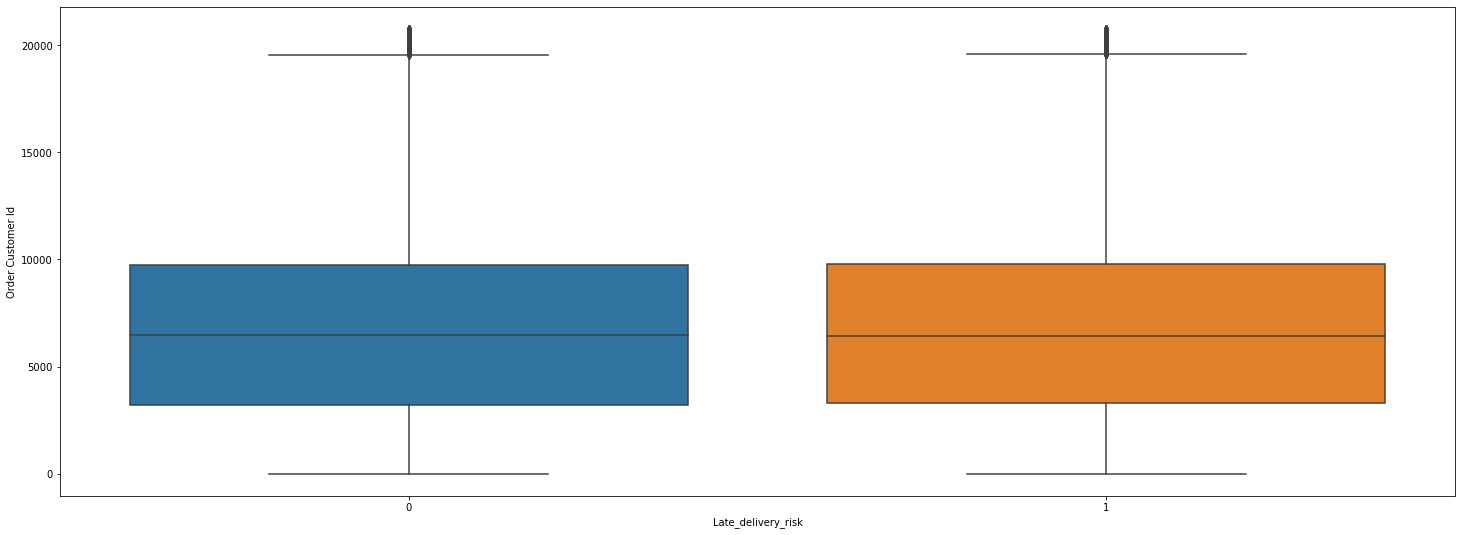

In [248]:
sns.boxplot(x=target,y =data['Order Customer Id'] )

# Statistical Test

In [249]:
model=sfa.ols("data['Order Customer Id']~target",data=data).fit()
print(anova_lm(model))

                df        sum_sq       mean_sq         F    PR(>F)
target         1.0  6.893530e+06  6.893530e+06  0.397781  0.528238
Residual  180517.0  3.128350e+12  1.732994e+07       NaN       NaN


In [250]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Order Customer Id','Customer order code','contain only  XXXX for each observation','not applicable','not applicable']

In [251]:
data.drop(['Order Customer Id'],axis=1,inplace=True)

# Feature 28 order date

In [252]:
data_dictionary.iloc[28,:]

FIELDS                    order date (DateOrders)
DESCRIPTION    :  Date on which the order is made
Name: 28, dtype: object

* this feature contain info of the  Date on which the order is made

In [253]:
data['order date (DateOrders)']=data['order date (DateOrders)'].str.split(' ').str[0]

In [254]:
significant_feature.loc[len(significant_feature.index)]=['order date (DateOrders)',' Date on which the order is made','date feature we will try to extract something','not applicable for now','we will see further']

# Feature 29:Order Id

In [255]:
data_dictionary.iloc[29,:]

FIELDS              Order Id
DESCRIPTION    :  Order code
Name: 29, dtype: object

* this feature contain information about Order code/order id atached with each order

In [256]:
len(data['Order Id'].unique())# 65752 diffrent observation we have to drop it

65752

# Bi_varient 

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Id'>

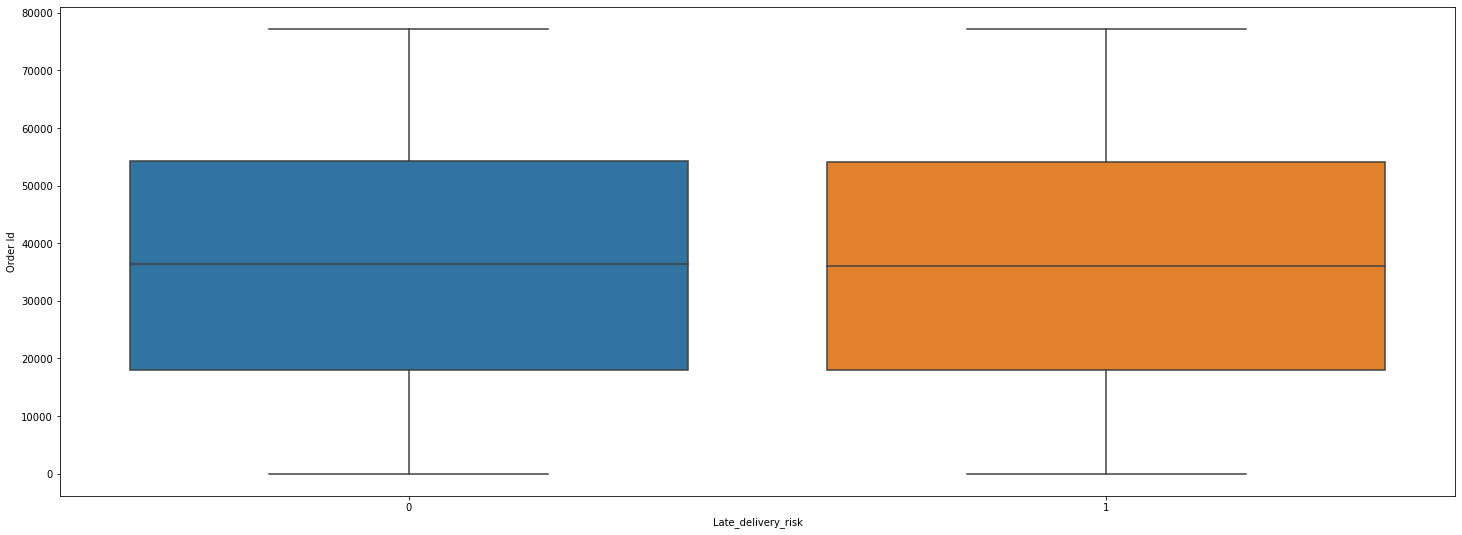

In [257]:
sns.boxplot(x=target,y =data['Order Id'])

# Stats test

In [258]:
model=sfa.ols("data['Order Id']~target",data=data).fit()
print(anova_lm(model))

                df        sum_sq       mean_sq         F    PR(>F)
target         1.0  1.335922e+08  1.335922e+08  0.301624  0.582867
Residual  180517.0  7.995273e+13  4.429097e+08       NaN       NaN


In [259]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Order Id',' Order code','Uniform distribution among the class','not applicable','not applicable']

In [260]:
data.drop('Order Id',axis=1,inplace=True)

# feature 30::Order Item Cardprod Id

In [261]:
data_dictionary.iloc[30,:]

FIELDS                                    Order Item Cardprod Id
DESCRIPTION    :  Product code generated through the RFID reader
Name: 30, dtype: object

* this feature contain info about Product code generated through the RFID reader

In [262]:
len(data['Order Item Cardprod Id'].unique())

118

In [263]:
data['Order Item Cardprod Id'].describe()

count    180519.000000
mean        692.509764
std         336.446807
min          19.000000
25%         403.000000
50%         627.000000
75%        1004.000000
max        1363.000000
Name: Order Item Cardprod Id, dtype: float64

In [264]:
data['Order Item Cardprod Id'].value_counts([0]).head(20)

365     0.135803
403     0.123234
502     0.116525
1014    0.106903
1004    0.095973
1073    0.085864
957     0.076053
191     0.067411
627     0.058814
1362    0.004642
1350    0.003612
1363    0.003601
1349    0.003279
1361    0.002930
1359    0.002725
1355    0.002681
1353    0.002681
1354    0.002676
1351    0.002448
1358    0.002404
Name: Order Item Cardprod Id, dtype: float64

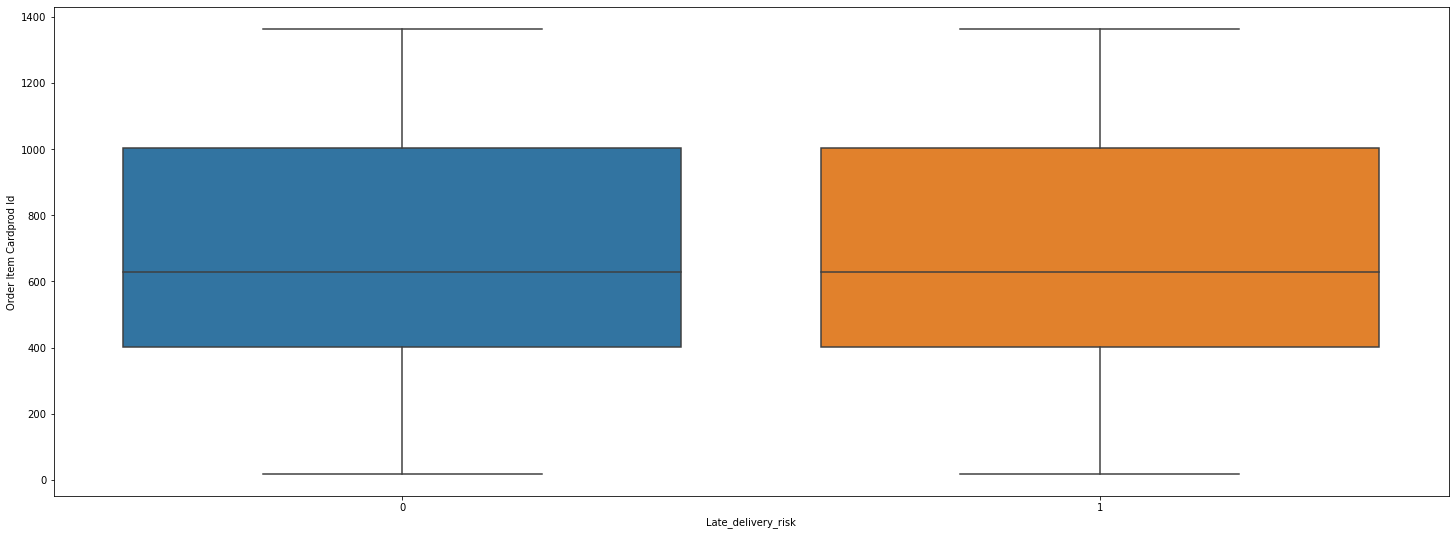

In [265]:
sns.boxplot(data['Late_delivery_risk'],data['Order Item Cardprod Id'])
plt.show()


In [266]:
model=sfa.ols("Late_delivery_risk~data['Order Item Cardprod Id']",data=data).fit()
print(anova_lm(model))

                                      df        sum_sq  mean_sq         F  \
data['Order Item Cardprod Id']       1.0      0.099210  0.09921  0.400574   
Residual                        180517.0  44708.671246  0.24767       NaN   

                                  PR(>F)  
data['Order Item Cardprod Id']  0.526794  
Residual                             NaN  


In [267]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Order Item Cardprod Id','Product code generated through the RFID reader','Uniform distribution among the class','no relevance according to Annova','No business relevance']

# Feature 31:: Order Item Discount

In [268]:
data_dictionary.iloc[31,:]

FIELDS                  Order Item Discount
DESCRIPTION    :  Order item discount value
Name: 31, dtype: object

* this feature contain information about  Order item discount value


In [269]:
data['Order Item Discount'].describe()

count    180519.000000
mean         20.664741
std          21.800901
min           0.000000
25%           5.400000
50%          14.000000
75%          29.990000
max         500.000000
Name: Order Item Discount, dtype: float64

<AxesSubplot:xlabel='Order Item Discount'>

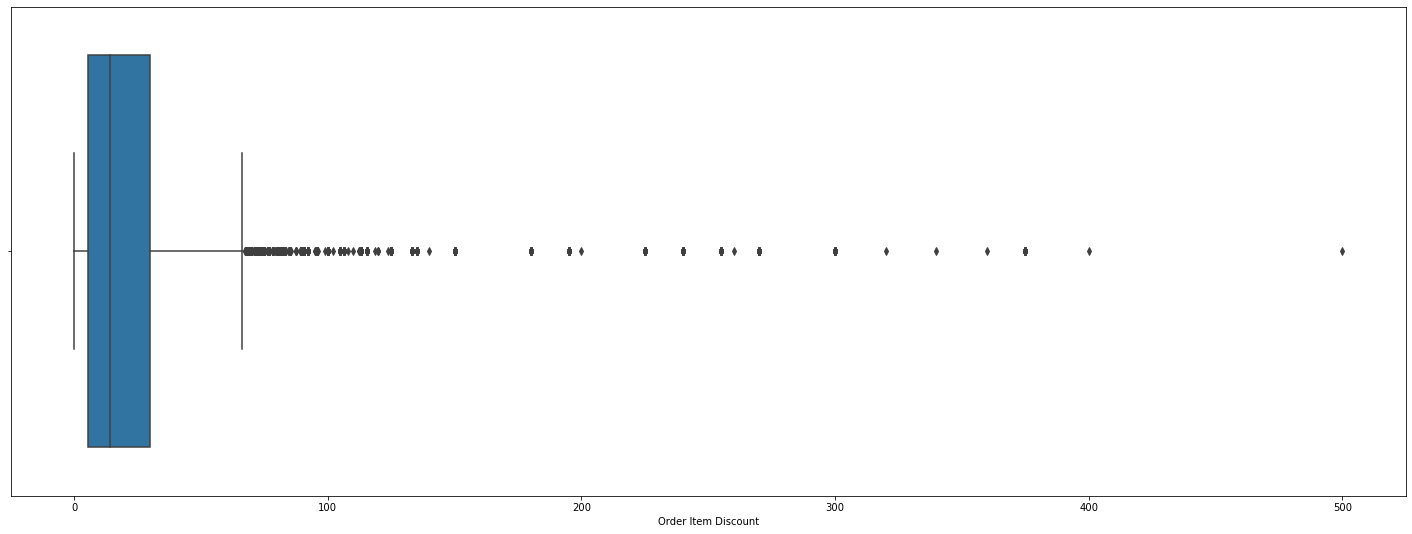

In [270]:
sns.boxplot(data['Order Item Discount'])

<AxesSubplot:xlabel='Order Item Discount', ylabel='Density'>

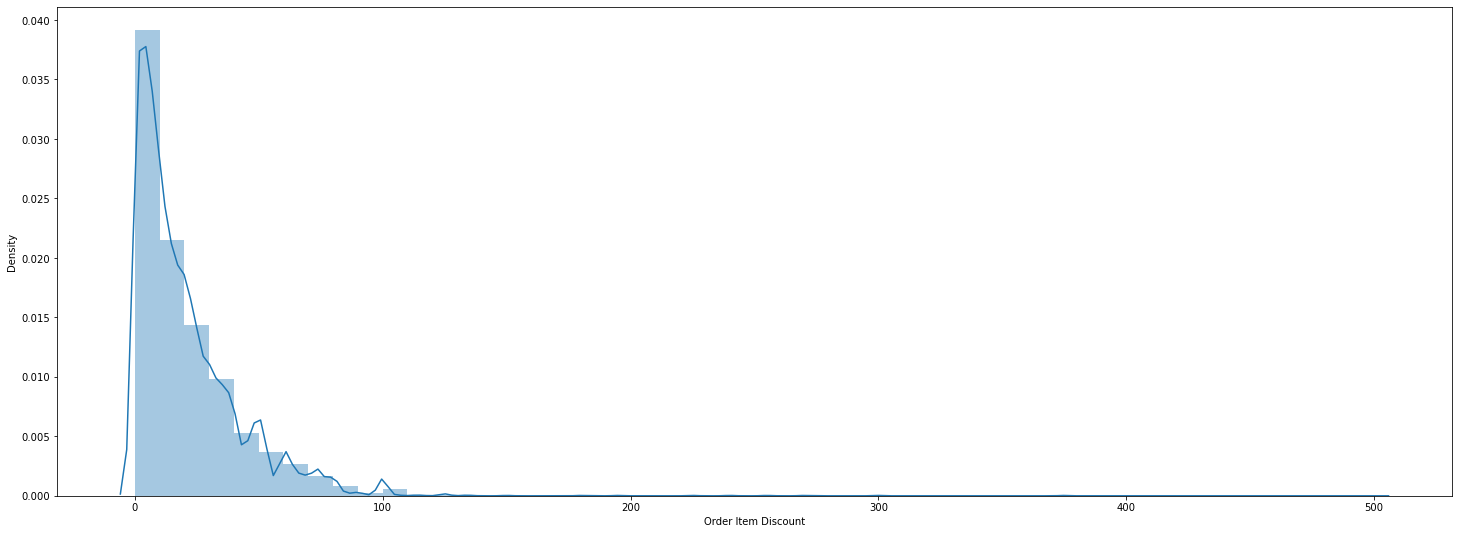

In [271]:
sns.distplot(data['Order Item Discount'])

* large number of outliers are present

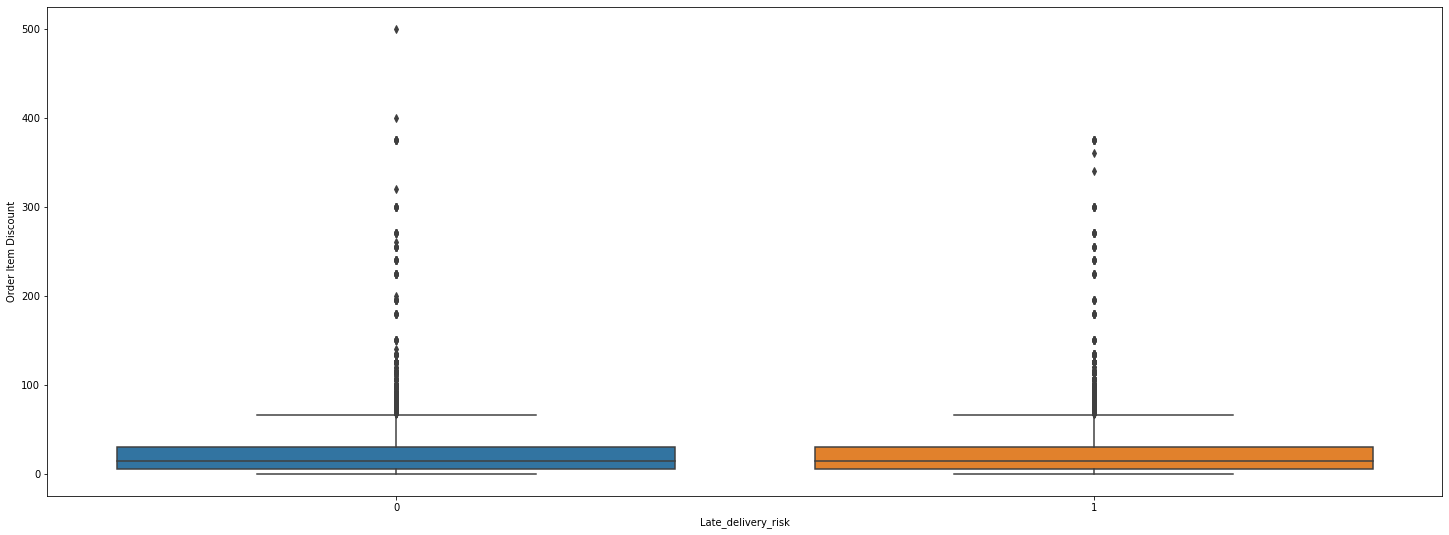

In [272]:
#Bivariate
sns.boxplot(data['Late_delivery_risk'],data['Order Item Discount'])
plt.show()


In [273]:
# Applying Anova_lm to verify the effect of Order Item Discount on Late Delivery Risk
model=sfa.ols("Late_delivery_risk~data['Order Item Discount']",data=data).fit()
print(anova_lm(model))

                                   df        sum_sq   mean_sq         F  \
data['Order Item Discount']       1.0      0.025143  0.025143  0.101516   
Residual                     180517.0  44708.745314  0.247671       NaN   

                               PR(>F)  
data['Order Item Discount']  0.750018  
Residual                          NaN  


In [274]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Order Item Discount','Order item discount value','Uniform distribution among the class','no relevance according to Annova','Order item discount has not impact on business']

In [275]:
un_significant_feature

feature name                                     description  \
0        Benefit per order                       Earnings per order placed   
1       Sales per customer                       Total sales per customer    
2              Customer Id                           Product category code   
3            Category Name             Description of the product category   
4         Customer Country    Country where the customer made the purchase   
5           Customer Email                              Email of customers   
6           Customer Fname                         First name of customers   
7              Customer Id                                 Id of customers   
8        Customer Password                             Masked customer key   
9         Customer Segment                              Types of Customers   
10                 Zipcode                                Customer Zipcode   
11           Department Id                        Department code of store   
12         Department Name                        Department name of store   
13                Latitude     Latitude corresponding to location of store   
14               Longitude    Longitude corresponding to location of store   
15       Order Customer Id                             Customer order code   
16                Order Id                                      Order code   
17  Order Item Cardprod Id  Product code generated through the RFID reader   
18     Order Item Discount                       Order item discount value   

                                bivarient observation  \
0            it displays positive and negative values   
1                    it displays uniform distribution   
2                    it displays uniform distribution   
3                    it displays uniform distribution   
4                    it displays uniform distribution   
5             contain only  XXXX for each observation   
6                           contain unique first name   
7                          contain unique customer id   
8             contain only  XXXX for each observation   
9             Uniform distribution among all segments   
10                         contain many unique values   
11  Contain uniform distribution among all the dep...   
12                               uniform distribution   
13   Cannot able to perform due to high unique values   
14   Cannot able to perform due to high unique values   
15            contain only  XXXX for each observation   
16               Uniform distribution among the class   
17               Uniform distribution among the class   
18               Uniform distribution among the class   

                              statical test  \
0          unrelevant according to anova_lm   
1          unrelevant according to anova_lm   
2              unrelevant according to chi2   
3              unrelevant according to chi2   
4              unrelevant according to chi2   
5                            not applicable   
6                            not applicable   
7        no relevance according to anova_lm   
8                            not applicable   
9     Unsignificant according to chi-square   
10     Significant according to annova test   
11  not significant according to chi-square   
12           no relevance according to chi2   
13                           not applicable   
14                           not applicable   
15                           not applicable   
16                           not applicable   
17         no relevance according to Annova   
18         no relevance according to Annova   

                                   business relevence  
0                               no relevance on delay  
1                               no relevance on delay  
2                                       no relevance   
3                                       no relevance   
4                                    may impact delay  
5                                  

# Feature 32 ::Order Item Discount Rate  

In [276]:
data_dictionary.iloc[32,:]

FIELDS             Order Item Discount Rate     
DESCRIPTION    :  Order item discount percentage
Name: 32, dtype: object

* this feature contain info about the Order item discount percentage

In [277]:
data['Order Item Discount Rate'].describe()

count    180519.000000
mean          0.101668
std           0.070415
min           0.000000
25%           0.040000
50%           0.100000
75%           0.160000
max           0.250000
Name: Order Item Discount Rate, dtype: float64

* we will try to find info from it

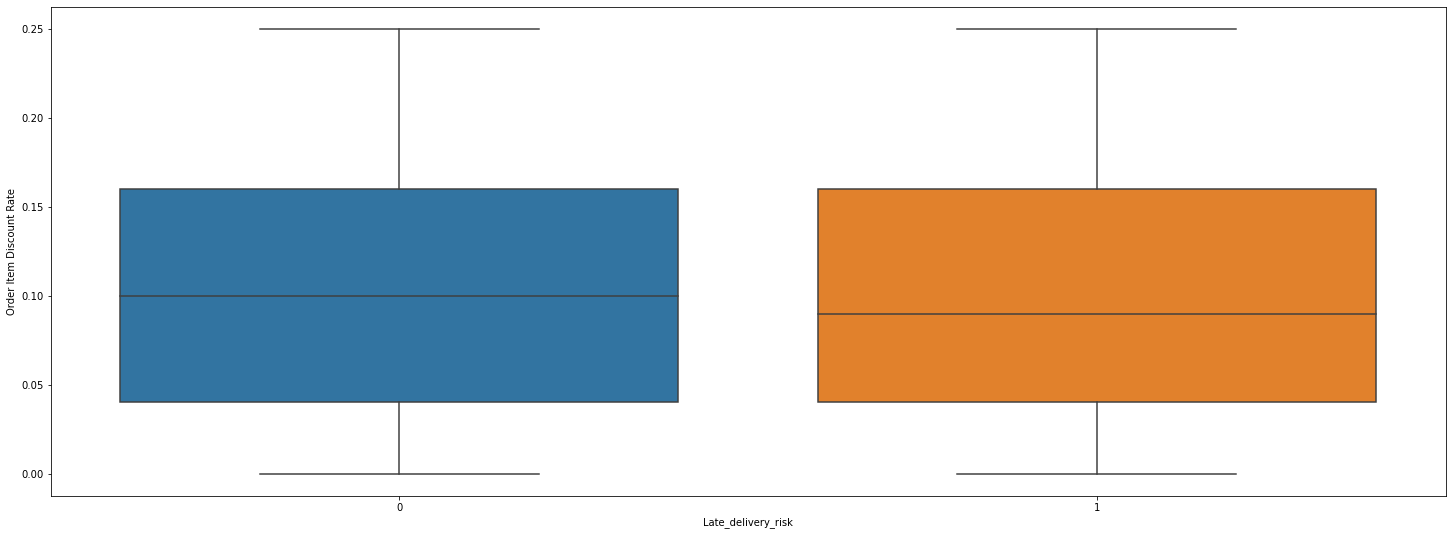

In [278]:
#Bivariate
sns.boxplot(data['Late_delivery_risk'],data['Order Item Discount Rate'])
plt.show()


In [279]:
model=sfa.ols("Late_delivery_risk~data['Order Item Discount Rate']",data=data).fit()
print(anova_lm(model))

                                        df        sum_sq   mean_sq         F  \
data['Order Item Discount Rate']       1.0      0.007308  0.007308  0.029507   
Residual                          180517.0  44708.763148  0.247671       NaN   

                                    PR(>F)  
data['Order Item Discount Rate']  0.863614  
Residual                               NaN  


In [280]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Order Item Discount Rate',"Order item discount percentage",'Uniform distribution among the class','unsignificant according to Annova','No relevance']

# Feature 33:: Order Item Id

In [281]:
data_dictionary.iloc[33,:]

FIELDS              Order Item Id
DESCRIPTION    :  Order item code
Name: 33, dtype: object

* this feature contain info about Order item code

In [282]:
len(data[ 'Order Item Id'].unique())

180519

* contain unique values for each order 

In [283]:
data.drop([ 'Order Item Id'],axis=1,inplace=True)

In [284]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Order Item Id',"Order item code",'contain unique values for each order','not applicable','No relevance']

# feature 34 :: Order Item Product Price

In [285]:
data_dictionary.iloc[34,:]

FIELDS                 Order Item Product Price     
DESCRIPTION    :  Price of products without discount
Name: 34, dtype: object

* this featurre contain information about the Price of products without discount

In [286]:
data['Order Item Product Price'].describe()

count    180519.000000
mean        141.232550
std         139.732492
min           9.990000
25%          50.000000
50%          59.990002
75%         199.990005
max        1999.989990
Name: Order Item Product Price, dtype: float64

<AxesSubplot:xlabel='Order Item Product Price'>

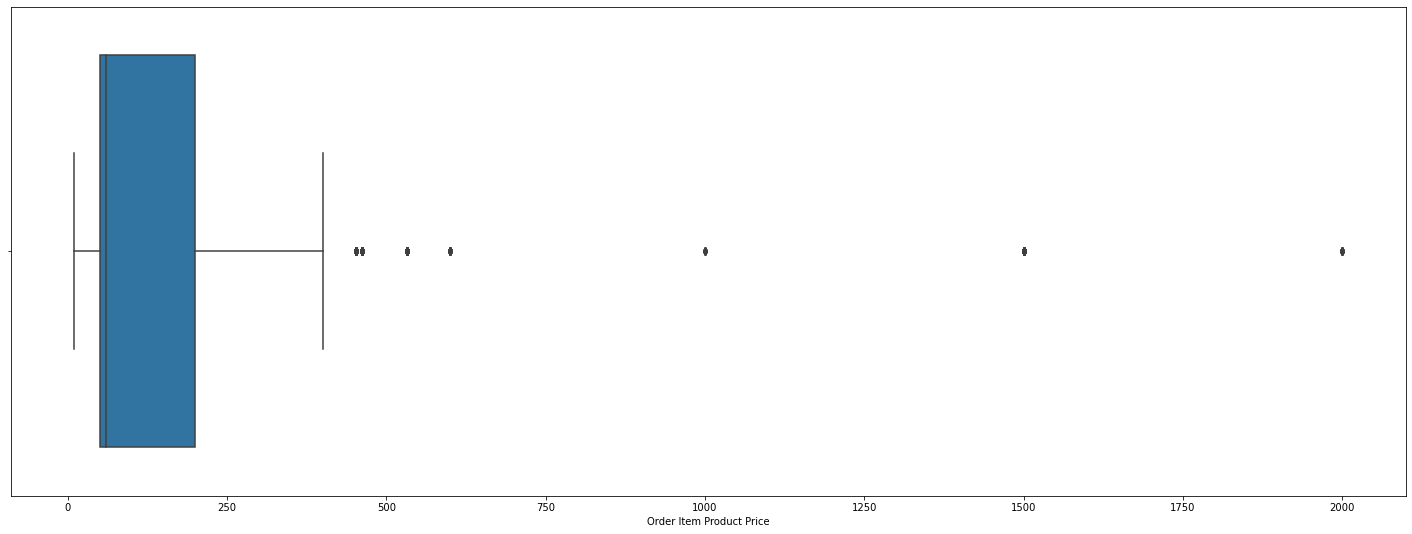

In [287]:
sns.boxplot(data['Order Item Product Price'])

<AxesSubplot:xlabel='Order Item Product Price', ylabel='Density'>

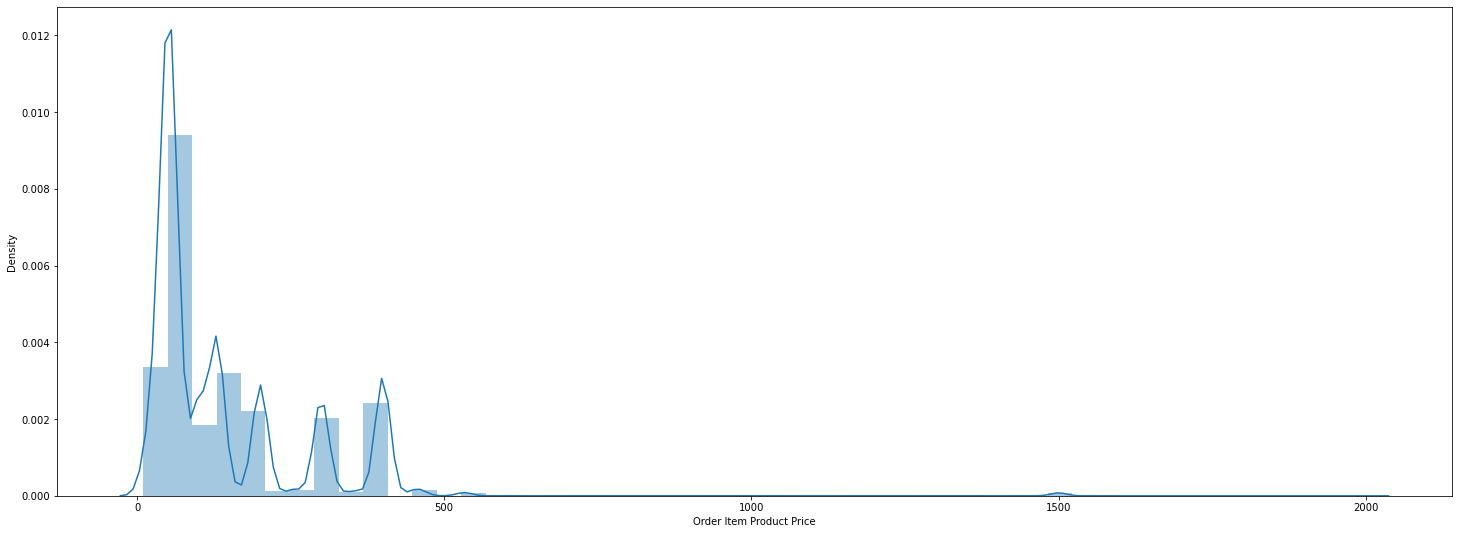

In [288]:
sns.distplot(data['Order Item Product Price'])

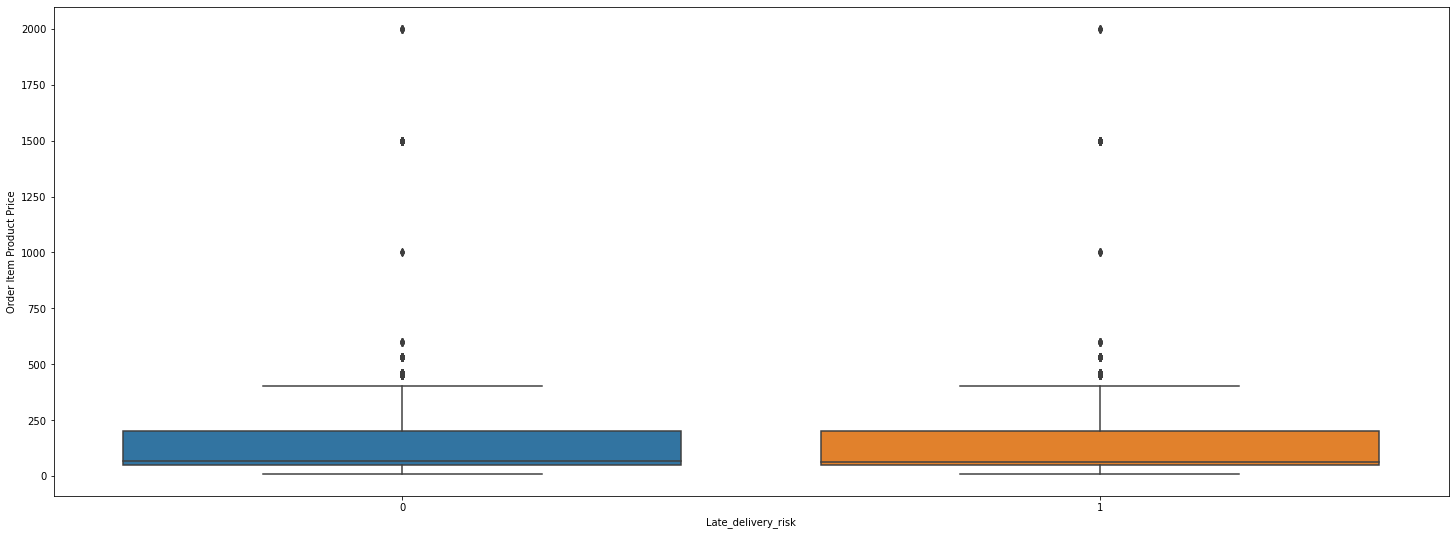

In [289]:
#Bivariate
sns.boxplot(data['Late_delivery_risk'],data['Order Item Product Price'])
plt.show()


In [290]:
#Statical test
model=sfa.ols("Late_delivery_risk~data['Order Item Product Price']",data=data).fit()
print(anova_lm(model))

                                        df        sum_sq   mean_sq         F  \
data['Order Item Product Price']       1.0      0.211549  0.211549  0.854158   
Residual                          180517.0  44708.558907  0.247670       NaN   

                                   PR(>F)  
data['Order Item Product Price']  0.35538  
Residual                              NaN  


In [291]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Order Item Product Price',"Price of products without discount",'Uniform distribution among the class','unsignificant according to annova','No relevance']

# feature 35 ::Order Item Profit Ratio

In [292]:
data_dictionary.iloc[35,:]

FIELDS            Order Item Profit Ratio
DESCRIPTION    :  Order Item Profit Ratio
Name: 35, dtype: object

* this feature contain info about Order Item Profit Ratio


In [293]:
data['Order Item Profit Ratio'].head()

0    0.29
1   -0.80
2   -0.80
3    0.08
4    0.45
Name: Order Item Profit Ratio, dtype: float64

In [294]:
data['Order Item Profit Ratio'].describe()

count    180519.000000
mean          0.120647
std           0.466796
min          -2.750000
25%           0.080000
50%           0.270000
75%           0.360000
max           0.500000
Name: Order Item Profit Ratio, dtype: float64

<AxesSubplot:xlabel='Order Item Profit Ratio'>

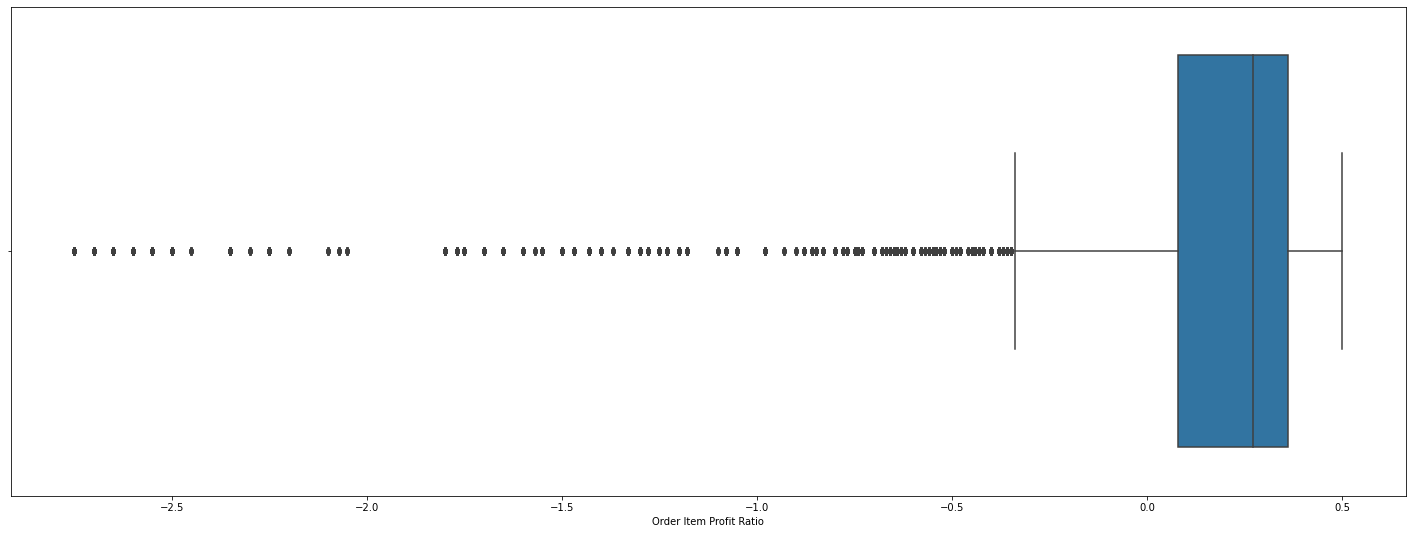

In [295]:
sns.boxplot(data['Order Item Profit Ratio'])

<AxesSubplot:xlabel='Order Item Profit Ratio', ylabel='Density'>

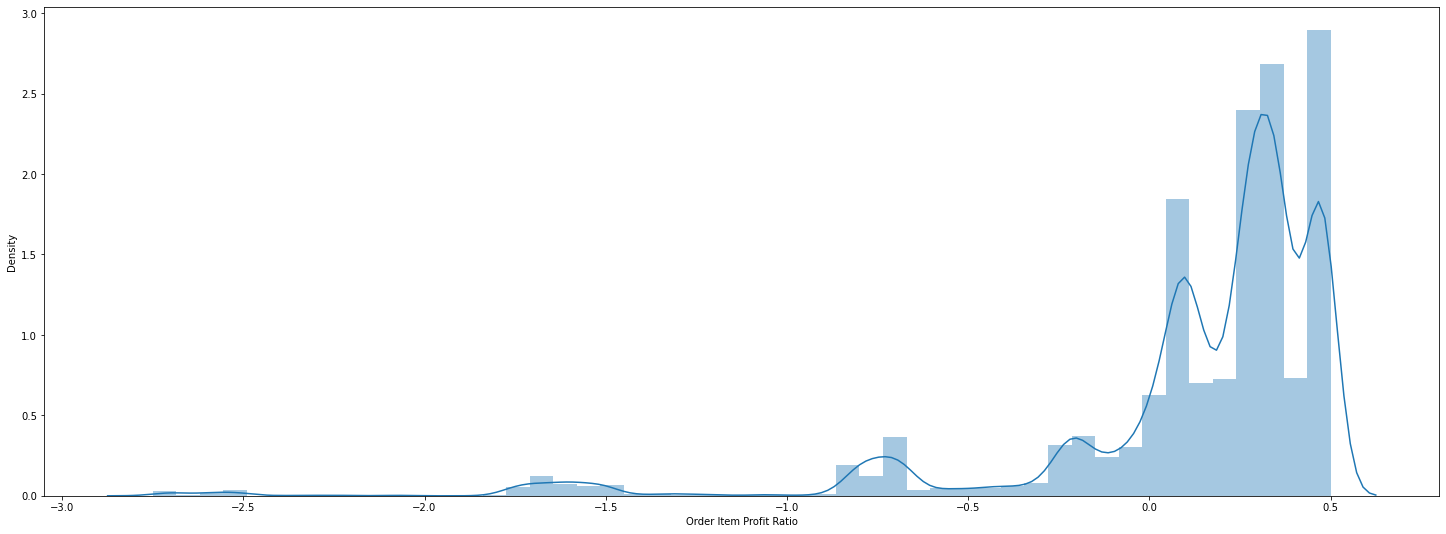

In [296]:
sns.distplot(data['Order Item Profit Ratio'])

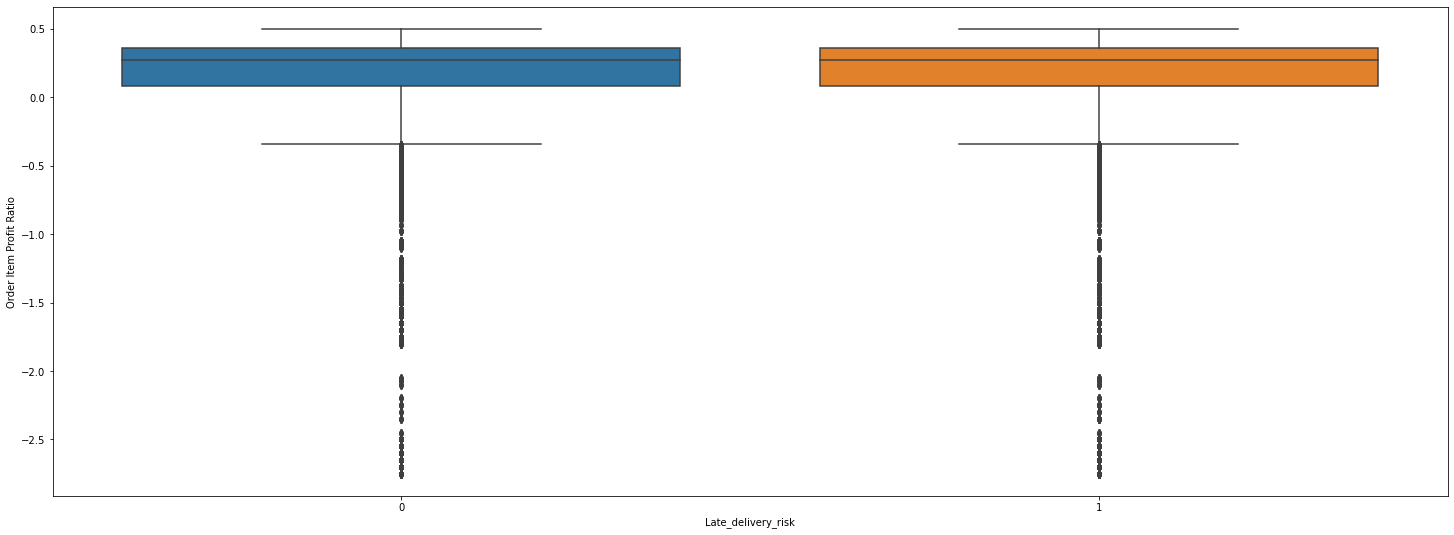

In [297]:
#Bivariate
sns.boxplot(data['Late_delivery_risk'],data['Order Item Profit Ratio'])
plt.show()


In [298]:
#Statical test
model=sfa.ols("Late_delivery_risk~data['Order Item Profit Ratio']",data=data).fit()
print(anova_lm(model))

                                       df        sum_sq   mean_sq         F  \
data['Order Item Profit Ratio']       1.0      0.239708  0.239708  0.967855   
Residual                         180517.0  44708.530748  0.247669       NaN   

                                   PR(>F)  
data['Order Item Profit Ratio']  0.325217  
Residual                              NaN  


In [299]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Order Item Profit Ratio'," Order Item Profit Ratio",'Uniform distribution among the class','unsignificant according to annova','No relevance']

# Feature 36:: Order Item Quantity

In [300]:
data_dictionary.iloc[36,:]

FIELDS                     Order Item Quantity
DESCRIPTION    :  Number of products per order
Name: 36, dtype: object

* this feature info about the Number of products per order

In [301]:
data['Order Item Quantity'].unique()

array([1, 2, 3, 5, 4], dtype=int64)

In [302]:
data['Order Item Quantity'].value_counts()

1    99134
5    20385
3    20350
4    20335
2    20315
Name: Order Item Quantity, dtype: int64

In [303]:
data['Order Item Quantity'].value_counts([0])

1    0.549161
5    0.112924
3    0.112731
4    0.112647
2    0.112537
Name: Order Item Quantity, dtype: float64

<AxesSubplot:xlabel='Order Item Quantity', ylabel='count'>

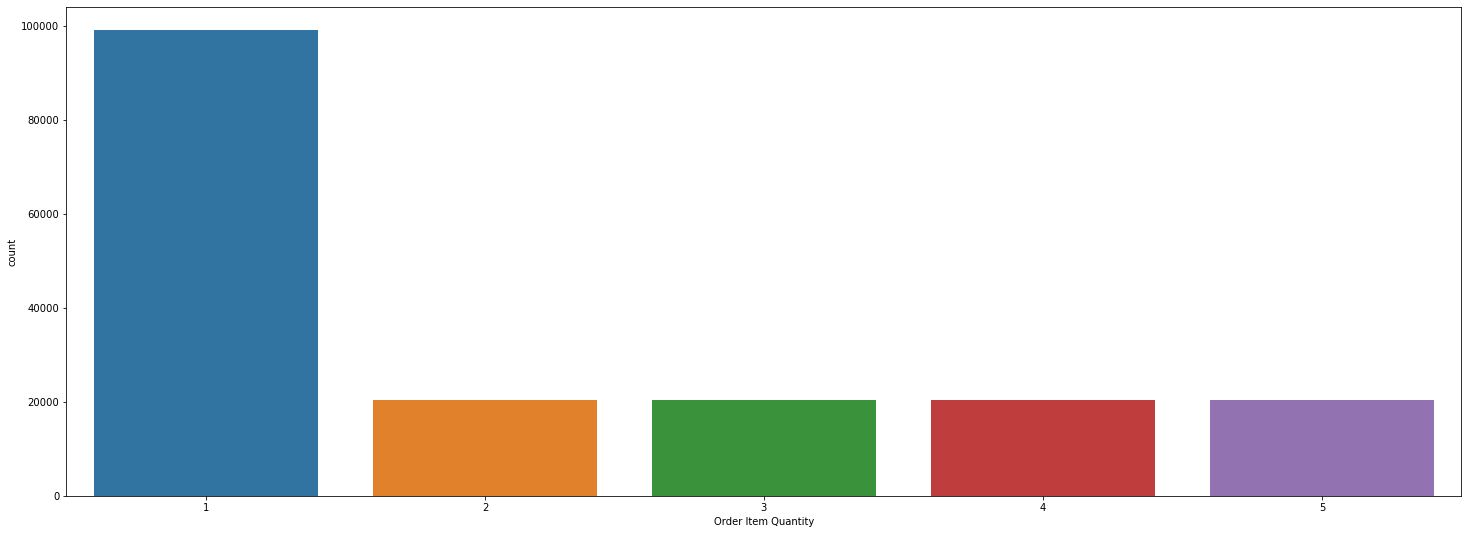

In [304]:
sns.countplot(data['Order Item Quantity'])

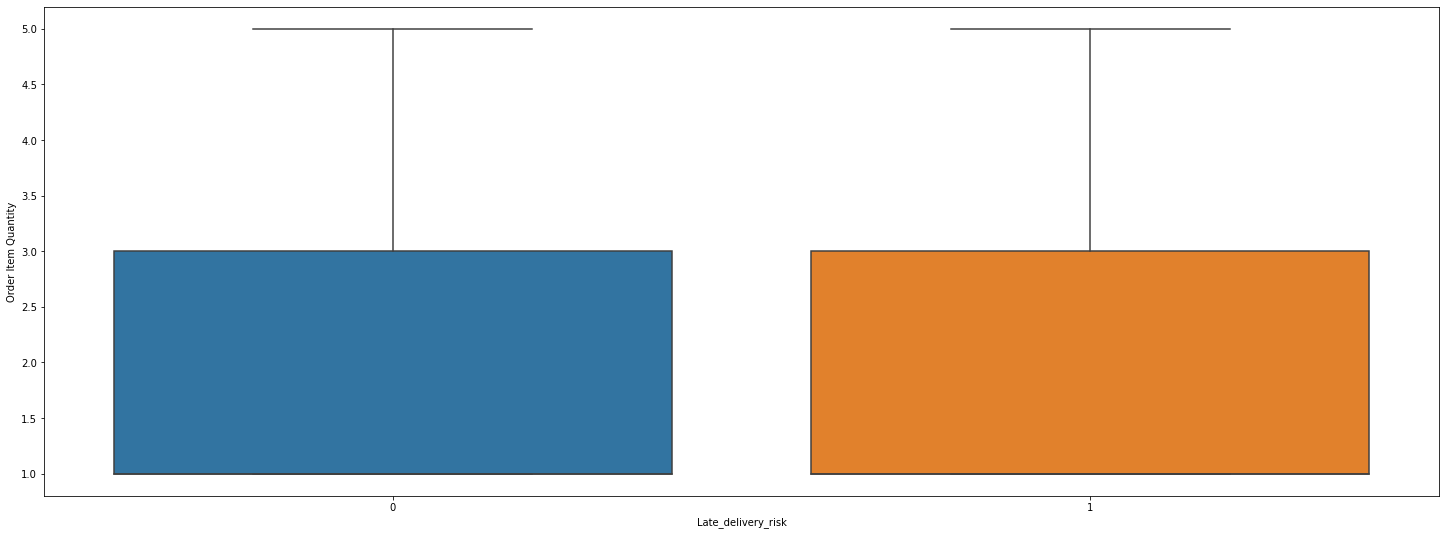

In [305]:
#Bivariate
sns.boxplot(data['Late_delivery_risk'],data['Order Item Quantity'])
plt.show()



In [306]:
#Statical test
model=sfa.ols("Late_delivery_risk~data['Order Item Quantity']",data=data).fit()
print(anova_lm(model))


                                   df        sum_sq   mean_sq         F  \
data['Order Item Quantity']       1.0      0.000867  0.000867  0.003499   
Residual                     180517.0  44708.769590  0.247671       NaN   

                               PR(>F)  
data['Order Item Quantity']  0.952828  
Residual                          NaN  


In [307]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Order Item Quantity','Number of products per order','Uniform distribution among the class','unsignificant according to annova','No relevance']

# feature 37 ::Sales

In [308]:
data_dictionary.iloc[37,:]

FIELDS                     Sales
DESCRIPTION    :  Value in sales
Name: 37, dtype: object

* this feature contain the info about  Value in sales

In [309]:
data['Sales'].describe()

count    180519.000000
mean        203.772096
std         132.273077
min           9.990000
25%         119.980003
50%         199.919998
75%         299.950012
max        1999.989990
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Sales'>

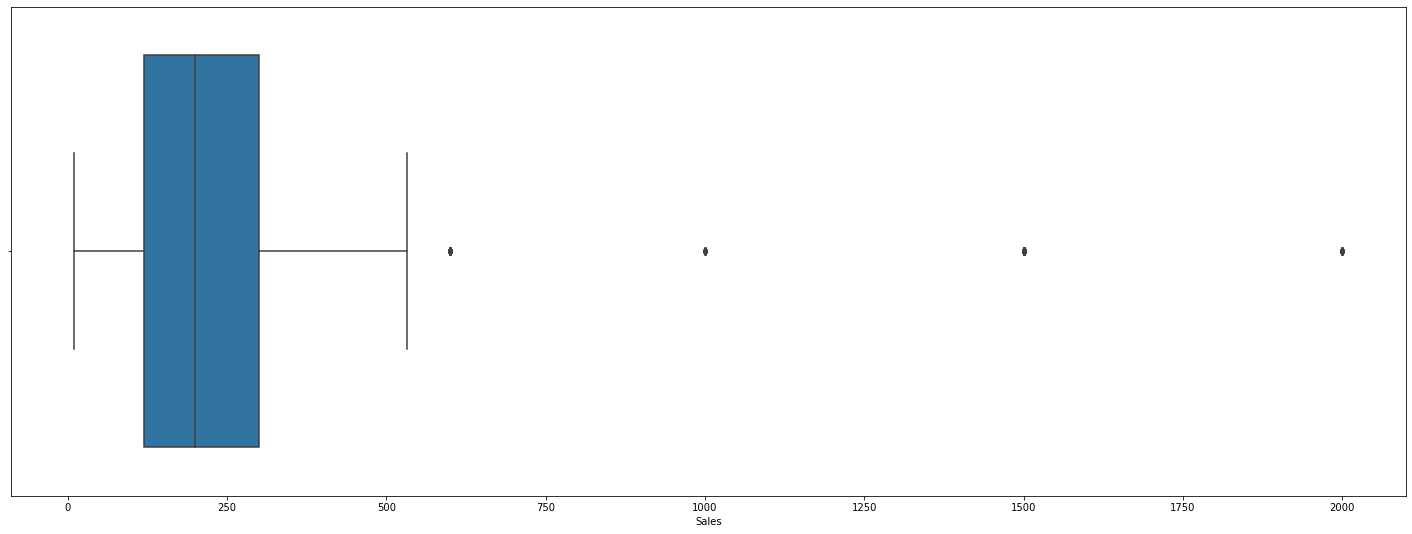

In [310]:
sns.boxplot(data['Sales'])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

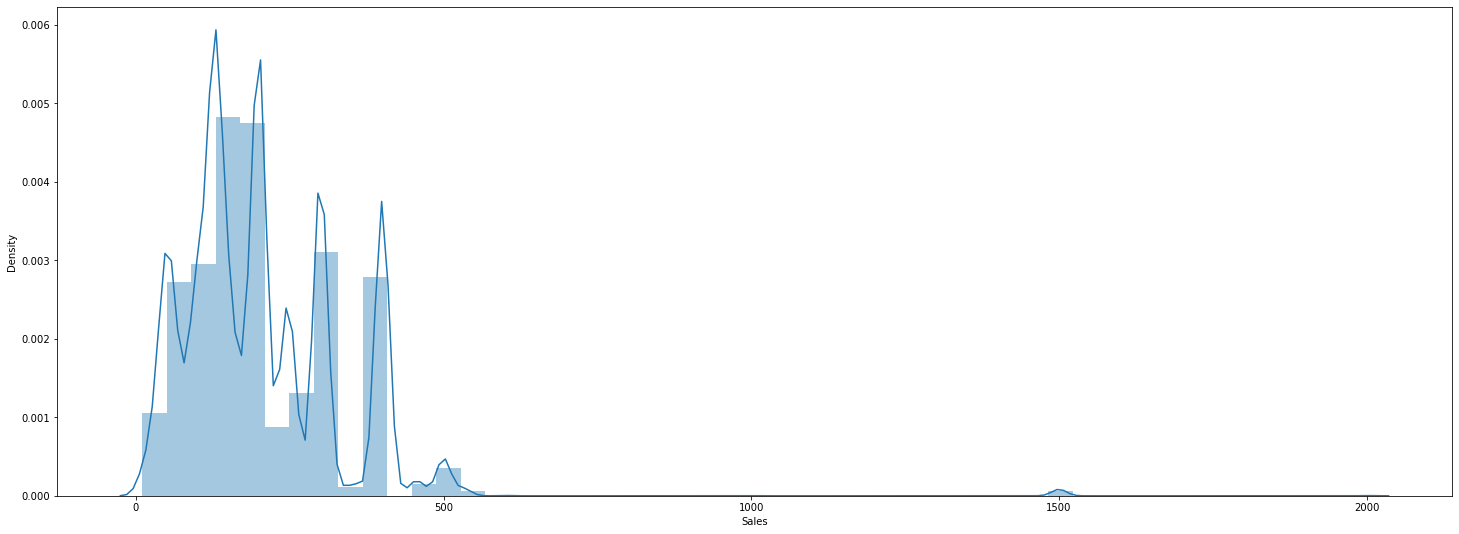

In [311]:
sns.distplot(data['Sales'])

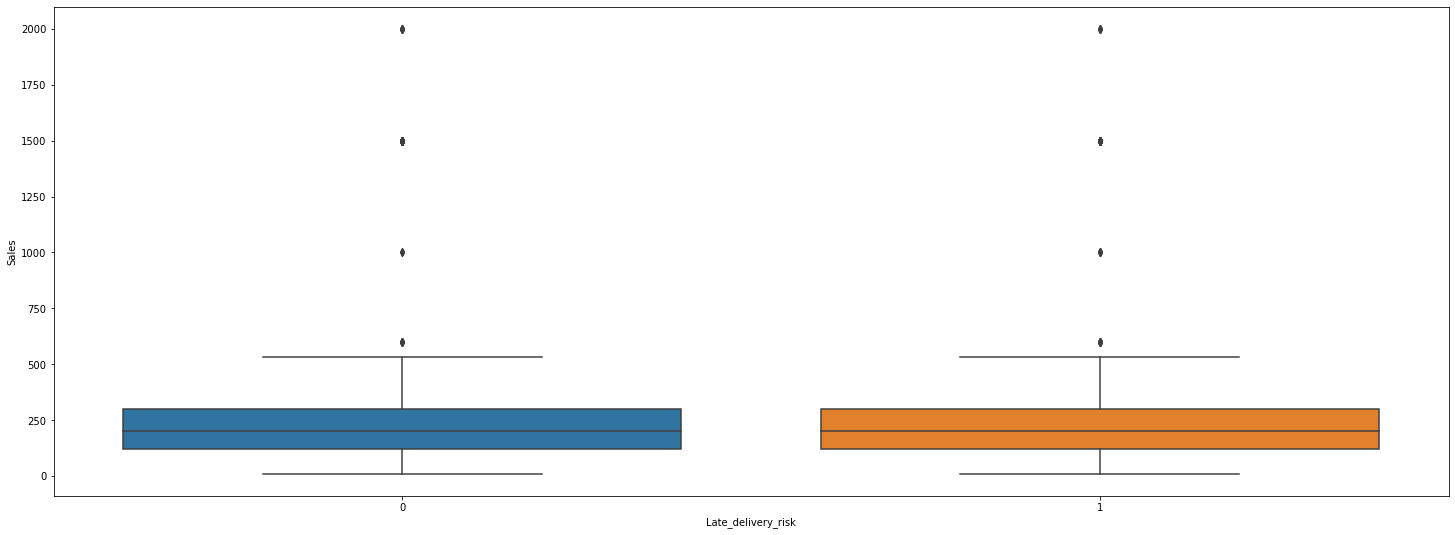

In [312]:
#Bivariate
sns.boxplot(data['Late_delivery_risk'],data['Sales'])
plt.show()

In [313]:
#Statical test
model=sfa.ols("Late_delivery_risk~Sales",data=data).fit()
print(anova_lm(model))

                df        sum_sq   mean_sq         F    PR(>F)
Sales          1.0      0.568010  0.568010  2.293437  0.129924
Residual  180517.0  44708.202446  0.247668       NaN       NaN


In [314]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Sales','Value in sales','Uniform distribution among the class','unsignificant according to annova','No relevance']

# feature 38 ::Order Item Total  

In [315]:
data_dictionary.iloc[38,:]

FIELDS                Order Item Total  
DESCRIPTION    :  Total amount per order
Name: 38, dtype: object

* this feature contain info about Total amount per order

In [316]:
data['Order Item Total'].describe()

count    180519.000000
mean        183.107609
std         120.043670
min           7.490000
25%         104.379997
50%         163.990005
75%         247.399994
max        1939.989990
Name: Order Item Total, dtype: float64

<AxesSubplot:xlabel='Order Item Total', ylabel='Density'>

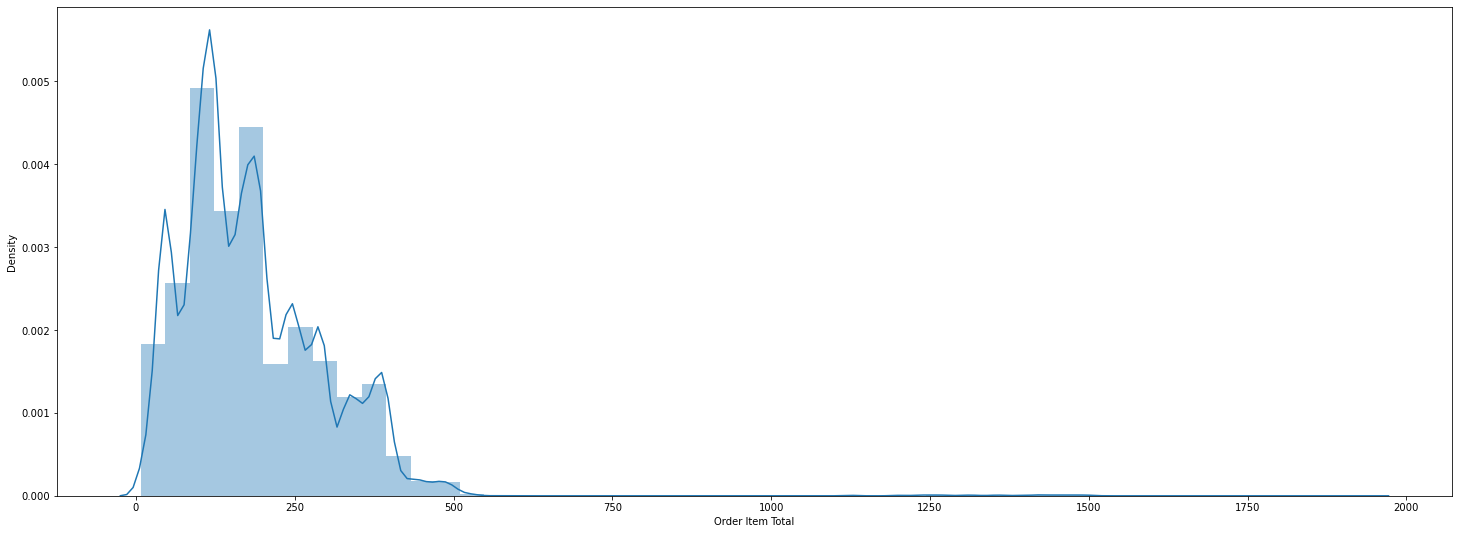

In [317]:
sns.distplot(data['Order Item Total'])

* The Distplot shows that the data is positively skewed
* Also there are outliers in the data 

<AxesSubplot:xlabel='Order Item Total'>

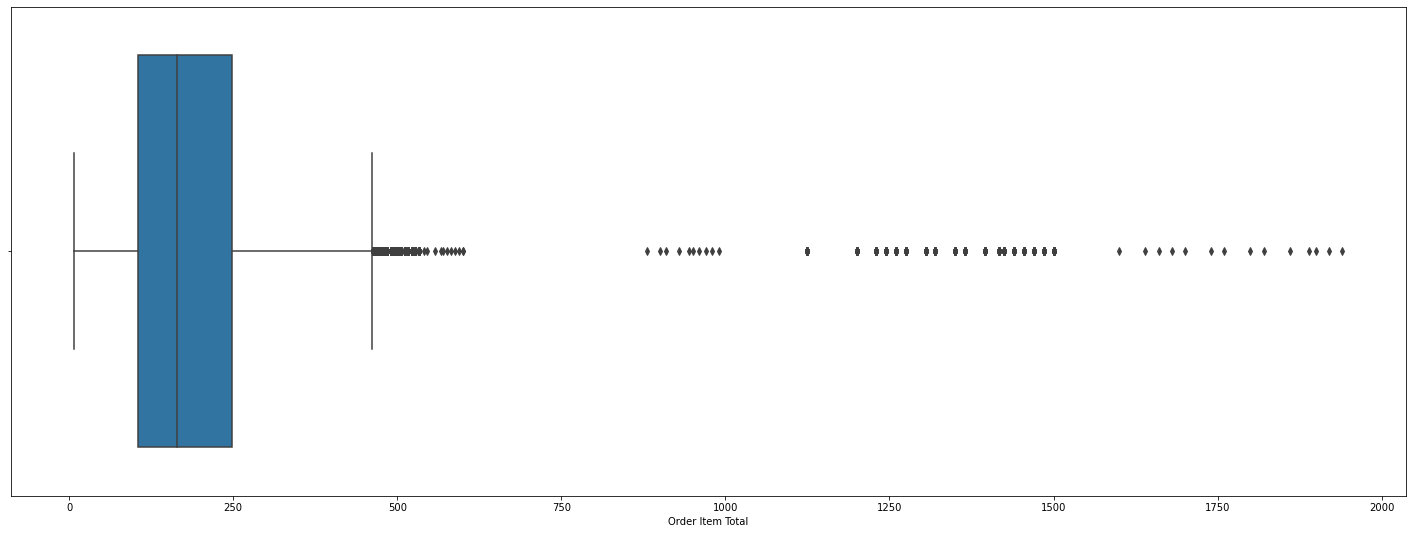

In [318]:
sns.boxplot(data['Order Item Total'])

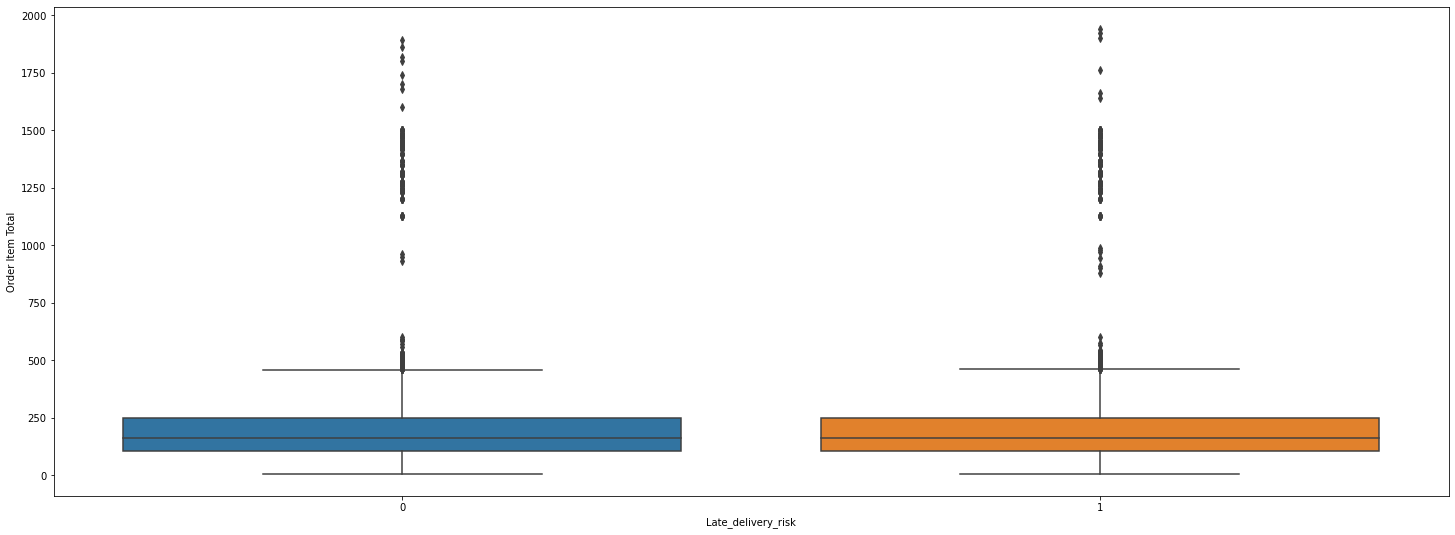

In [319]:
#Bivariate
sns.boxplot(data['Late_delivery_risk'],data['Order Item Total'])
plt.show()



In [320]:
#Statical test
model=sfa.ols("Late_delivery_risk~data['Order Item Total']",data=data).fit()
print(anova_lm(model))

                                df        sum_sq   mean_sq         F    PR(>F)
data['Order Item Total']       1.0      0.642629  0.642629  2.594728  0.107222
Residual                  180517.0  44708.127827  0.247667       NaN       NaN


In [321]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Order Item Total','Total amount per order','Uniform distribution among the class','unsignificant according to annova','No relevance']

# feature 39 ::Order Profit Per Order

In [322]:
data_dictionary.iloc[39,:]

FIELDS            Order Profit Per Order
DESCRIPTION    :  Order Profit Per Order
Name: 39, dtype: object

* this feature contain information about Order Profit Per Order

In [323]:
data['Order Profit Per Order'].describe()

count    180519.000000
mean         21.974989
std         104.433526
min       -4274.979980
25%           7.000000
50%          31.520000
75%          64.800003
max         911.799988
Name: Order Profit Per Order, dtype: float64

* We can see that the some data value also lies in negative range showing some extreme loss

<AxesSubplot:xlabel='Order Profit Per Order', ylabel='Density'>

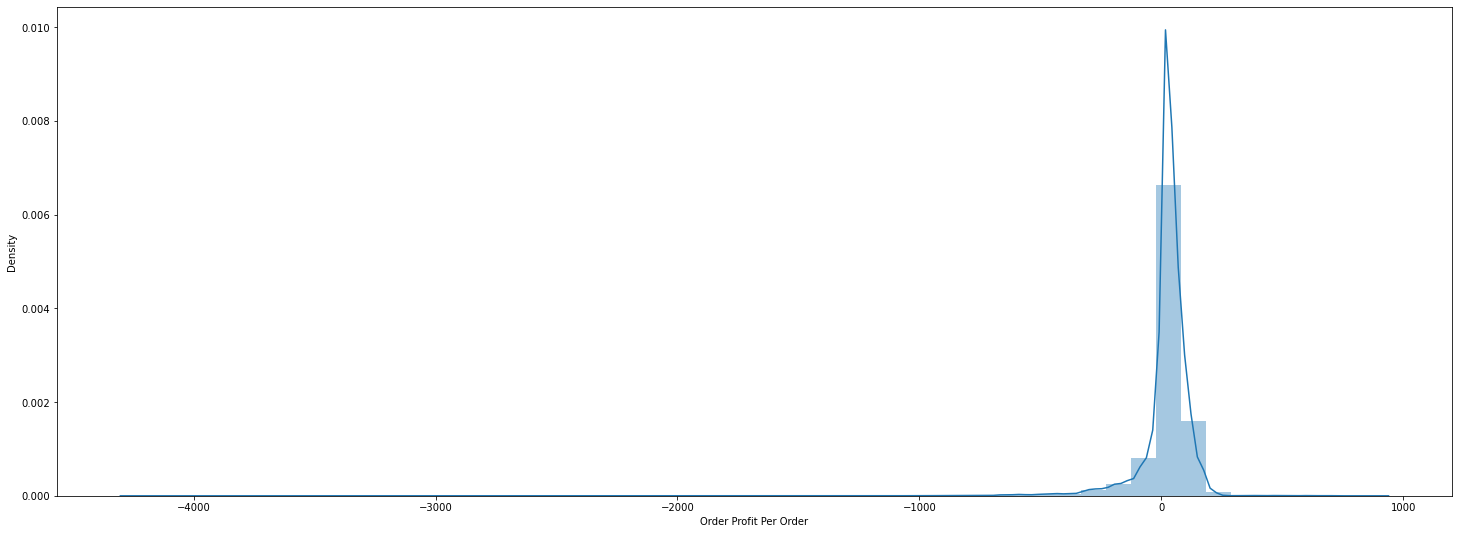

In [324]:
sns.distplot(data['Order Profit Per Order'])

* distribution plot shows that it is an negatively skewed distribution 
* The company is making loss on some Order and it is exceding -4000 per order 
* they should take steps to reduce the loss and then think about the profit 

<AxesSubplot:xlabel='Order Profit Per Order'>

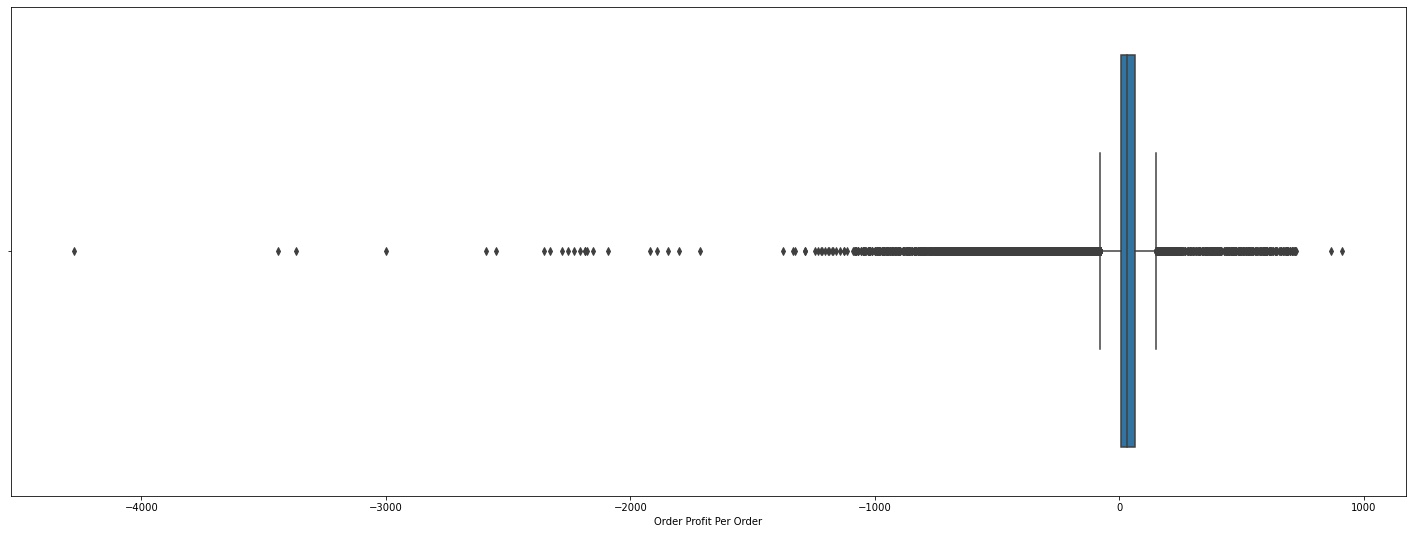

In [325]:
sns.boxplot(data['Order Profit Per Order'])

* Treatment of outlier as most of the value is more and less 

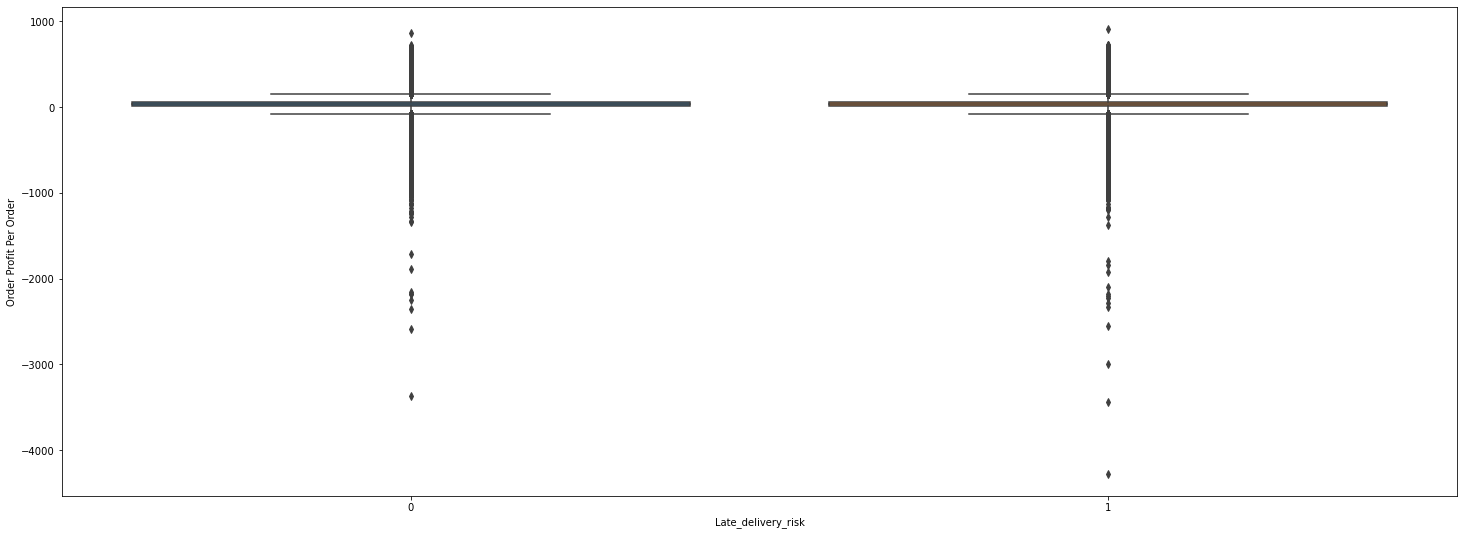

In [326]:
#Bivariate
sns.boxplot(data['Late_delivery_risk'],data['Order Profit Per Order'])
plt.show()

In [327]:
#statistical test
model=sfa.ols("Late_delivery_risk~data['Order Profit Per Order']",data=data).fit()
print(anova_lm(model))


                                      df        sum_sq   mean_sq         F  \
data['Order Profit Per Order']       1.0      0.621027  0.621027  2.507506   
Residual                        180517.0  44708.149429  0.247667       NaN   

                                  PR(>F)  
data['Order Profit Per Order']  0.113307  
Residual                             NaN  


In [328]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Order Profit Per Order','Order Profit Per Order','Uniform distribution among the class','unsignificant according to annova','No relevance']

# Feature ::40 Order Region

In [329]:
data_dictionary.iloc[40,:]

FIELDS                                              Order Region
DESCRIPTION    :  Region of the world where the order is deli...
Name: 40, dtype: object

* this feature contain info of Region of the world where the order is delivered

In [330]:
data['Order Region'].describe()

count              180519
unique                 23
top       Central America
freq                28341
Name: Order Region, dtype: object

<AxesSubplot:>

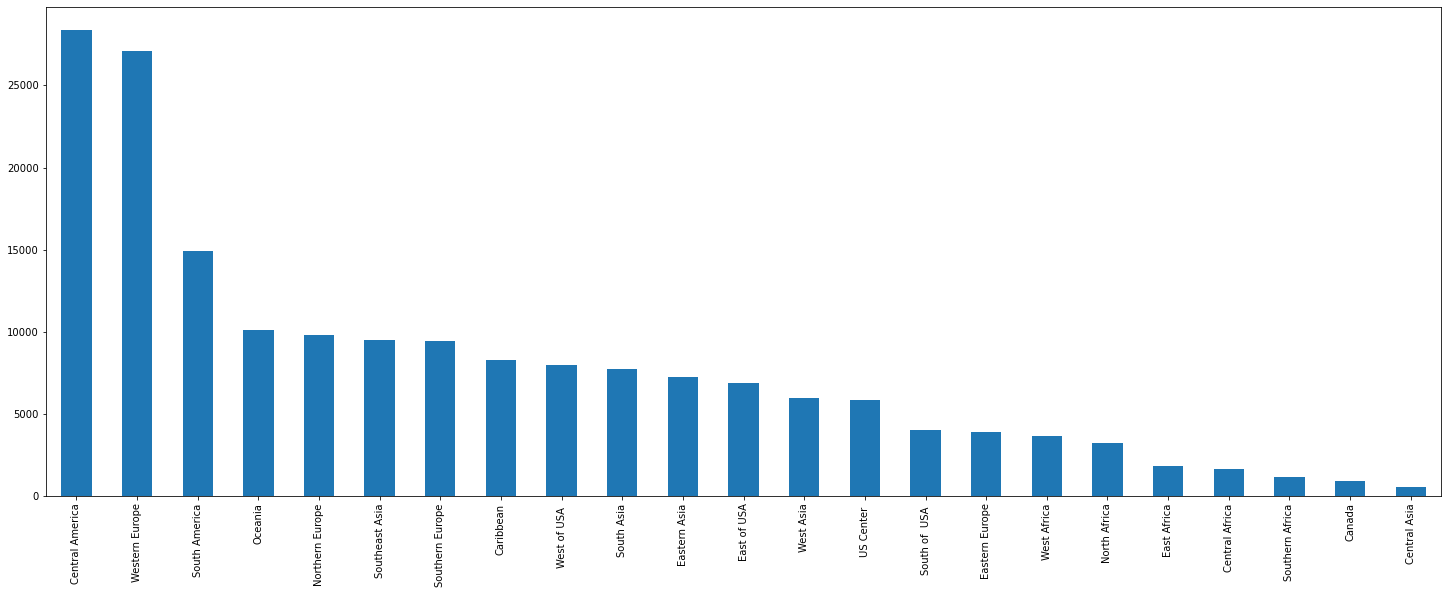

In [331]:
data['Order Region'].value_counts().plot(kind='bar')

* The top five order region are Central America,Western Europe,South America,Oceania,Northern Europe

<AxesSubplot:xlabel='Order Region'>

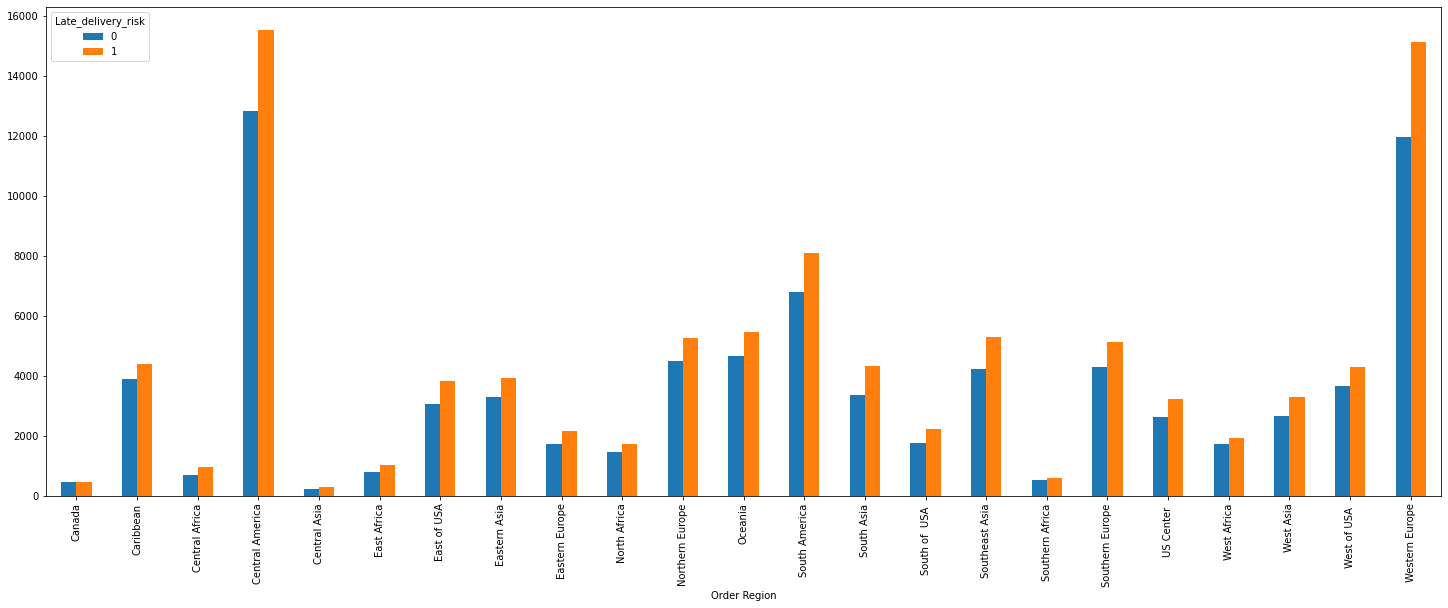

In [332]:
#Bivariate
tbl=pd.crosstab(data['Order Region'],data['Late_delivery_risk'])
tbl.plot.bar()

In [333]:
#Statistical test
teststats,pvalue,dof,exp_value=chi2_contingency(tbl)
print(pvalue)

1.083129807862368e-07


In [334]:
significant_feature.loc[len(significant_feature.index)]=['Order Region', 'info of Region of the world where the order is delivered','each region have different delay ratio ','Significant(chi-square)','Relevance']

# feature 41::Order State

In [335]:
data_dictionary.iloc[41,:]

FIELDS                                               Order State
DESCRIPTION    :  State of the region where the order is deli...
Name: 41, dtype: object

* this feature contain information of State of the region where the order is delivered

In [336]:
data['Order State'].describe()

count         180519
unique          1089
top       Inglaterra
freq            6722
Name: Order State, dtype: object

In [337]:
data['Order State'].value_counts()

Inglaterra                              6722
California                              4966
Isla de Francia                         4580
Renania del Norte-Westfalia             3303
San Salvador                            3055
Nueva York                              2753
Distrito Federal                        2559
Texas                                   2446
Nueva Gales del Sur                     2370
Santo Domingo                           2211
Queensland                              2186
Guatemala                               2109
São Paulo                               2031
Provenza-Alpes-Costa Azul               1842
Capital Nacional                        1837
Managua                                 1834
Francisco Morazán                       1783
Panamá                                  1631
Victoria                                1456
Pensilvania                             1406
Washington                              1272
Illinois                                1237
Jalisco   

*top five state are Inglaterra,California,Isla de Francia Renania del Norte-Westfalia,San Salvador
* there are almost 1089 categories in this

<AxesSubplot:xlabel='Order State'>

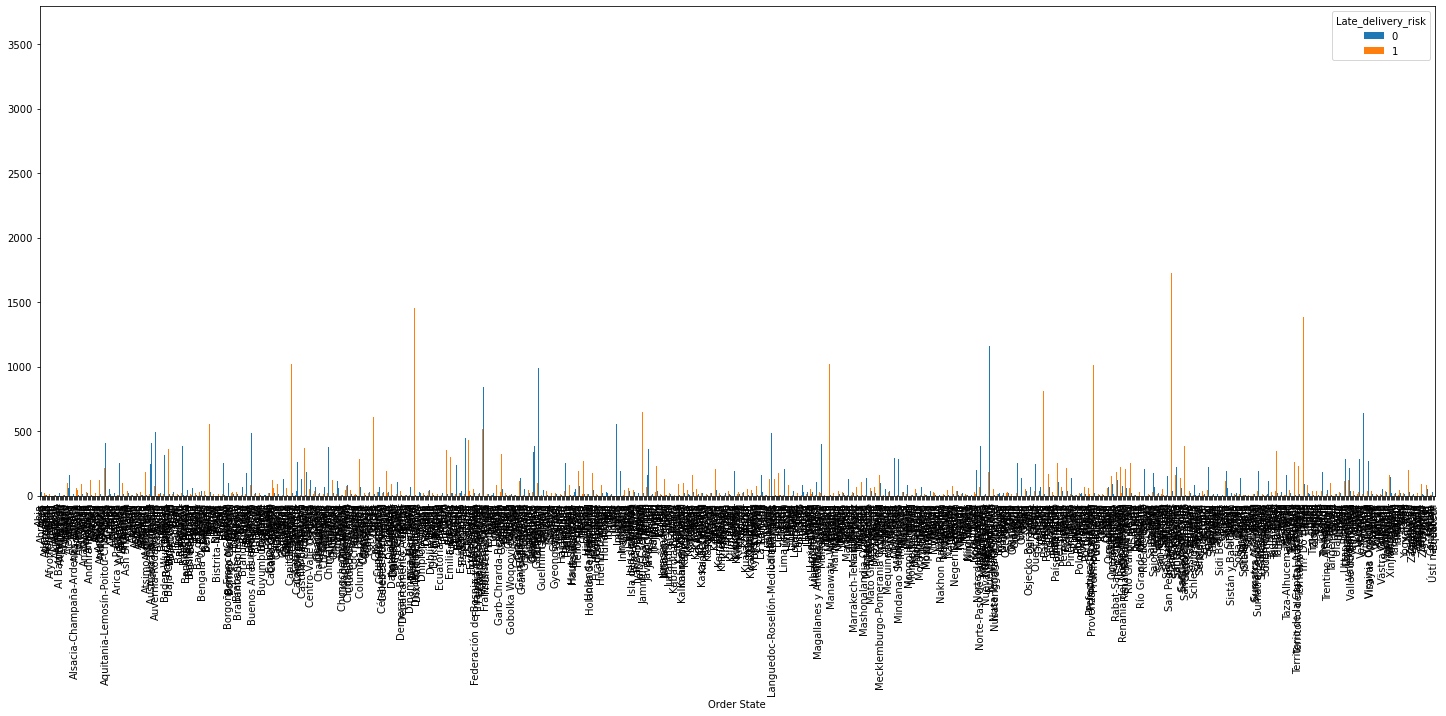

In [338]:
#Bivariate
table=pd.crosstab(data['Order State'],data['Late_delivery_risk'])
table.plot(kind='bar')

In [339]:
#Statistical Test
teststats,pvalue,dof,exp_value=chi2_contingency(table)
print(pvalue)

0.0


In [340]:
significant_feature.loc[len(significant_feature.index)]=['Order State',  'State of the region where the order is delivered','cannot able to visualize','Significant(chi-square)','Relevance']

# Feature 42::Order Status

In [341]:
data_dictionary.iloc[42,:]

FIELDS                                              Order Status
DESCRIPTION    :  Order Status : COMPLETE , PENDING , CLOSED ...
Name: 42, dtype: object

* this feature have information about Order Status where status is COMPLETE , PENDING , CLOSED etc

In [342]:
data['Order Status'].describe()

count       180519
unique           9
top       COMPLETE
freq         59491
Name: Order Status, dtype: object

In [343]:
data['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

* Only 59491 order is completed out of 180519 orders
* PENDING_PAYMENT 39832 is also a concern
* processing the order is also high 21902
* pending (order pending) 20227 should be fullfiled

<AxesSubplot:xlabel='Order Status'>

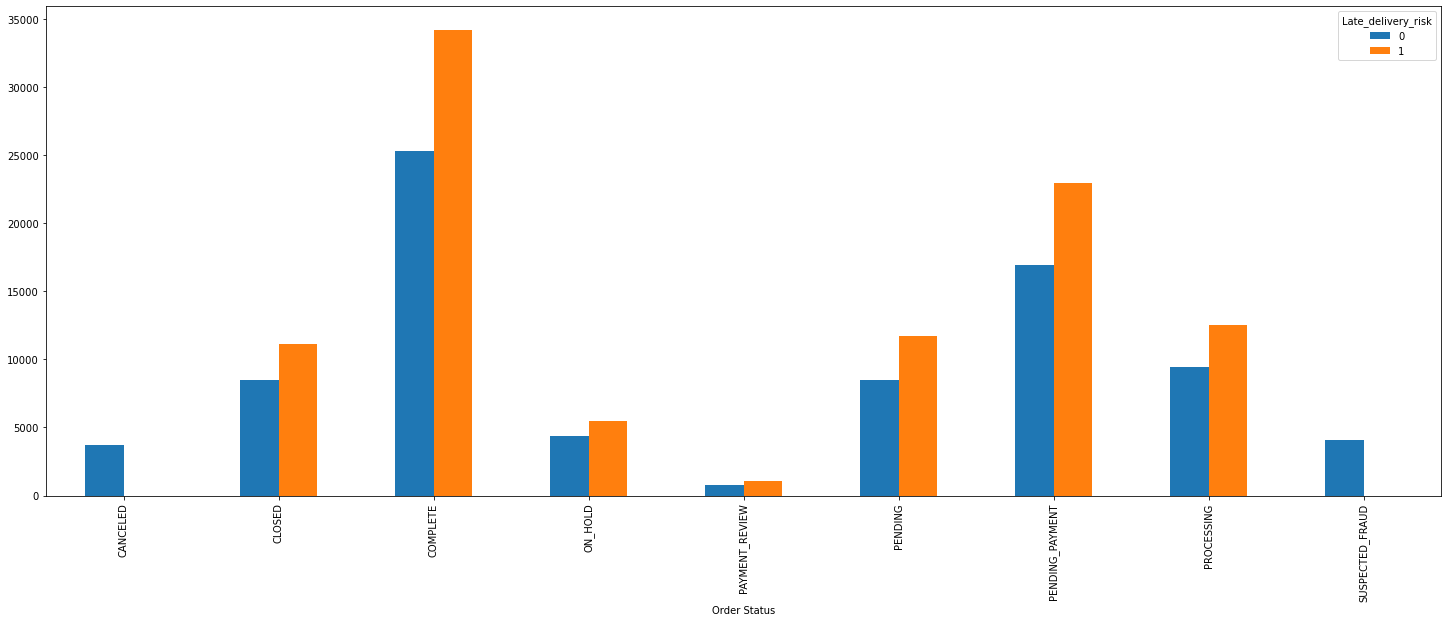

In [344]:
#Bivariate 
tbl=pd.crosstab(data['Order Status'],data['Late_delivery_risk'])
tbl
tbl.plot(kind='bar')



In [345]:
#Statistical Test 
teststats,pvalue,dof,exp_value=chi2_contingency(tbl)
print(pvalue)

0.0


In [346]:
significant_feature.loc[len(significant_feature.index)]=['Order Status','Order Status' ,'different catagory have different delay ratio ','Significant(chi-square)','Relevance']

# Feature 43 :: Product Card Id

In [347]:
data_dictionary.iloc[43,:]

FIELDS         Product Card Id
DESCRIPTION    :  Product code
Name: 43, dtype: object

* this feature contain information of Product code

In [348]:
data['Product Card Id'].describe()

count    180519.000000
mean        692.509764
std         336.446807
min          19.000000
25%         403.000000
50%         627.000000
75%        1004.000000
max        1363.000000
Name: Product Card Id, dtype: float64

In [349]:
data['Product Card Id'].value_counts()

365     24515
403     22246
502     21035
1014    19298
1004    17325
1073    15500
957     13729
191     12169
627     10617
1362      838
1350      652
1363      650
1349      592
1361      529
1359      492
1355      484
1353      484
1354      483
1351      442
1358      434
1352      431
1346      405
1356      362
1360      357
116       328
977       323
172       318
565       314
885       313
793       311
276       311
828       310
728       309
835       308
135       308
804       307
823       306
44        305
642       304
703       303
926       302
924       300
572       300
906       300
905       299
235       299
797       298
564       298
917       295
893       295
886       292
821       292
818       291
567       289
249       287
282       285
775       285
771       284
792       282
897       281
93        280
278       280
778       279
134       279
810       277
1348      271
822       265
37        262
825       257
273       251
1357      208
1347  

* 118 unique values with  good repeat rate of some values

<AxesSubplot:xlabel='Product Card Id'>

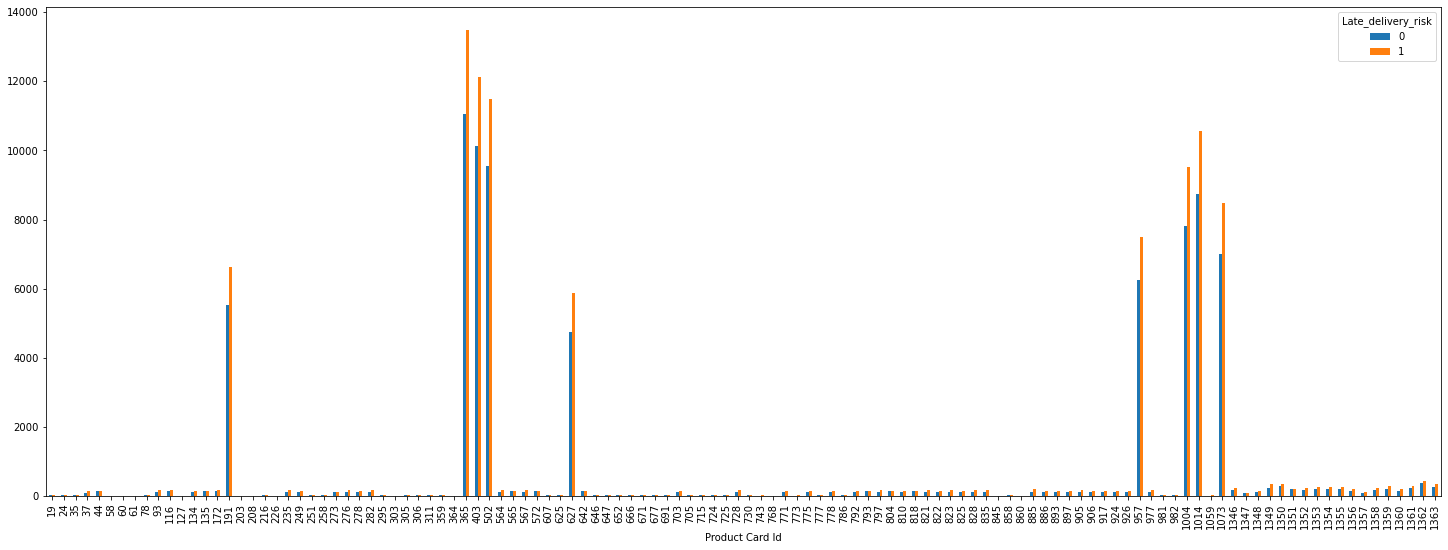

In [350]:
#Bivariate
tbl=pd.crosstab(data['Product Card Id'],data['Late_delivery_risk'])
tbl
tbl.plot(kind='bar')


In [351]:
#Statistical Test 
teststats,pvalue,dof,exp_value=chi2_contingency(tbl)
print(pvalue)

0.8164060393259804


In [352]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Product Card Id','Product code','Cannot be able to visualize','unsignificant(chi2_contingency)','No relevance']

# Feature :: 44 Product Category Id

In [353]:
data_dictionary.iloc[44,:]

FIELDS              Product Category Id
DESCRIPTION    :  Product category code
Name: 44, dtype: object

* this feature contain info of product category code

In [354]:
data['Product Category Id'].describe()

count    180519.000000
mean         31.851451
std          15.640064
min           2.000000
25%          18.000000
50%          29.000000
75%          45.000000
max          76.000000
Name: Product Category Id, dtype: float64

In [355]:
len(data['Product Category Id'].unique())

51

In [356]:
data['Product Category Id'].value_counts()

17    24551
18    22246
24    21035
46    19298
45    17325
48    15540
43    13729
9     12487
29    10984
37     2029
40     1780
36     1475
26     1201
13     1127
35     1070
41      974
75      838
63      652
76      650
3       632
7       614
62      592
74      529
33      524
72      492
66      484
68      484
67      483
64      442
32      441
44      440
71      434
65      431
12      423
59      405
38      384
69      362
73      357
5       343
6       328
11      309
30      283
61      271
70      208
60      207
31      181
2       138
10      111
16       68
4        67
34       61
Name: Product Category Id, dtype: int64

* cannot able to find any unique pattern

<AxesSubplot:xlabel='Product Category Id'>

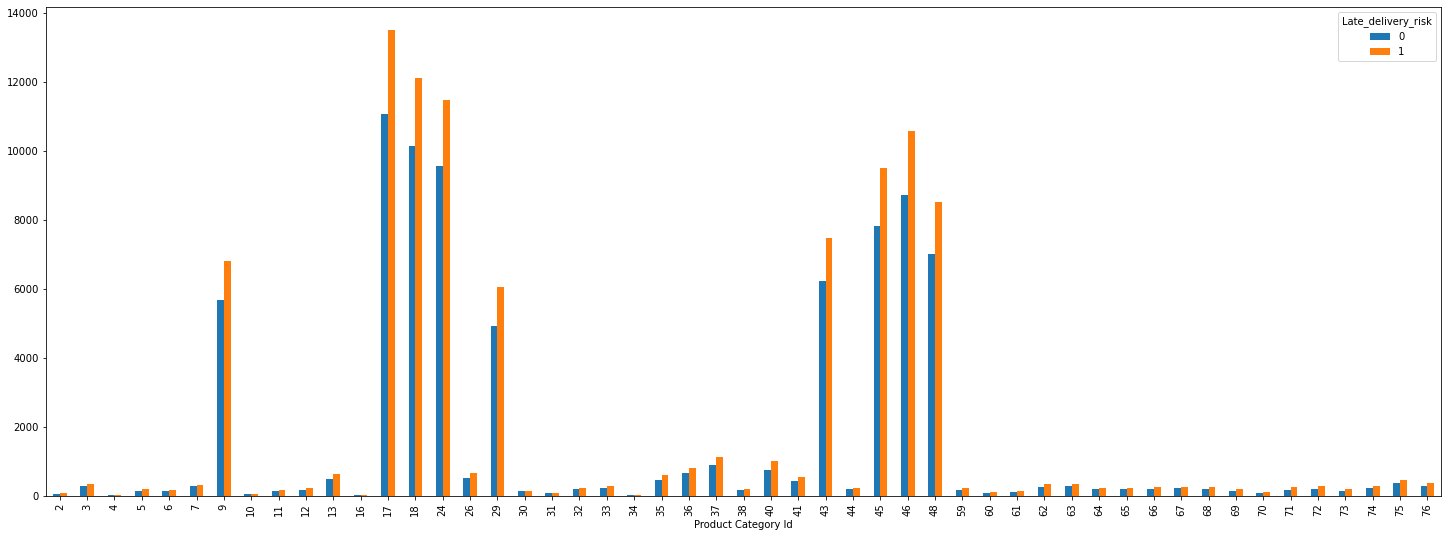

In [357]:
tbl = pd.crosstab(data['Product Category Id'],data['Late_delivery_risk'])
tbl.plot(kind='bar')

In [358]:
#Statistical test
stats,p,d,s=chi2_contingency(tbl)
print(p)

0.7468284823123976


In [359]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Product Category Id','Product category code','each class have almost equal delay ratio','unsignificant(chi2_contingency)','No relevance']

# Feature 45 :: Product Description

In [360]:
data_dictionary.iloc[45,:]

FIELDS            Product Description
DESCRIPTION    :  Product Description
Name: 45, dtype: object

In [361]:
data['Product Description'].isnull().sum() # feature have 100 percent mising values so we drop  it

180519

In [362]:
data.drop('Product Description',axis=1,inplace=True)

In [363]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Product Description','Product Description','100 percent mising values','not applicable','No relevance']

# Feature 46::Product Image

In [364]:
data_dictionary.iloc[46,:]

FIELDS                                        Product Image
DESCRIPTION    :  Link of visit and purchase of the product
Name: 46, dtype: object

* this feature contain information of Link of visit and purchase of the product
* this information is not usefull for us for us so we will drop it

In [365]:
data.drop('Product Image',axis=1,inplace=True)

In [366]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Product Image','Link of visit and purchase of the product','not applicable','not applicable','no impact on the business']

# feature 47 ::: Product Name

In [367]:
data_dictionary.iloc[47,:]

FIELDS            Product Name
DESCRIPTION    :  Product Name
Name: 47, dtype: object

* this feature contain information of Product name

In [368]:
data['Product Name'].isnull().sum()

0

In [369]:
data['Product Name'].describe()

count                               180519
unique                                 118
top       Perfect Fitness Perfect Rip Deck
freq                                 24515
Name: Product Name, dtype: object

In [370]:
data['Product Name'].value_counts()

Perfect Fitness Perfect Rip Deck                 24515
Nike Men's CJ Elite 2 TD Football Cleat          22246
Nike Men's Dri-FIT Victory Golf Polo             21035
O'Brien Men's Neoprene Life Vest                 19298
Field & Stream Sportsman 16 Gun Fire Safe        17325
Pelican Sunstream 100 Kayak                      15500
Diamondback Women's Serene Classic Comfort Bi    13729
Nike Men's Free 5.0+ Running Shoe                12169
Under Armour Girls' Toddler Spine Surge Runni    10617
Fighting video games                               838
Children's heaters                                 652
Summer dresses                                     650
Web Camera                                         592
Toys                                               529
Adult dog supplies                                 492
Lawn mower                                         484
Porcelain crafts                                   484
DVDs                                               483
Dell Lapto

* the platform have 118 diffrent product for the orders

<AxesSubplot:xlabel='Product Name'>

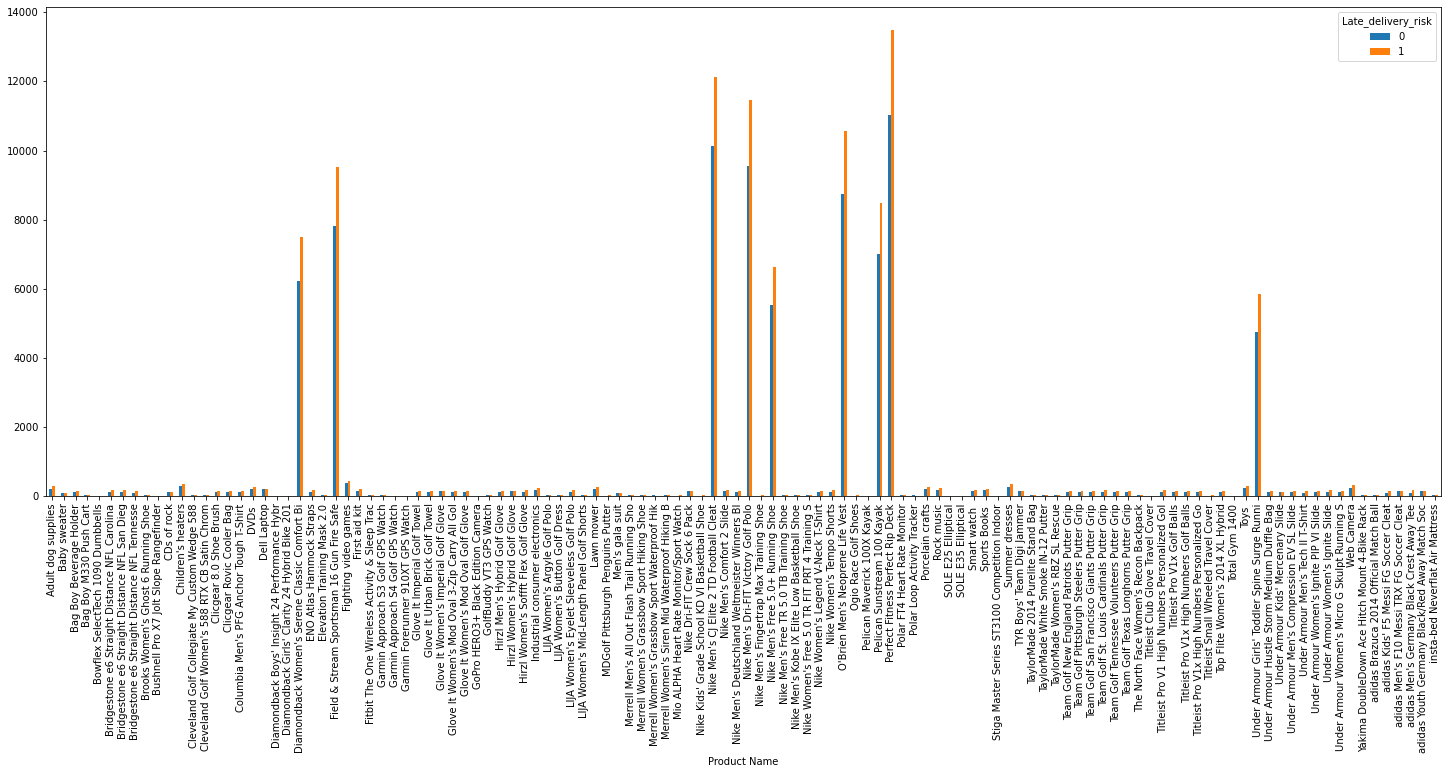

In [371]:
#Bivariate   
tbl=pd.crosstab(data['Product Name'],data['Late_delivery_risk'])
tbl
tbl.plot(kind='bar')

In [372]:
#Statistical Test
teststats,pvalue,dof,exp_value=chi2_contingency(tbl)
print(pvalue)

0.8164060393259804


In [373]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Product Name','Name of the product ','Cannot visulaize to many value','Unsignificant(chi2_contingency)','no impact on the business']

# feature 48:::Product Price

In [374]:
data_dictionary.iloc[48,:]

FIELDS            Product Price
DESCRIPTION    :  Product Price
Name: 48, dtype: object

* this feature contain information about the prices of diffrent products

In [375]:
data['Product Price'].head()

0    327.75
1    327.75
2    327.75
3    327.75
4    327.75
Name: Product Price, dtype: float64

In [376]:
data['Product Price'].describe()

count    180519.000000
mean        141.232550
std         139.732492
min           9.990000
25%          50.000000
50%          59.990002
75%         199.990005
max        1999.989990
Name: Product Price, dtype: float64

<AxesSubplot:xlabel='Product Price'>

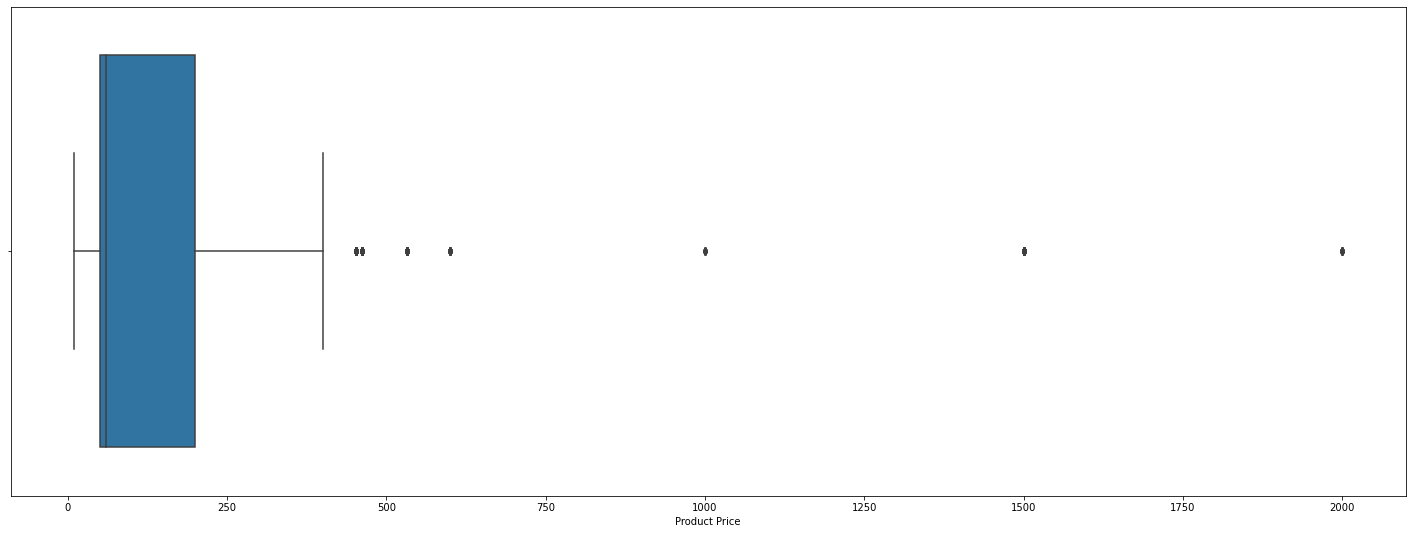

In [377]:
sns.boxplot(data['Product Price'])

<AxesSubplot:xlabel='Product Price', ylabel='Density'>

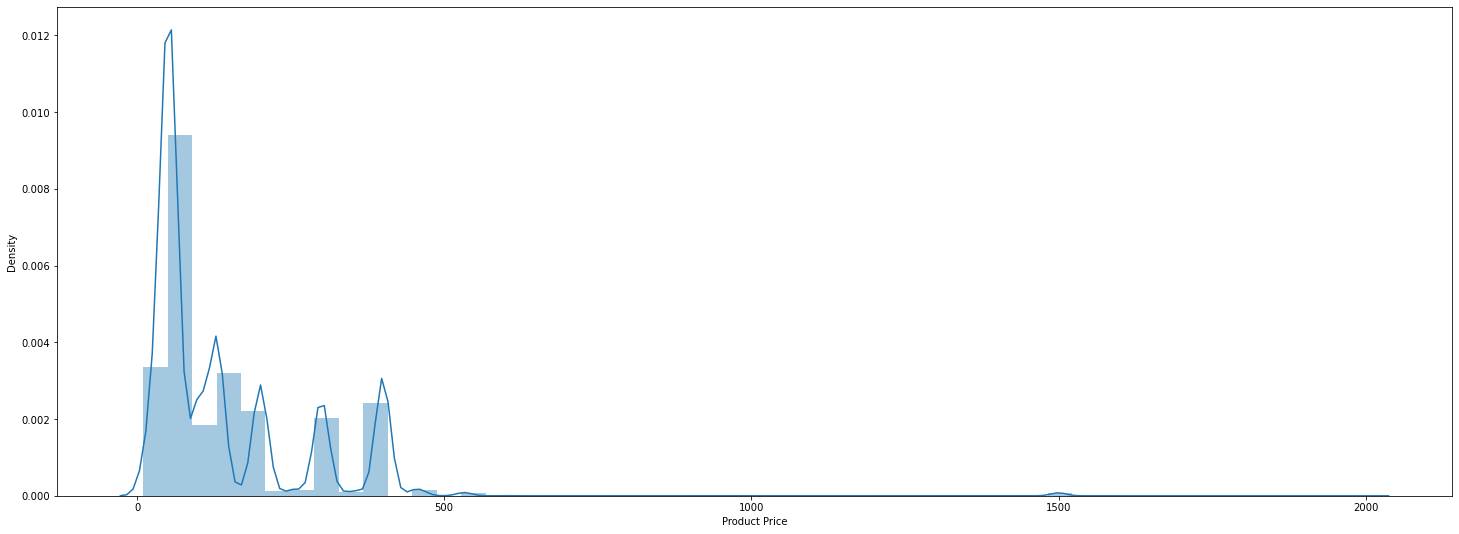

In [378]:
sns.distplot(data['Product Price'])

* the main price range is distributed upto 500 and there are product which have price much more than this

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Product Price'>

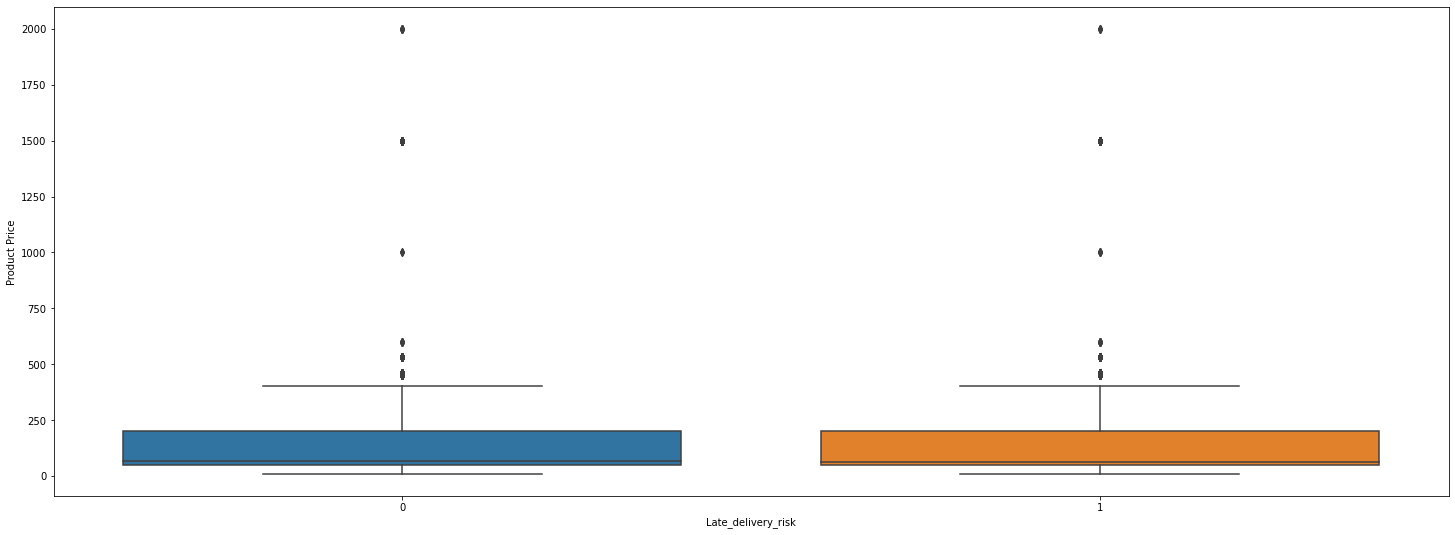

In [379]:
#Bivariante
sns.boxplot(data['Late_delivery_risk'],data['Product Price'])

In [380]:
#Statistical Test
model=sfa.ols("data['Product Price']~Late_delivery_risk",data = data).fit()
anova_lm(model)



df        sum_sq       mean_sq         F   PR(>F)
Late_delivery_risk       1.0  1.667759e+04  16677.590266  0.854158  0.35538
Residual            180517.0  3.524628e+09  19525.185096       NaN      NaN

In [381]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Product_price','product_price ','uniform Distrubition on both','no relevence according the Annova','No relevance']

# Feature 49 :: Product Status

In [382]:
data_dictionary.iloc[49,:]

FIELDS                                            Product Status
DESCRIPTION    :  Status of the product stock :If it is 1 not...
Name: 49, dtype: object

* this feature contain information about the Status of the product stock :If it is 1 not in stock else 0

In [383]:
data['Product Status'].describe()

count    180519.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Product Status, dtype: float64

In [384]:
data['Product Status'].value_counts()

0    180519
Name: Product Status, dtype: int64

* it contain all values as 0 so we can drop it as we cannot gain anything out of it

In [385]:
data.drop('Product Status',axis=1,inplace=True)

In [386]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Product Status','Status of the product stock','Not applicable(All unique values)','Not applicable','May be']

# feature 50 ::: Shipping date (DateOrders)

In [387]:
data_dictionary.iloc[50,:]

FIELDS              Shipping date (DateOrders)   
DESCRIPTION    :  Exact date and time of shipment
Name: 50, dtype: object

* this Feature contain information of the Exact date and time of shipment

In [388]:
data['shipping date (DateOrders)']=data['shipping date (DateOrders)'].str.split(' ').str[0]

In [389]:
#for now we are considering it as significant and will see further

In [390]:
significant_feature.loc[len(significant_feature.index)]=['shipping date (DateOrders)','Exact date and time of shipment' ,'for now we are considering it as significant and will see further','---','---']

# Feature 51:: Shipping Mode

In [391]:
data_dictionary.iloc[51,:]

FIELDS                                             Shipping Mode
DESCRIPTION    :  The following shipping modes are presented ...
Name: 51, dtype: object

* this feature contain information about diffrent shipping modes are presented

In [392]:
data['Shipping Mode'].describe()

count             180519
unique                 4
top       Standard Class
freq              107752
Name: Shipping Mode, dtype: object

In [393]:
data['Shipping Mode'].value_counts()

Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: Shipping Mode, dtype: int64

<AxesSubplot:xlabel='Shipping Mode', ylabel='count'>

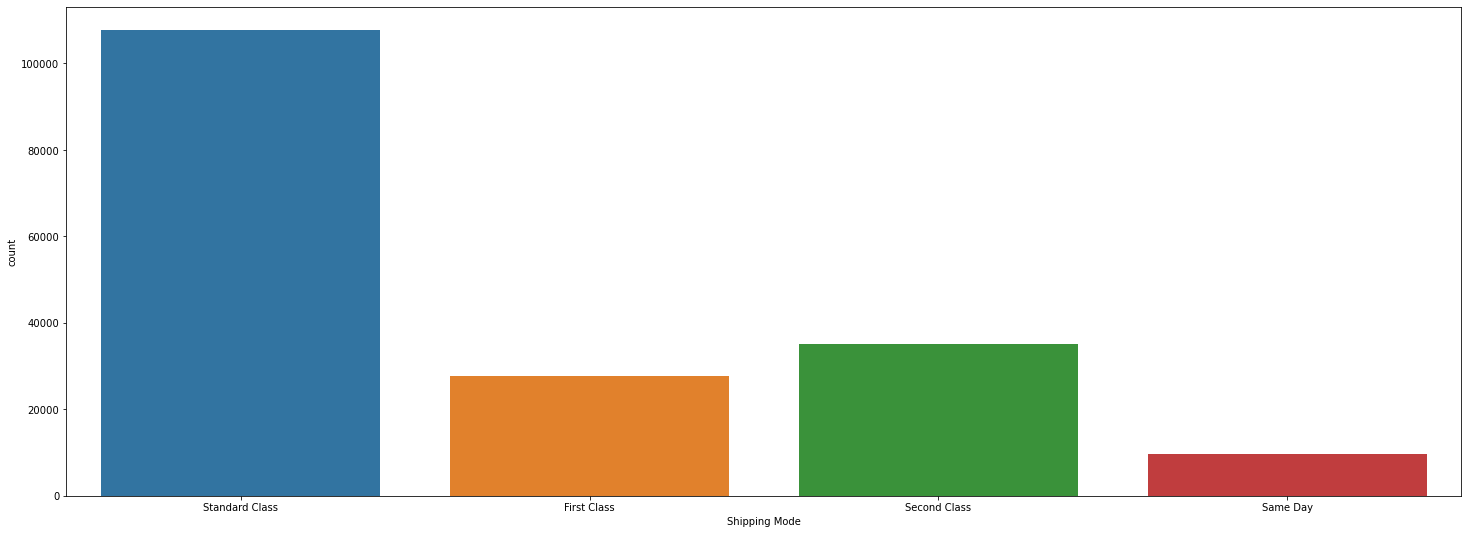

In [394]:
sns.countplot(data['Shipping Mode'])

* in mjority of the cases the shiping mode is standard class

<AxesSubplot:xlabel='Shipping Mode'>

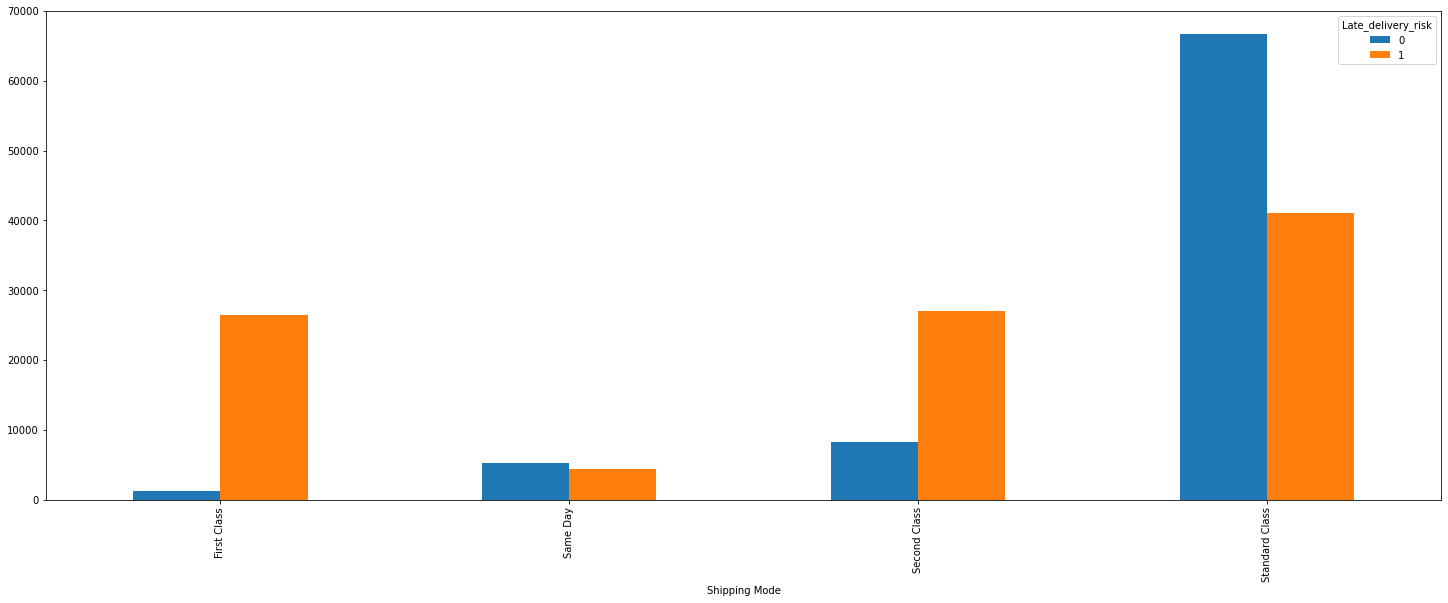

In [395]:
#statistical test
tb1=pd.crosstab(data['Shipping Mode'],data['Late_delivery_risk'])
tb1.plot(kind='bar')

In [396]:
#Statistical Test
teststats,pvalue,dof,exp_value=chi2_contingency(tb1)
print(pvalue)

0.0


In [397]:
significant_feature.loc[len(significant_feature.index)]=['Shipping Mode','Class of the shipping','non-uniform distribution','significant(chi2_contingency)','Relevance']

# feature 52 :: Order Zipcode

In [398]:
data['Order Zipcode'].describe()

count    24840.000000
mean     55426.132327
std      31919.279101
min       1040.000000
25%      23464.000000
50%      59405.000000
75%      90008.000000
max      99301.000000
Name: Order Zipcode, dtype: float64

In [399]:
data['Order Zipcode'].isnull().sum()/data.shape[0]

0.8623967560201419

* have 86  percent of null values so we have to drop it

In [400]:
data.drop('Order Zipcode',axis=1,inplace=True)

In [401]:
un_significant_feature.loc[len(un_significant_feature.index)]=['Order Zipcode','Order Zipcode','not applicable(86% of null values so we have to drop it)','Not applicable','May be']

In [402]:
un_significant_feature.to_csv('un_significant_feature.csv')

In [403]:
un_significant_feature

feature name                                     description  \
0          Benefit per order                       Earnings per order placed   
1         Sales per customer                       Total sales per customer    
2                Customer Id                           Product category code   
3              Category Name             Description of the product category   
4           Customer Country    Country where the customer made the purchase   
5             Customer Email                              Email of customers   
6             Customer Fname                         First name of customers   
7                Customer Id                                 Id of customers   
8          Customer Password                             Masked customer key   
9           Customer Segment                              Types of Customers   
10                   Zipcode                                Customer Zipcode   
11             Department Id                        Department code of store   
12           Department Name                        Department name of store   
13                  Latitude     Latitude corresponding to location of store   
14                 Longitude    Longitude corresponding to location of store   
15         Order Customer Id                             Customer order code   
16                  Order Id                                      Order code   
17    Order Item Cardprod Id  Product code generated through the RFID reader   
18       Order Item Discount                       Order item discount value   
19  Order Item Discount Rate                  Order item discount percentage   
20             Order Item Id                                 Order item code   
21  Order Item Product Price              Price of products without discount   
22   Order Item Profit Ratio                         Order Item Profit Ratio   
23       Order Item Quantity                    Number of products per order   
24                     Sales                                  Value in sales   
25          Order Item Total                          Total amount per order   
26    Order Profit Per Order                          Order Profit Per Order   
27           Product Card Id                                    Product code   
28       Product Category Id                           Product category code   
29       Product Description                             Product Description   
30             Product Image       Link of visit and purchase of the product   
31              Product Name                            Name of the product    
32             Product_price                                  product_price    
33            Product Status                     Status of the product stock   
34             Order Zipcode                                   Order Zipcode   

                                bivarient observation  \
0            it displays positive and negative values   
1                    it displays uniform distribution   
2                    it displays uniform distribution   
3                    it displays uniform distribution   
4                    it displays uniform distribution   
5             contain only  XXXX for each observation   
6                           contain unique first name   
7                          contain unique customer id   
8             contain only  XXXX for each observation   
9             Uniform distribution among all segments   
10                         contain many unique values   
11  Contain uniform distribution among all the dep...   
12                               uniform distribution   
13   Cannot able to perform due to high unique values   
14   Cannot able to perform due to high unique values   
15            contain only  XXXX for each observation   
16               Uniform distribution among the class   
17               Uniform distribution among the class   
18               Uniform distribution among the clas

** Moving Forward with Significant features **

In [404]:
data_significant=data.loc[:,significant_feature["feature name"].values]


In [405]:
data_significant=pd.concat([data_significant,data['Late_delivery_risk']],axis=1)

In [406]:
#data_significant.to_csv("capstone_significant_data.csv")

In [407]:
#data_significant=pd.read_csv(r"capstone_significant_data.csv")

In [408]:
data_significant.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

    Delivery Status  Customer City Customer Lname Customer State  \
0  Advance shipping          66770       Holloway             PR   
1     Late delivery          66770           Luna             PR   
2  Shipping on time            943      Maldonado             CA   
3  Advance shipping           3417           Tate             CA   
4  Advance shipping          66770      Hendricks             PR   

   Customer Street        Market  Order City Order Country  \
0               31  Pacific Asia      Bekasi     Indonesia   
1               60  Pacific Asia     Bikaner         India   
2                7  Pacific Asia     Bikaner         India   
3               77  Pacific Asia  Townsville     Australia   
4               19  Pacific Asia  Townsville     Australia   

  order date (DateOrders)    Order Region      Order State     Order Status  \
0               1/31/2018  Southeast Asia  Java Occidental         COMPLETE   
1               1/13/2018      South Asia         Rajastán          PENDING   
2               1/13/2018      South Asia         Rajastán           CLOSED   
3               1/13/2018         Oceania       Queensland         COMPLETE   
4               1/13/2018         Oceania       Queensland  PENDING_PAYMENT   

  shipping date (DateOrders)   Shipping Mode  Late_delivery_risk  
0                   2/3/2018  Standard Class                   0  
1                  1/18/2018  Standard Class                   1  
2                  1/17/2018  Standard Class                   0  
3                  1/16/2018  Standard Class                   0  
4                  1/15/2018  Standard Class                   0

In [409]:
data_significant['customer  per city']=data_significant['Customer City']

In [410]:
data_significant['Customer Lname'].describe()

count     180511
unique      1109
top        Smith
freq       64104
Name: Customer Lname, dtype: object

In [411]:
data_significant['Customer Lname']=data_significant['Customer Lname'].fillna("Smith")

In [412]:
mapp=data_significant['Customer Lname'].value_counts([0])
data_significant['order per customer']=data_significant['Customer Lname'].apply(lambda x : mapp[x])

In [413]:
data_significant.drop(['Customer Lname','Customer City'],axis=1,inplace=True)

In [414]:
data_significant.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

    Delivery Status Customer State  Customer Street        Market  Order City  \
0  Advance shipping             PR               31  Pacific Asia      Bekasi   
1     Late delivery             PR               60  Pacific Asia     Bikaner   
2  Shipping on time             CA                7  Pacific Asia     Bikaner   
3  Advance shipping             CA               77  Pacific Asia  Townsville   
4  Advance shipping             PR               19  Pacific Asia  Townsville   

  Order Country order date (DateOrders)    Order Region      Order State  \
0     Indonesia               1/31/2018  Southeast Asia  Java Occidental   
1         India               1/13/2018      South Asia         Rajastán   
2         India               1/13/2018      South Asia         Rajastán   
3     Australia               1/13/2018         Oceania       Queensland   
4     Australia               1/13/2018         Oceania       Queensland   

      Order Status shipping date (DateOrders)   Shipping Mode  \
0         COMPLETE                   2/3/2018  Standard Class   
1          PENDING                  1/18/2018  Standard Class   
2           CLOSED                  1/17/2018  Standard Class   
3         COMPLETE                  1/16/2018  Standard Class   
4  PENDING_PAYMENT                  1/15/2018  Standard Class   

   Late_delivery_risk  customer  per city  order per customer  
0                   0               66770            0.000953  
1                   1               66770            0.000881  
2                   0                 943            0.000582  
3                   0                3417            0.000925  
4                   0               66770            0.000515

In [415]:
data_significant['Delivery Status'].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

In [416]:
data_significant.groupby(['Delivery Status','Late_delivery_risk'])['Late_delivery_risk'].count()

Delivery Status    Late_delivery_risk
Advance shipping   0                     41592
Late delivery      1                     98977
Shipping canceled  0                      7754
Shipping on time   0                     32196
Name: Late_delivery_risk, dtype: int64

In [417]:
data_significant['Late_delivery_risk'].value_counts()

1    98977
0    81542
Name: Late_delivery_risk, dtype: int64

In [418]:
data_significant.drop(['Delivery Status'],axis=1,inplace=True)

# Feature Engineering

In [419]:
mapp=data_significant['Customer State'].value_counts([0])
data_significant['Customer per State']=data_significant['Customer State'].map(mapp)

In [420]:
mapp=data_significant['Customer Street'].value_counts([0])
data_significant['Customer per Street']=data_significant['Customer Street'].map(mapp)

In [421]:
mapp=data_significant['Order City'].value_counts([0])
data_significant['Order per City']=data_significant['Order City'].map(mapp)

In [422]:
mapp=data_significant['Order Country'].value_counts([0])
data_significant['Order per Country']=data_significant['Order Country'].map(mapp)

In [423]:
mapp=data_significant['Order Region'].value_counts([0])
data_significant['Order per Region']=data_significant['Order Region'].map(mapp)

In [424]:
mapp=data_significant['Order State'].value_counts([0])
data_significant['Order per State']=data_significant['Order State'].map(mapp)

In [425]:
data_significant = data_significant.drop('Customer State',axis=1)

In [426]:
data_significant.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Customer Street        Market  Order City Order Country  \
0               31  Pacific Asia      Bekasi     Indonesia   
1               60  Pacific Asia     Bikaner         India   
2                7  Pacific Asia     Bikaner         India   
3               77  Pacific Asia  Townsville     Australia   
4               19  Pacific Asia  Townsville     Australia   

  order date (DateOrders)    Order Region      Order State  ...  \
0               1/31/2018  Southeast Asia  Java Occidental  ...   
1               1/13/2018      South Asia         Rajastán  ...   
2               1/13/2018      South Asia         Rajastán  ...   
3               1/13/2018         Oceania       Queensland  ...   
4               1/13/2018         Oceania       Queensland  ...   

    Shipping Mode Late_delivery_risk customer  per city  order per customer  \
0  Standard Class                  0              66770            0.000953   
1  Standard Class                  1              66770            0.000881   
2  Standard Class                  0                943            0.000582   
3  Standard Class                  0               3417            0.000925   
4  Standard Class                  0              66770            0.000515   

   Customer per State  Customer per Street  Order per City  Order per Country  \
0            0.384297             0.020951        0.000997           0.023288   
1            0.384297             0.014624        0.000083           0.026496   
2            0.161883             0.005351        0.000083           0.026496   
3            0.161883             0.003412        0.000632           0.047070   
4            0.384297             0.021998        0.000632           0.047070   

   Order per Region  Order per State  
0          0.052842         0.004526  
1          0.042827         0.001728  
2          0.042827         0.001728  
3          0.056216         0.012110  
4          0.056216         0.012110  

[5 rows x 22 columns]

In [427]:
pd.options.display.max_columns=30

In [428]:
pd.options.display.max_colwidth=100

In [429]:
significant_feature

feature name  \
0                            Type   
1        Days for shipping (real)   
2   Days for shipment (scheduled)   
3                 Delivery Status   
4                   Customer City   
5                  Customer Lname   
6                  Customer State   
7                 Customer Street   
8                          Market   
9                      Order City   
10                  Order Country   
11        order date (DateOrders)   
12                   Order Region   
13                    Order State   
14                   Order Status   
15     shipping date (DateOrders)   
16                  Shipping Mode   

                                                 description  \
0                                   Type of transaction made   
1                   Days of actual shipping of the purchased   
2                Days of scheduled shipping of the purchased   
3                                  Delivery status of orders   
4                  City where the customer made the purchase   
5                                          Customer lastname   
6                State to which the store where the purchase   
7                                            Customer Street   
8                      name of continent where they operate    
9           Name of the city from where the order is placed    
10       Name of the Country from where the order is placed    
11                           Date on which the order is made   
12  info of Region of the world where the order is delivered   
13          State of the region where the order is delivered   
14                                              Order Status   
15                           Exact date and time of shipment   
16                                     Class of the shipping   

                                                bivarient observation  \
0              diffrent type of transaction have diffrent delay ratio   
1                  orders having more shipping day are mostly delayed   
2                     sheduled shipping day 1 or 2 are prone to delay   
3       late delivery in Delivery Status have more late delivery risk   
4                                       cannot  conclude from visuals   
5               Cannot be able to visualize due to many unique values   
6                                             no uniform distribution   
7                             Cannot be visualized due to many values   
8                      Cannot be able to visualize due to many values   
9                                 Cannot visualize due to many values   
10                                Cannot visualize due to many values   
11                      date feature we will try to extract something   
12                            each region have different delay ratio    
13                                           cannot able to visualize   
14                     different catagory have different delay ratio    
15  for now we are considering it as significant and will see further   
16                                           non-uniform distribution   

                       statical test  \
0   relevent according to chi_square   
1        relevent according to chi2    
2         relevent according to chi2   
3         relevent according to chi2   
4         relevent according to chi2   
5   relevent according to chi_square   
6   relevent according to chi_square   
7   relevent according to chi_square   
8   relevent according to chi_square   
9   relevent according to chi_square   
10  relevent according to chi_square   
11            not applicable for now   
12           Significant(chi-square)   
13           Significant(chi-square)   
14           Significant(chi-square)   
15                               ---   
16     significant(chi2_contingency)   

                           business relevence  
0                            can not conclude  
1              more shipping day effect delay  
2      shipping day s

In [430]:
data_significant.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Customer Street', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Region', 'Order State',
       'Order Status', 'shipping date (DateOrders)', 'Shipping Mode',
       'Late_delivery_risk', 'customer  per city', 'order per customer',
       'Customer per State', 'Customer per Street', 'Order per City',
       'Order per Country', 'Order per Region', 'Order per State'],
      dtype='object')

In [431]:
data_significant['customer  per city']=data_significant['customer  per city']/data_significant.shape[0]

In [432]:
data_significant.drop(['Order State','Customer Street','Order City',
       'Order Country', 'Order Region','Order Country'],axis=1 ,inplace=True)

In [433]:
data_significant.shape

(180519, 17)

In [434]:
data_significant['order date (DateOrders)']=pd.to_datetime(data_significant['order date (DateOrders)'])

In [435]:
data_significant['order_year']=data_significant['order date (DateOrders)'].dt.year

In [436]:
data_significant['order_month']=data_significant['order date (DateOrders)'].dt.month

In [437]:
data_significant['order_day']=data_significant['order date (DateOrders)'].dt.day

In [438]:
data_significant.drop(['order_year','shipping date (DateOrders)','order date (DateOrders)'],axis=1,inplace=True)

In [439]:
data_significant.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

         Market     Order Status   Shipping Mode  Late_delivery_risk  \
0  Pacific Asia         COMPLETE  Standard Class                   0   
1  Pacific Asia          PENDING  Standard Class                   1   
2  Pacific Asia           CLOSED  Standard Class                   0   
3  Pacific Asia         COMPLETE  Standard Class                   0   
4  Pacific Asia  PENDING_PAYMENT  Standard Class                   0   

   customer  per city  order per customer  Customer per State  \
0            0.369878            0.000953            0.384297   
1            0.369878            0.000881            0.384297   
2            0.005224            0.000582            0.161883   
3            0.018929            0.000925            0.161883   
4            0.369878            0.000515            0.384297   

   Customer per Street  Order per City  Order per Country  Order per Region  \
0             0.020951        0.000997           0.023288          0.052842   
1             0.014624        0.000083           0.026496          0.042827   
2             0.005351        0.000083           0.026496          0.042827   
3             0.003412        0.000632           0.047070          0.056216   
4             0.021998        0.000632           0.047070          0.056216   

   Order per State  order_month  order_day  
0         0.004526            1         31  
1         0.001728            1         13  
2         0.001728            1         13  
3         0.012110            1         13  
4         0.012110            1         13

# Multicollinearity check

In [440]:
num_cols = data_significant.select_dtypes(np.number).columns

In [441]:
num_cols = ['Days for shipment (scheduled)',
       'customer  per city', 'order per customer', 'Customer per State',
       'Customer per Street', 'Order per City', 'Order per Country',
       'Order per Region', 'Order per State', 'order_month', 'order_day']

In [442]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [443]:
vif = pd.DataFrame({'features':num_cols})

In [444]:
vif['vif'] = [variance_inflation_factor(data_significant[num_cols].values,i) for i in range(len(num_cols))]

In [445]:
vif

features        vif
0   Days for shipment (scheduled)   4.586318
1              customer  per city  11.207065
2              order per customer   1.527490
3              Customer per State  15.467236
4             Customer per Street   5.633784
5                  Order per City   1.682528
6               Order per Country   2.271823
7                Order per Region   3.025102
8                 Order per State   1.991706
9                     order_month   3.720275
10                      order_day   3.691776

In [446]:
data_significant = data_significant.drop('Days for shipping (real)',axis=1)

In [447]:
num_cols = ['Days for shipment (scheduled)',
       'customer  per city', 'order per customer', 'Customer per State',
       'Customer per Street', 'Order per City', 'Order per Country',
       'Order per Region', 'Order per State', 'order_month', 'order_day']

In [448]:
vif = pd.DataFrame({'features':num_cols})
vif['vif'] = [variance_inflation_factor(data_significant[num_cols].values,i) for i in range(len(num_cols))]

In [449]:
vif

features        vif
0   Days for shipment (scheduled)   4.586318
1              customer  per city  11.207065
2              order per customer   1.527490
3              Customer per State  15.467236
4             Customer per Street   5.633784
5                  Order per City   1.682528
6               Order per Country   2.271823
7                Order per Region   3.025102
8                 Order per State   1.991706
9                     order_month   3.720275
10                      order_day   3.691776

In [450]:
num_cols = ['Days for shipment (scheduled)',
       'customer  per city', 'order per customer',
       'Customer per Street', 'Order per City', 'Order per Country',
       'Order per Region', 'Order per State', 'order_month', 'order_day']

In [451]:
vif = pd.DataFrame({'features':num_cols})
vif['vif'] = [variance_inflation_factor(data_significant[num_cols].values,i) for i in range(len(num_cols))]

In [452]:
vif

features       vif
0  Days for shipment (scheduled)  4.545984
1             customer  per city  1.582334
2             order per customer  1.527401
3            Customer per Street  5.539048
4                 Order per City  1.681463
5              Order per Country  2.267636
6               Order per Region  3.002335
7                Order per State  1.991696
8                    order_month  3.675227
9                      order_day  3.664753

In [453]:
data_significant.columns

Index(['Type', 'Days for shipment (scheduled)', 'Market', 'Order Status',
       'Shipping Mode', 'Late_delivery_risk', 'customer  per city',
       'order per customer', 'Customer per State', 'Customer per Street',
       'Order per City', 'Order per Country', 'Order per Region',
       'Order per State', 'order_month', 'order_day'],
      dtype='object')

In [454]:
data_significant = data_significant.drop('Customer per State',axis=1)

# Feature Encoding

In [455]:
dummy_data=pd.get_dummies(data_significant,drop_first=True)

In [456]:
dummy_data.shape

(180519, 29)

In [457]:
X=dummy_data.drop('Late_delivery_risk',axis=1)
y=dummy_data.Late_delivery_risk

# Train Test Split

In [458]:
from sklearn.model_selection import train_test_split

In [459]:
x_train,x_test,ytrain,ytest=train_test_split(X,y,test_size=.25,random_state=12,stratify=y)

In [460]:
import statsmodels.api as sm

In [461]:
x_train['const']=1
x_test['const']=1

In [462]:
x_train.columns

Index(['Days for shipment (scheduled)', 'customer  per city',
       'order per customer', 'Customer per Street', 'Order per City',
       'Order per Country', 'Order per Region', 'Order per State',
       'order_month', 'order_day', 'Type_DEBIT', 'Type_PAYMENT',
       'Type_TRANSFER', 'Market_Europe', 'Market_LATAM', 'Market_Pacific Asia',
       'Market_USCA', 'Order Status_CLOSED', 'Order Status_COMPLETE',
       'Order Status_ON_HOLD', 'Order Status_PAYMENT_REVIEW',
       'Order Status_PENDING', 'Order Status_PENDING_PAYMENT',
       'Order Status_PROCESSING', 'Order Status_SUSPECTED_FRAUD',
       'Shipping Mode_Same Day', 'Shipping Mode_Second Class',
       'Shipping Mode_Standard Class', 'const'],
      dtype='object')

# Base Model ----Logistic Regression

In [463]:
model=sm.Logit(ytrain,x_train).fit()

         Current function value: 0.513579
         Iterations: 35


C:\Users\sstra\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [464]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Late_delivery_risk   No. Observations:               135389
Model:                          Logit   Df Residuals:                   135364
Method:                           MLE   Df Model:                           24
Date:                Sat, 08 Oct 2022   Pseudo R-squ.:                  0.2540
Time:                        12:15:04   Log-Likelihood:                -69533.
converged:                      False   LL-Null:                       -93212.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Days for shipment (scheduled)    -6.0897        nan        nan        nan         nan         nan
customer  per city               -0.0142      0.036     -0.391      0.696      -0.085       0.057
order per customer                0.0423      0.038      1.117      0.264      -0.032       0.116
Customer per Street               0.6814      1.044      0.653      0.514      -1.365       2.728
Order per City                   -1.3289      2.578     -0.515      0.606      -6.381       3.724
Order per Country                 0.6646      0.343      1.938      0.053      -0.007       1.337
Order per Region                  0.1580      0.203      0.780      0.435      -0.239       0.555
Order per State                  -0.7320      0.851     -0.861      0.389      -2.399       0.935
order_month                      -0.0027      0.002     -1.162      0.245      -0.007       0.002
order_day                        -0.0003      0.001     -0.367      0.714      -0.002       0.001
Type_DEBIT                       12.9310        nan        nan        nan         nan         nan
Type_PAYMENT                     12.9315        nan        nan        nan         nan         nan
Type_TRANSFER                   -28.6259        nan        nan        nan         nan         nan
Market_Europe                    -0.0113      0.033     -0.343      0.731      -0.076       0.053
Market_LATAM                     -0.0403      0.036     -1.125      0.261      -0.110       0.030
Market_Pacific Asia               0.0066      0.030      0.222      0.824      -0.052       0.065
Market_USCA                      -0.0823      0.052     -1.595      0.111      -0.183       0.019
Order Status_CLOSED              19.3910        nan        nan        nan         nan         nan
Order Status_COMPLETE             6.4931        nan        nan        nan         nan         nan
Order Status_ON_HOLD              6.4378        nan        nan        nan         nan         nan
Order Status_PAYMENT_REVIEW       6.4015        nan        nan        nan         nan         nan
Order Status_PENDING             48.0802   2.25e+04      0.002      0.998    -4.4e+04    4.41e+04
Order Status_PENDING_PAYMENT      6.5300        nan        nan        nan         nan         nan
Order Status_PROCESSING          48.0434   2.25e+04      0.002      0.998    -4.4e+04    4.41e+04
Order Status_SUSPECTED_FRAUD    -27.5619   3.62e+08  -7.62e-08      1.000   -7.09e+08    7.09e+08
Shipping Mode_Same Day          -36.1339        nan        nan        nan         nan         nan
Shipping Mode_Second Class      -22.5042        nan        nan        nan         nan         nan
Shipping Mode_Standard Class    -12.1157        nan        nan        nan         nan         nan
const                            16.6277        nan        nan        nan         nan         nan
=================================================================================================

Possib

In [465]:
y_pred_train = model.predict(x_train)

In [466]:
y_pred_test = model.predict(x_test)

In [467]:
y_pred_train = [0 if i<0.5 else 1 for i in y_pred_train]
y_pred_test = [0 if i<0.5 else 1 for i in y_pred_test]

In [468]:
from sklearn.metrics import classification_report,accuracy_score

In [469]:
accuracy_score(ytrain,y_pred_train)             #accuracy score on train

0.7105377837195045

In [470]:
accuracy_score(ytest,y_pred_test)             #accuracy score on test

0.7100598271659649

In [471]:
print(classification_report(ytrain,y_pred_train))

              precision    recall  f1-score   support

           0       0.62      0.92      0.74     61156
           1       0.89      0.54      0.67     74233

    accuracy                           0.71    135389
   macro avg       0.75      0.73      0.71    135389
weighted avg       0.77      0.71      0.70    135389



In [472]:
print(classification_report(ytest,y_pred_test))

              precision    recall  f1-score   support

           0       0.62      0.92      0.74     20386
           1       0.89      0.54      0.67     24744

    accuracy                           0.71     45130
   macro avg       0.75      0.73      0.71     45130
weighted avg       0.77      0.71      0.70     45130



# Decision Tree

In [473]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()

In [474]:
x_train.drop('const',axis=1,inplace=True)
x_test.drop('const',axis=1,inplace=True)

In [475]:
dct.fit(x_train,ytrain)

DecisionTreeClassifier()

In [476]:
dct.score(x_train,ytrain)

0.9999852277511467

In [477]:
from sklearn.metrics import accuracy_score,f1_score

In [478]:
accuracy_score(ytest,dct.predict(x_test))

0.9441391535563927

In [479]:
f1_score(ytest,dct.predict(x_test))

0.9489996156258219

In [480]:
print(classification_report(ytest,dct.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     20386
           1       0.95      0.95      0.95     24744

    accuracy                           0.94     45130
   macro avg       0.94      0.94      0.94     45130
weighted avg       0.94      0.94      0.94     45130



In [481]:
print(classification_report(ytrain,dct.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61156
           1       1.00      1.00      1.00     74233

    accuracy                           1.00    135389
   macro avg       1.00      1.00      1.00    135389
weighted avg       1.00      1.00      1.00    135389



In [482]:
new_data = data_significant.drop('Order Status',axis=1)

In [483]:
new_data.columns

Index(['Type', 'Days for shipment (scheduled)', 'Market', 'Shipping Mode',
       'Late_delivery_risk', 'customer  per city', 'order per customer',
       'Customer per Street', 'Order per City', 'Order per Country',
       'Order per Region', 'Order per State', 'order_month', 'order_day'],
      dtype='object')

In [484]:
new_dummy = pd.get_dummies(new_data,drop_first=True)

In [485]:
x1 = new_dummy.drop('Late_delivery_risk',axis=1)
y1 = new_dummy['Late_delivery_risk']

# Multicollinearity Check

In [486]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame({'features':x1.columns})
vif['vif'] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif = vif.sort_values(by = 'vif',ascending=False)

In [487]:
vif

features         vif
0   Days for shipment (scheduled)  554.188062
19   Shipping Mode_Standard Class  312.759581
18     Shipping Mode_Second Class   15.171355
16                    Market_USCA    7.928096
14                   Market_LATAM    6.411653
5               Order per Country    5.282988
13                  Market_Europe    5.266591
15            Market_Pacific Asia    3.800381
17         Shipping Mode_Same Day    3.466967
10                     Type_DEBIT    2.793901
6                Order per Region    2.730195
12                  Type_TRANSFER    2.564667
11                   Type_PAYMENT    2.405518
8                     order_month    1.571489
7                 Order per State    1.403451
4                  Order per City    1.307406
2              order per customer    1.002463
9                       order_day    1.002117
1              customer  per city    1.000851
3             Customer per Street    1.000353

In [488]:
#lets drop
x1 = x1.drop('Days for shipment (scheduled)',axis=1)

In [489]:
vif = pd.DataFrame({'features':x1.columns})
vif['vif'] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif = vif.sort_values(by = 'vif',ascending=False)
vif

features        vif
4              Order per Country  11.252304
5               Order per Region   8.928570
15                   Market_USCA   8.407409
2            Customer per Street   6.467124
13                  Market_LATAM   6.414002
12                 Market_Europe   5.959016
7                    order_month   5.231325
18  Shipping Mode_Standard Class   4.371550
8                      order_day   3.950260
9                     Type_DEBIT   3.910087
14           Market_Pacific Asia   3.500319
11                 Type_TRANSFER   3.091805
10                  Type_PAYMENT   2.761986
6                Order per State   2.293484
17    Shipping Mode_Second Class   2.104424
3                 Order per City   1.972800
0             customer  per city   1.604670
1             order per customer   1.545588
16        Shipping Mode_Same Day   1.303225

In [490]:
x1 = x1.drop('Order per Country',axis=1)

In [491]:
vif = pd.DataFrame({'features':x1.columns})
vif['vif'] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif = vif.sort_values(by = 'vif',ascending=False)
vif

features       vif
4               Order per Region  6.634389
2            Customer per Street  6.466632
12                  Market_LATAM  6.408870
11                 Market_Europe  5.948257
6                    order_month  5.223207
17  Shipping Mode_Standard Class  4.370178
7                      order_day  3.949412
8                     Type_DEBIT  3.909226
13           Market_Pacific Asia  3.459030
10                 Type_TRANSFER  3.091562
9                   Type_PAYMENT  2.761309
14                   Market_USCA  2.652086
5                Order per State  2.128294
16    Shipping Mode_Second Class  2.103596
3                 Order per City  1.909556
0             customer  per city  1.604627
1             order per customer  1.545517
15        Shipping Mode_Same Day  1.302932

# Model building after Multicollinearity Treatment

In [492]:
x_train_1,x_cross,y_train_1,y_cross = train_test_split(x1,y1,test_size=0.25,random_state=7)

In [493]:
x_train_1.shape,x_cross.shape,y_train_1.shape,y_cross.shape

((135389, 18), (45130, 18), (135389,), (45130,))

In [494]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_train_1,y_train_1,test_size=0.25,random_state=7)

In [495]:
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((101541, 18), (33848, 18), (101541,), (33848,))

# Logistic Regression

In [496]:
model2 = sm.Logit(y_train1,x_train1).fit()

Optimization terminated successfully.
         Current function value: 0.578250
         Iterations 6


In [497]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Late_delivery_risk   No. Observations:               101541
Model:                          Logit   Df Residuals:                   101523
Method:                           MLE   Df Model:                           17
Date:                Sat, 08 Oct 2022   Pseudo R-squ.:                  0.1600
Time:                        12:15:38   Log-Likelihood:                -58716.
converged:                       True   LL-Null:                       -69899.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
customer  per city               0.2180      0.040      5.484      0.000       0.140       0.296
order per customer               0.2984      0.041      7.202      0.000       0.217       0.380
Customer per Street             22.9194      1.090     21.031      0.000      20.783      25.055
Order per City                   5.5900      2.795      2.000      0.045       0.112      11.068
Order per Region                 1.0760      0.191      5.620      0.000       0.701       1.451
Order per State                  0.0885      0.897      0.099      0.921      -1.670       1.847
order_month                      0.0576      0.002     24.821      0.000       0.053       0.062
order_day                        0.0087      0.001     11.230      0.000       0.007       0.010
Type_DEBIT                       0.4783      0.023     20.959      0.000       0.434       0.523
Type_PAYMENT                     0.5119      0.025     20.780      0.000       0.464       0.560
Type_TRANSFER                    0.0313      0.024      1.307      0.191      -0.016       0.078
Market_Europe                    0.7650      0.034     22.811      0.000       0.699       0.831
Market_LATAM                     0.9755      0.035     28.217      0.000       0.908       1.043
Market_Pacific Asia              0.8776      0.029     30.581      0.000       0.821       0.934
Market_USCA                      0.9217      0.032     29.198      0.000       0.860       0.984
Shipping Mode_Same Day          -2.3138      0.036    -63.660      0.000      -2.385      -2.243
Shipping Mode_Second Class      -0.9193      0.029    -32.088      0.000      -0.975      -0.863
Shipping Mode_Standard Class    -2.6585      0.025   -104.967      0.000      -2.708      -2.609
================================================================================================
"""

In [498]:
y2 = [0 if i<0.5 else 1 for i in model2.predict(x_train1)]

In [499]:
print(classification_report(y_train1,y2))

              precision    recall  f1-score   support

           0       0.62      0.81      0.70     45819
           1       0.79      0.59      0.67     55722

    accuracy                           0.69    101541
   macro avg       0.70      0.70      0.69    101541
weighted avg       0.71      0.69      0.69    101541



In [500]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [501]:
dt.fit(x_train1,y_train1)

DecisionTreeClassifier()

In [502]:
accuracy_score(y_train1,dt.predict(x_train1))

1.0

In [503]:
accuracy_score(y_test1,dt.predict(x_test1))

0.9109548570077995

In [504]:
score = pd.DataFrame(columns=['Modelname','accuracy score on train','accuracy score on test','Performance'])

In [505]:
score.loc[len(score)] = ['DecisionTreeClassifier',
                         accuracy_score(y_train1,dt.predict(x_train1)),accuracy_score(y_test1,dt.predict(x_test1)),'overfitting']

In [506]:
score

Modelname  accuracy score on train  accuracy score on test  \
0  DecisionTreeClassifier                      1.0                0.910955   

   Performance  
0  overfitting

In [507]:
#model is overfitting

# Random forest

In [508]:
from sklearn.ensemble import RandomForestClassifier
Rfmodel = RandomForestClassifier()

In [509]:
Rfmodel.fit(x_train1,y_train1)

RandomForestClassifier()

In [510]:
print(accuracy_score(y_train1,Rfmodel.predict(x_train1)))
print(accuracy_score(y_test1,Rfmodel.predict(x_test1)))

1.0
0.9225951311746632


In [511]:
#it is also overfitting

In [512]:
score.loc[len(score)] = ['RandomForestClassifier',
                         accuracy_score(y_train1,Rfmodel.predict(x_train1)),accuracy_score(y_test1,Rfmodel.predict(x_test1)),'overfitting']

In [513]:
#now applying boosting

# AdaBoostClassifier

In [514]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [515]:
abc = AdaBoostClassifier()
abc.fit(x_train1,y_train1)

AdaBoostClassifier()

In [516]:
print(accuracy_score(y_train1,abc.predict(x_train1)))
print(accuracy_score(y_test1,abc.predict(x_test1)))

0.6953250411163964
0.6898487355235169


In [517]:
score.loc[len(score)] = ['AdaBoostClassifier',
                         accuracy_score(y_train1,abc.predict(x_train1)),accuracy_score(y_test1,abc.predict(x_test1)),'low accuracy']

# GradientBoostingClassifier

In [518]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train1,y_train1)

GradientBoostingClassifier()

In [519]:
print(accuracy_score(y_train1,gbc.predict(x_train1)))
print(accuracy_score(y_test1,gbc.predict(x_test1)))

0.7000226509488778
0.693246277475774


In [520]:
score.loc[len(score)] = ['GradientBoostingClassifier',
                         accuracy_score(y_train1,gbc.predict(x_train1)),accuracy_score(y_test1,gbc.predict(x_test1)),'low accuracy']

# XGBClassifier

In [521]:
xgb = XGBClassifier()
xgb.fit(x_train1,y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [522]:
print(accuracy_score(y_train1,xgb.predict(x_train1)))
print(accuracy_score(y_test1,xgb.predict(x_test1)))

0.7842644842969835
0.739955093358544


In [523]:
score.loc[len(score)] = ['XGBClassifier',
                         accuracy_score(y_train1,xgb.predict(x_train1)),accuracy_score(y_test1,xgb.predict(x_test1)),'low accuracy']

# LGBMClassifier

In [524]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

In [525]:
lgbm.fit(x_train1,y_train1)

LGBMClassifier()

In [526]:
print(accuracy_score(y_train1,lgbm.predict(x_train1)))
print(accuracy_score(y_test1,lgbm.predict(x_test1)))

0.7178676593691218
0.7044433939966911


In [527]:
score.loc[len(score)] = ['LGBMClassifier',
                         accuracy_score(y_train1,xgb.predict(x_train1)),accuracy_score(y_test1,xgb.predict(x_test1)),'low accuracy']

# Voting classifier

In [528]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [529]:
#model 
lr = LogisticRegression()
rf = RandomForestClassifier()
gbm = GradientBoostingClassifier()
xgb =  XGBClassifier(eval_metric = 'auc')
cboost = CatBoostClassifier(eval_metric = 'AUC')


In [530]:
#Lets build a voting classifier model
vc = VotingClassifier(estimators=[('lr',lr),('rf',rf),('gbm',gbm),('xgb',xgb),('cboost',cboost)])

In [531]:
vc.fit(x_train1,y_train1)

Learning rate set to 0.074092
0:	total: 190ms	remaining: 3m 9s
1:	total: 239ms	remaining: 1m 59s
2:	total: 299ms	remaining: 1m 39s
3:	total: 334ms	remaining: 1m 23s
4:	total: 371ms	remaining: 1m 13s
5:	total: 413ms	remaining: 1m 8s
6:	total: 446ms	remaining: 1m 3s
7:	total: 483ms	remaining: 59.9s
8:	total: 520ms	remaining: 57.2s
9:	total: 554ms	remaining: 54.9s
10:	total: 590ms	remaining: 53s
11:	total: 628ms	remaining: 51.7s
12:	total: 664ms	remaining: 50.4s
13:	total: 700ms	remaining: 49.3s
14:	total: 731ms	remaining: 48s
15:	total: 767ms	remaining: 47.2s
16:	total: 800ms	remaining: 46.3s
17:	total: 835ms	remaining: 45.5s
18:	total: 876ms	remaining: 45.2s
19:	total: 907ms	remaining: 44.4s
20:	total: 941ms	remaining: 43.9s
21:	total: 974ms	remaining: 43.3s
22:	total: 1.01s	remaining: 42.9s
23:	total: 1.05s	remaining: 42.5s
24:	total: 1.08s	remaining: 42.2s
25:	total: 1.12s	remaining: 42.1s
26:	total: 1.16s	remaining: 41.7s
27:	total: 1.2s	remaining: 41.6s
28:	total: 1.23s	remaining: 4

239:	total: 8.99s	remaining: 28.5s
240:	total: 9.03s	remaining: 28.4s
241:	total: 9.07s	remaining: 28.4s
242:	total: 9.1s	remaining: 28.4s
243:	total: 9.14s	remaining: 28.3s
244:	total: 9.17s	remaining: 28.3s
245:	total: 9.21s	remaining: 28.2s
246:	total: 9.24s	remaining: 28.2s
247:	total: 9.28s	remaining: 28.1s
248:	total: 9.31s	remaining: 28.1s
249:	total: 9.35s	remaining: 28.1s
250:	total: 9.39s	remaining: 28s
251:	total: 9.44s	remaining: 28s
252:	total: 9.47s	remaining: 28s
253:	total: 9.51s	remaining: 27.9s
254:	total: 9.55s	remaining: 27.9s
255:	total: 9.58s	remaining: 27.9s
256:	total: 9.62s	remaining: 27.8s
257:	total: 9.65s	remaining: 27.8s
258:	total: 9.69s	remaining: 27.7s
259:	total: 9.72s	remaining: 27.7s
260:	total: 9.76s	remaining: 27.6s
261:	total: 9.79s	remaining: 27.6s
262:	total: 9.83s	remaining: 27.5s
263:	total: 9.87s	remaining: 27.5s
264:	total: 9.9s	remaining: 27.5s
265:	total: 9.94s	remaining: 27.4s
266:	total: 9.97s	remaining: 27.4s
267:	total: 10s	remaining: 2

480:	total: 17.8s	remaining: 19.2s
481:	total: 17.8s	remaining: 19.1s
482:	total: 17.8s	remaining: 19.1s
483:	total: 17.9s	remaining: 19.1s
484:	total: 17.9s	remaining: 19s
485:	total: 17.9s	remaining: 19s
486:	total: 18s	remaining: 18.9s
487:	total: 18s	remaining: 18.9s
488:	total: 18.1s	remaining: 18.9s
489:	total: 18.1s	remaining: 18.8s
490:	total: 18.1s	remaining: 18.8s
491:	total: 18.2s	remaining: 18.8s
492:	total: 18.2s	remaining: 18.7s
493:	total: 18.2s	remaining: 18.7s
494:	total: 18.3s	remaining: 18.6s
495:	total: 18.3s	remaining: 18.6s
496:	total: 18.3s	remaining: 18.6s
497:	total: 18.4s	remaining: 18.5s
498:	total: 18.4s	remaining: 18.5s
499:	total: 18.5s	remaining: 18.5s
500:	total: 18.5s	remaining: 18.4s
501:	total: 18.5s	remaining: 18.4s
502:	total: 18.6s	remaining: 18.3s
503:	total: 18.6s	remaining: 18.3s
504:	total: 18.6s	remaining: 18.3s
505:	total: 18.7s	remaining: 18.2s
506:	total: 18.7s	remaining: 18.2s
507:	total: 18.8s	remaining: 18.2s
508:	total: 18.8s	remaining:

719:	total: 26.4s	remaining: 10.3s
720:	total: 26.5s	remaining: 10.2s
721:	total: 26.5s	remaining: 10.2s
722:	total: 26.5s	remaining: 10.2s
723:	total: 26.6s	remaining: 10.1s
724:	total: 26.6s	remaining: 10.1s
725:	total: 26.6s	remaining: 10.1s
726:	total: 26.7s	remaining: 10s
727:	total: 26.7s	remaining: 9.98s
728:	total: 26.7s	remaining: 9.94s
729:	total: 26.8s	remaining: 9.91s
730:	total: 26.8s	remaining: 9.87s
731:	total: 26.9s	remaining: 9.84s
732:	total: 26.9s	remaining: 9.8s
733:	total: 26.9s	remaining: 9.76s
734:	total: 27s	remaining: 9.72s
735:	total: 27s	remaining: 9.69s
736:	total: 27s	remaining: 9.65s
737:	total: 27.1s	remaining: 9.62s
738:	total: 27.1s	remaining: 9.59s
739:	total: 27.2s	remaining: 9.56s
740:	total: 27.3s	remaining: 9.53s
741:	total: 27.3s	remaining: 9.49s
742:	total: 27.3s	remaining: 9.45s
743:	total: 27.4s	remaining: 9.42s
744:	total: 27.4s	remaining: 9.38s
745:	total: 27.4s	remaining: 9.34s
746:	total: 27.5s	remaining: 9.31s
747:	total: 27.5s	remaining: 

958:	total: 35.3s	remaining: 1.51s
959:	total: 35.3s	remaining: 1.47s
960:	total: 35.4s	remaining: 1.44s
961:	total: 35.4s	remaining: 1.4s
962:	total: 35.4s	remaining: 1.36s
963:	total: 35.5s	remaining: 1.32s
964:	total: 35.5s	remaining: 1.29s
965:	total: 35.5s	remaining: 1.25s
966:	total: 35.6s	remaining: 1.21s
967:	total: 35.6s	remaining: 1.18s
968:	total: 35.7s	remaining: 1.14s
969:	total: 35.7s	remaining: 1.1s
970:	total: 35.7s	remaining: 1.07s
971:	total: 35.8s	remaining: 1.03s
972:	total: 35.8s	remaining: 993ms
973:	total: 35.8s	remaining: 957ms
974:	total: 35.9s	remaining: 920ms
975:	total: 35.9s	remaining: 883ms
976:	total: 35.9s	remaining: 846ms
977:	total: 36s	remaining: 809ms
978:	total: 36s	remaining: 773ms
979:	total: 36.1s	remaining: 736ms
980:	total: 36.1s	remaining: 699ms
981:	total: 36.1s	remaining: 662ms
982:	total: 36.2s	remaining: 626ms
983:	total: 36.2s	remaining: 589ms
984:	total: 36.2s	remaining: 552ms
985:	total: 36.3s	remaining: 515ms
986:	total: 36.3s	remainin

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('gbm', GradientBoostingClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='auc', gamma=None,
                                            gpu_id=None...
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...)),
                             ('cboost',
                              <catboost.core.CatBoostClassifier object at 0x000001F5C97A3910>)])

In [532]:
print(accuracy_score(y_train1,vc.predict(x_train1)))
print(accuracy_score(y_test1,vc.predict(x_test1)))

0.7588067874060724
0.7282852753486173


In [533]:
score.loc[len(score)] = ['VotingClassifier',
                         accuracy_score(y_train1,vc.predict(x_train1)),accuracy_score(y_test1,vc.predict(x_test1)),'low accuracy']

# Stacking Classifier

In [534]:
Classifiers = [('0.XGBoost' ,XGBClassifier()),
               ('1.CatBoost' ,CatBoostClassifier(max_depth=5)),
               ('2.Decision_tree' ,DecisionTreeClassifier(max_depth=9)),
               ('3.random_forest',RandomForestClassifier())]

In [535]:
from sklearn.ensemble import StackingClassifier
st=StackingClassifier(estimators=Classifiers)
modelst=st.fit(x_train1,y_train1)

Learning rate set to 0.074092
0:	learn: 0.6534722	total: 41.9ms	remaining: 41.8s
1:	learn: 0.6383333	total: 79.8ms	remaining: 39.8s
2:	learn: 0.6270454	total: 122ms	remaining: 40.4s
3:	learn: 0.6176040	total: 157ms	remaining: 39s
4:	learn: 0.6084857	total: 228ms	remaining: 45.3s
5:	learn: 0.6018364	total: 291ms	remaining: 48.2s
6:	learn: 0.5967266	total: 324ms	remaining: 46s
7:	learn: 0.5845040	total: 366ms	remaining: 45.3s
8:	learn: 0.5811072	total: 402ms	remaining: 44.3s
9:	learn: 0.5785033	total: 440ms	remaining: 43.5s
10:	learn: 0.5762193	total: 486ms	remaining: 43.7s
11:	learn: 0.5743264	total: 522ms	remaining: 42.9s
12:	learn: 0.5727140	total: 561ms	remaining: 42.6s
13:	learn: 0.5714541	total: 598ms	remaining: 42.1s
14:	learn: 0.5702755	total: 634ms	remaining: 41.7s
15:	learn: 0.5692540	total: 686ms	remaining: 42.2s
16:	learn: 0.5683266	total: 721ms	remaining: 41.7s
17:	learn: 0.5641176	total: 763ms	remaining: 41.6s
18:	learn: 0.5635635	total: 804ms	remaining: 41.5s
19:	learn: 0.

163:	learn: 0.5466495	total: 5.82s	remaining: 29.7s
164:	learn: 0.5465970	total: 5.85s	remaining: 29.6s
165:	learn: 0.5465425	total: 5.88s	remaining: 29.5s
166:	learn: 0.5465019	total: 5.91s	remaining: 29.5s
167:	learn: 0.5464536	total: 5.94s	remaining: 29.4s
168:	learn: 0.5463798	total: 5.97s	remaining: 29.4s
169:	learn: 0.5463129	total: 6s	remaining: 29.3s
170:	learn: 0.5462405	total: 6.04s	remaining: 29.3s
171:	learn: 0.5461833	total: 6.07s	remaining: 29.2s
172:	learn: 0.5460947	total: 6.1s	remaining: 29.2s
173:	learn: 0.5460422	total: 6.13s	remaining: 29.1s
174:	learn: 0.5459640	total: 6.17s	remaining: 29.1s
175:	learn: 0.5458848	total: 6.2s	remaining: 29s
176:	learn: 0.5458036	total: 6.23s	remaining: 29s
177:	learn: 0.5457390	total: 6.26s	remaining: 28.9s
178:	learn: 0.5456881	total: 6.3s	remaining: 28.9s
179:	learn: 0.5455872	total: 6.34s	remaining: 28.9s
180:	learn: 0.5455153	total: 6.37s	remaining: 28.8s
181:	learn: 0.5454428	total: 6.41s	remaining: 28.8s
182:	learn: 0.5453766	

324:	learn: 0.5359021	total: 11.1s	remaining: 23.2s
325:	learn: 0.5358437	total: 11.2s	remaining: 23.1s
326:	learn: 0.5357524	total: 11.2s	remaining: 23.1s
327:	learn: 0.5357050	total: 11.3s	remaining: 23.1s
328:	learn: 0.5356422	total: 11.3s	remaining: 23s
329:	learn: 0.5355823	total: 11.3s	remaining: 23s
330:	learn: 0.5354942	total: 11.4s	remaining: 23s
331:	learn: 0.5354453	total: 11.4s	remaining: 22.9s
332:	learn: 0.5353856	total: 11.4s	remaining: 22.9s
333:	learn: 0.5352992	total: 11.5s	remaining: 22.9s
334:	learn: 0.5352282	total: 11.5s	remaining: 22.8s
335:	learn: 0.5351661	total: 11.5s	remaining: 22.8s
336:	learn: 0.5351052	total: 11.6s	remaining: 22.8s
337:	learn: 0.5350366	total: 11.6s	remaining: 22.7s
338:	learn: 0.5349546	total: 11.6s	remaining: 22.7s
339:	learn: 0.5349107	total: 11.7s	remaining: 22.7s
340:	learn: 0.5348446	total: 11.7s	remaining: 22.6s
341:	learn: 0.5347681	total: 11.7s	remaining: 22.6s
342:	learn: 0.5347080	total: 11.8s	remaining: 22.5s
343:	learn: 0.5346

486:	learn: 0.5266286	total: 19s	remaining: 20s
487:	learn: 0.5265879	total: 19s	remaining: 20s
488:	learn: 0.5265596	total: 19.1s	remaining: 20s
489:	learn: 0.5265121	total: 19.2s	remaining: 19.9s
490:	learn: 0.5264524	total: 19.2s	remaining: 19.9s
491:	learn: 0.5263886	total: 19.3s	remaining: 19.9s
492:	learn: 0.5263473	total: 19.3s	remaining: 19.9s
493:	learn: 0.5262777	total: 19.4s	remaining: 19.9s
494:	learn: 0.5262381	total: 19.5s	remaining: 19.8s
495:	learn: 0.5261894	total: 19.5s	remaining: 19.8s
496:	learn: 0.5261435	total: 19.6s	remaining: 19.8s
497:	learn: 0.5261009	total: 19.6s	remaining: 19.8s
498:	learn: 0.5260405	total: 19.7s	remaining: 19.8s
499:	learn: 0.5259961	total: 19.8s	remaining: 19.8s
500:	learn: 0.5259490	total: 19.8s	remaining: 19.8s
501:	learn: 0.5259044	total: 19.9s	remaining: 19.7s
502:	learn: 0.5258399	total: 19.9s	remaining: 19.7s
503:	learn: 0.5257750	total: 20s	remaining: 19.7s
504:	learn: 0.5257221	total: 20.1s	remaining: 19.7s
505:	learn: 0.5256705	to

646:	learn: 0.5184522	total: 28.4s	remaining: 15.5s
647:	learn: 0.5183959	total: 28.4s	remaining: 15.4s
648:	learn: 0.5183570	total: 28.4s	remaining: 15.4s
649:	learn: 0.5182980	total: 28.5s	remaining: 15.3s
650:	learn: 0.5182699	total: 28.5s	remaining: 15.3s
651:	learn: 0.5182327	total: 28.5s	remaining: 15.2s
652:	learn: 0.5181834	total: 28.6s	remaining: 15.2s
653:	learn: 0.5181369	total: 28.6s	remaining: 15.1s
654:	learn: 0.5180699	total: 28.7s	remaining: 15.1s
655:	learn: 0.5180176	total: 28.7s	remaining: 15.1s
656:	learn: 0.5179392	total: 28.8s	remaining: 15s
657:	learn: 0.5178816	total: 28.8s	remaining: 15s
658:	learn: 0.5178514	total: 28.9s	remaining: 14.9s
659:	learn: 0.5178038	total: 28.9s	remaining: 14.9s
660:	learn: 0.5177708	total: 29s	remaining: 14.9s
661:	learn: 0.5177220	total: 29s	remaining: 14.8s
662:	learn: 0.5176736	total: 29.1s	remaining: 14.8s
663:	learn: 0.5176171	total: 29.1s	remaining: 14.7s
664:	learn: 0.5175554	total: 29.2s	remaining: 14.7s
665:	learn: 0.517501

809:	learn: 0.5106308	total: 36.5s	remaining: 8.56s
810:	learn: 0.5105834	total: 36.5s	remaining: 8.52s
811:	learn: 0.5105386	total: 36.6s	remaining: 8.47s
812:	learn: 0.5104907	total: 36.6s	remaining: 8.42s
813:	learn: 0.5104402	total: 36.7s	remaining: 8.38s
814:	learn: 0.5103882	total: 36.7s	remaining: 8.34s
815:	learn: 0.5103553	total: 36.8s	remaining: 8.29s
816:	learn: 0.5103059	total: 36.8s	remaining: 8.24s
817:	learn: 0.5102739	total: 36.9s	remaining: 8.2s
818:	learn: 0.5102291	total: 36.9s	remaining: 8.16s
819:	learn: 0.5101727	total: 37s	remaining: 8.12s
820:	learn: 0.5101309	total: 37s	remaining: 8.07s
821:	learn: 0.5100712	total: 37.1s	remaining: 8.03s
822:	learn: 0.5100209	total: 37.1s	remaining: 7.99s
823:	learn: 0.5099956	total: 37.2s	remaining: 7.95s
824:	learn: 0.5099508	total: 37.3s	remaining: 7.9s
825:	learn: 0.5098981	total: 37.3s	remaining: 7.86s
826:	learn: 0.5098708	total: 37.4s	remaining: 7.81s
827:	learn: 0.5098122	total: 37.4s	remaining: 7.77s
828:	learn: 0.5097

970:	learn: 0.5034973	total: 44.3s	remaining: 1.32s
971:	learn: 0.5034491	total: 44.4s	remaining: 1.28s
972:	learn: 0.5034123	total: 44.4s	remaining: 1.23s
973:	learn: 0.5033586	total: 44.5s	remaining: 1.19s
974:	learn: 0.5033144	total: 44.5s	remaining: 1.14s
975:	learn: 0.5032670	total: 44.6s	remaining: 1.09s
976:	learn: 0.5032233	total: 44.6s	remaining: 1.05s
977:	learn: 0.5031856	total: 44.6s	remaining: 1s
978:	learn: 0.5031384	total: 44.7s	remaining: 959ms
979:	learn: 0.5030871	total: 44.7s	remaining: 913ms
980:	learn: 0.5030572	total: 44.8s	remaining: 867ms
981:	learn: 0.5030126	total: 44.8s	remaining: 821ms
982:	learn: 0.5029733	total: 44.9s	remaining: 776ms
983:	learn: 0.5029211	total: 44.9s	remaining: 730ms
984:	learn: 0.5028930	total: 45s	remaining: 685ms
985:	learn: 0.5028554	total: 45s	remaining: 639ms
986:	learn: 0.5028034	total: 45.1s	remaining: 593ms
987:	learn: 0.5027571	total: 45.1s	remaining: 548ms
988:	learn: 0.5027144	total: 45.1s	remaining: 502ms
989:	learn: 0.50266

133:	learn: 0.5496551	total: 5.31s	remaining: 34.3s
134:	learn: 0.5495701	total: 5.36s	remaining: 34.4s
135:	learn: 0.5494839	total: 5.42s	remaining: 34.4s
136:	learn: 0.5494416	total: 5.47s	remaining: 34.5s
137:	learn: 0.5493901	total: 5.53s	remaining: 34.6s
138:	learn: 0.5493231	total: 5.58s	remaining: 34.6s
139:	learn: 0.5492374	total: 5.63s	remaining: 34.6s
140:	learn: 0.5491589	total: 5.69s	remaining: 34.7s
141:	learn: 0.5491311	total: 5.75s	remaining: 34.8s
142:	learn: 0.5490780	total: 5.8s	remaining: 34.8s
143:	learn: 0.5490338	total: 5.86s	remaining: 34.8s
144:	learn: 0.5489622	total: 5.92s	remaining: 34.9s
145:	learn: 0.5489001	total: 5.97s	remaining: 35s
146:	learn: 0.5488536	total: 6.02s	remaining: 35s
147:	learn: 0.5487874	total: 6.08s	remaining: 35s
148:	learn: 0.5487246	total: 6.12s	remaining: 35s
149:	learn: 0.5486545	total: 6.18s	remaining: 35s
150:	learn: 0.5485535	total: 6.23s	remaining: 35.1s
151:	learn: 0.5484961	total: 6.29s	remaining: 35.1s
152:	learn: 0.5483977	t

293:	learn: 0.5386529	total: 14.1s	remaining: 33.9s
294:	learn: 0.5385985	total: 14.2s	remaining: 33.9s
295:	learn: 0.5385191	total: 14.3s	remaining: 33.9s
296:	learn: 0.5384545	total: 14.3s	remaining: 33.9s
297:	learn: 0.5383763	total: 14.4s	remaining: 33.9s
298:	learn: 0.5383171	total: 14.5s	remaining: 34.1s
299:	learn: 0.5382371	total: 14.7s	remaining: 34.2s
300:	learn: 0.5381670	total: 14.7s	remaining: 34.2s
301:	learn: 0.5381026	total: 14.8s	remaining: 34.2s
302:	learn: 0.5380306	total: 14.9s	remaining: 34.2s
303:	learn: 0.5379611	total: 14.9s	remaining: 34.1s
304:	learn: 0.5378985	total: 15s	remaining: 34.1s
305:	learn: 0.5378317	total: 15s	remaining: 34s
306:	learn: 0.5377435	total: 15s	remaining: 34s
307:	learn: 0.5376623	total: 15.1s	remaining: 33.9s
308:	learn: 0.5376079	total: 15.1s	remaining: 33.8s
309:	learn: 0.5375677	total: 15.2s	remaining: 33.8s
310:	learn: 0.5375047	total: 15.2s	remaining: 33.7s
311:	learn: 0.5374195	total: 15.3s	remaining: 33.7s
312:	learn: 0.5373658	

456:	learn: 0.5288183	total: 21.2s	remaining: 25.2s
457:	learn: 0.5287858	total: 21.3s	remaining: 25.1s
458:	learn: 0.5287469	total: 21.3s	remaining: 25.1s
459:	learn: 0.5286666	total: 21.3s	remaining: 25s
460:	learn: 0.5285976	total: 21.4s	remaining: 25s
461:	learn: 0.5285311	total: 21.4s	remaining: 24.9s
462:	learn: 0.5284924	total: 21.5s	remaining: 24.9s
463:	learn: 0.5284522	total: 21.5s	remaining: 24.8s
464:	learn: 0.5283897	total: 21.5s	remaining: 24.8s
465:	learn: 0.5283344	total: 21.6s	remaining: 24.7s
466:	learn: 0.5282787	total: 21.6s	remaining: 24.7s
467:	learn: 0.5282099	total: 21.7s	remaining: 24.6s
468:	learn: 0.5281572	total: 21.7s	remaining: 24.6s
469:	learn: 0.5281153	total: 21.8s	remaining: 24.5s
470:	learn: 0.5280669	total: 21.8s	remaining: 24.5s
471:	learn: 0.5279890	total: 21.9s	remaining: 24.5s
472:	learn: 0.5279196	total: 21.9s	remaining: 24.4s
473:	learn: 0.5278627	total: 22s	remaining: 24.4s
474:	learn: 0.5278212	total: 22s	remaining: 24.3s
475:	learn: 0.527753

616:	learn: 0.5201504	total: 27.9s	remaining: 17.3s
617:	learn: 0.5200903	total: 27.9s	remaining: 17.2s
618:	learn: 0.5200430	total: 27.9s	remaining: 17.2s
619:	learn: 0.5200016	total: 28s	remaining: 17.1s
620:	learn: 0.5199597	total: 28s	remaining: 17.1s
621:	learn: 0.5199136	total: 28.1s	remaining: 17.1s
622:	learn: 0.5198733	total: 28.1s	remaining: 17s
623:	learn: 0.5198288	total: 28.1s	remaining: 17s
624:	learn: 0.5197837	total: 28.2s	remaining: 16.9s
625:	learn: 0.5197303	total: 28.2s	remaining: 16.9s
626:	learn: 0.5196881	total: 28.3s	remaining: 16.8s
627:	learn: 0.5196392	total: 28.3s	remaining: 16.8s
628:	learn: 0.5195832	total: 28.3s	remaining: 16.7s
629:	learn: 0.5195457	total: 28.4s	remaining: 16.7s
630:	learn: 0.5195078	total: 28.4s	remaining: 16.6s
631:	learn: 0.5194779	total: 28.5s	remaining: 16.6s
632:	learn: 0.5194393	total: 28.5s	remaining: 16.5s
633:	learn: 0.5194059	total: 28.5s	remaining: 16.5s
634:	learn: 0.5193375	total: 28.6s	remaining: 16.4s
635:	learn: 0.519280

780:	learn: 0.5123429	total: 34.4s	remaining: 9.64s
781:	learn: 0.5122853	total: 34.4s	remaining: 9.6s
782:	learn: 0.5122444	total: 34.5s	remaining: 9.55s
783:	learn: 0.5121998	total: 34.5s	remaining: 9.51s
784:	learn: 0.5121598	total: 34.6s	remaining: 9.46s
785:	learn: 0.5121074	total: 34.6s	remaining: 9.42s
786:	learn: 0.5120627	total: 34.6s	remaining: 9.38s
787:	learn: 0.5120047	total: 34.7s	remaining: 9.33s
788:	learn: 0.5119567	total: 34.7s	remaining: 9.29s
789:	learn: 0.5119012	total: 34.8s	remaining: 9.24s
790:	learn: 0.5118560	total: 34.8s	remaining: 9.2s
791:	learn: 0.5117980	total: 34.8s	remaining: 9.15s
792:	learn: 0.5117396	total: 34.9s	remaining: 9.1s
793:	learn: 0.5117261	total: 34.9s	remaining: 9.06s
794:	learn: 0.5116888	total: 35s	remaining: 9.01s
795:	learn: 0.5116358	total: 35s	remaining: 8.97s
796:	learn: 0.5115891	total: 35s	remaining: 8.93s
797:	learn: 0.5115356	total: 35.1s	remaining: 8.88s
798:	learn: 0.5114875	total: 35.1s	remaining: 8.83s
799:	learn: 0.5114507

944:	learn: 0.5048159	total: 41.4s	remaining: 2.41s
945:	learn: 0.5047925	total: 41.4s	remaining: 2.36s
946:	learn: 0.5047402	total: 41.5s	remaining: 2.32s
947:	learn: 0.5046949	total: 41.5s	remaining: 2.28s
948:	learn: 0.5046611	total: 41.5s	remaining: 2.23s
949:	learn: 0.5046152	total: 41.6s	remaining: 2.19s
950:	learn: 0.5045680	total: 41.6s	remaining: 2.14s
951:	learn: 0.5045179	total: 41.7s	remaining: 2.1s
952:	learn: 0.5044879	total: 41.7s	remaining: 2.06s
953:	learn: 0.5044376	total: 41.7s	remaining: 2.01s
954:	learn: 0.5044089	total: 41.8s	remaining: 1.97s
955:	learn: 0.5043667	total: 41.8s	remaining: 1.93s
956:	learn: 0.5043072	total: 41.9s	remaining: 1.88s
957:	learn: 0.5042721	total: 41.9s	remaining: 1.84s
958:	learn: 0.5042298	total: 42s	remaining: 1.79s
959:	learn: 0.5041829	total: 42s	remaining: 1.75s
960:	learn: 0.5041266	total: 42s	remaining: 1.71s
961:	learn: 0.5040838	total: 42.1s	remaining: 1.66s
962:	learn: 0.5040386	total: 42.1s	remaining: 1.62s
963:	learn: 0.50399

106:	learn: 0.5529308	total: 4.15s	remaining: 34.6s
107:	learn: 0.5528676	total: 4.19s	remaining: 34.6s
108:	learn: 0.5528148	total: 4.23s	remaining: 34.5s
109:	learn: 0.5527668	total: 4.27s	remaining: 34.6s
110:	learn: 0.5527066	total: 4.31s	remaining: 34.5s
111:	learn: 0.5526393	total: 4.35s	remaining: 34.5s
112:	learn: 0.5525536	total: 4.39s	remaining: 34.5s
113:	learn: 0.5524931	total: 4.43s	remaining: 34.5s
114:	learn: 0.5524362	total: 4.47s	remaining: 34.4s
115:	learn: 0.5523985	total: 4.51s	remaining: 34.4s
116:	learn: 0.5523360	total: 4.54s	remaining: 34.2s
117:	learn: 0.5522663	total: 4.57s	remaining: 34.2s
118:	learn: 0.5521987	total: 4.61s	remaining: 34.1s
119:	learn: 0.5521381	total: 4.64s	remaining: 34.1s
120:	learn: 0.5520747	total: 4.69s	remaining: 34.1s
121:	learn: 0.5520141	total: 4.73s	remaining: 34s
122:	learn: 0.5519493	total: 4.76s	remaining: 33.9s
123:	learn: 0.5519029	total: 4.79s	remaining: 33.9s
124:	learn: 0.5518478	total: 4.83s	remaining: 33.8s
125:	learn: 0.

271:	learn: 0.5419135	total: 9.54s	remaining: 25.5s
272:	learn: 0.5418437	total: 9.56s	remaining: 25.5s
273:	learn: 0.5417752	total: 9.59s	remaining: 25.4s
274:	learn: 0.5417143	total: 9.62s	remaining: 25.4s
275:	learn: 0.5416338	total: 9.64s	remaining: 25.3s
276:	learn: 0.5415846	total: 9.67s	remaining: 25.2s
277:	learn: 0.5415271	total: 9.7s	remaining: 25.2s
278:	learn: 0.5414731	total: 9.72s	remaining: 25.1s
279:	learn: 0.5413904	total: 9.75s	remaining: 25.1s
280:	learn: 0.5413048	total: 9.78s	remaining: 25s
281:	learn: 0.5412442	total: 9.8s	remaining: 25s
282:	learn: 0.5411705	total: 9.82s	remaining: 24.9s
283:	learn: 0.5411170	total: 9.85s	remaining: 24.8s
284:	learn: 0.5410591	total: 9.88s	remaining: 24.8s
285:	learn: 0.5409814	total: 9.91s	remaining: 24.7s
286:	learn: 0.5409318	total: 9.93s	remaining: 24.7s
287:	learn: 0.5408553	total: 9.96s	remaining: 24.6s
288:	learn: 0.5407747	total: 9.99s	remaining: 24.6s
289:	learn: 0.5407008	total: 10s	remaining: 24.5s
290:	learn: 0.540634

431:	learn: 0.5315231	total: 13.9s	remaining: 18.2s
432:	learn: 0.5314526	total: 13.9s	remaining: 18.2s
433:	learn: 0.5313982	total: 13.9s	remaining: 18.1s
434:	learn: 0.5313475	total: 13.9s	remaining: 18.1s
435:	learn: 0.5313042	total: 14s	remaining: 18.1s
436:	learn: 0.5312215	total: 14s	remaining: 18s
437:	learn: 0.5311768	total: 14s	remaining: 18s
438:	learn: 0.5311147	total: 14s	remaining: 17.9s
439:	learn: 0.5310493	total: 14.1s	remaining: 17.9s
440:	learn: 0.5310036	total: 14.1s	remaining: 17.9s
441:	learn: 0.5309565	total: 14.1s	remaining: 17.8s
442:	learn: 0.5308964	total: 14.2s	remaining: 17.8s
443:	learn: 0.5308473	total: 14.2s	remaining: 17.8s
444:	learn: 0.5307907	total: 14.2s	remaining: 17.7s
445:	learn: 0.5307255	total: 14.2s	remaining: 17.7s
446:	learn: 0.5306676	total: 14.3s	remaining: 17.6s
447:	learn: 0.5306136	total: 14.3s	remaining: 17.6s
448:	learn: 0.5305663	total: 14.3s	remaining: 17.6s
449:	learn: 0.5305246	total: 14.3s	remaining: 17.5s
450:	learn: 0.5304804	to

591:	learn: 0.5229398	total: 18.2s	remaining: 12.5s
592:	learn: 0.5228858	total: 18.2s	remaining: 12.5s
593:	learn: 0.5228519	total: 18.2s	remaining: 12.5s
594:	learn: 0.5227979	total: 18.2s	remaining: 12.4s
595:	learn: 0.5227394	total: 18.3s	remaining: 12.4s
596:	learn: 0.5227025	total: 18.3s	remaining: 12.4s
597:	learn: 0.5226666	total: 18.3s	remaining: 12.3s
598:	learn: 0.5225821	total: 18.4s	remaining: 12.3s
599:	learn: 0.5225110	total: 18.4s	remaining: 12.3s
600:	learn: 0.5224640	total: 18.4s	remaining: 12.2s
601:	learn: 0.5224066	total: 18.4s	remaining: 12.2s
602:	learn: 0.5223657	total: 18.5s	remaining: 12.2s
603:	learn: 0.5222900	total: 18.5s	remaining: 12.1s
604:	learn: 0.5222550	total: 18.5s	remaining: 12.1s
605:	learn: 0.5222023	total: 18.5s	remaining: 12.1s
606:	learn: 0.5221445	total: 18.6s	remaining: 12s
607:	learn: 0.5220839	total: 18.6s	remaining: 12s
608:	learn: 0.5219984	total: 18.6s	remaining: 12s
609:	learn: 0.5219521	total: 18.7s	remaining: 11.9s
610:	learn: 0.5219

752:	learn: 0.5148427	total: 22.5s	remaining: 7.38s
753:	learn: 0.5148080	total: 22.5s	remaining: 7.35s
754:	learn: 0.5147601	total: 22.5s	remaining: 7.32s
755:	learn: 0.5147250	total: 22.6s	remaining: 7.29s
756:	learn: 0.5146879	total: 22.6s	remaining: 7.25s
757:	learn: 0.5146157	total: 22.6s	remaining: 7.22s
758:	learn: 0.5145705	total: 22.7s	remaining: 7.19s
759:	learn: 0.5145082	total: 22.7s	remaining: 7.16s
760:	learn: 0.5144562	total: 22.7s	remaining: 7.13s
761:	learn: 0.5144158	total: 22.7s	remaining: 7.1s
762:	learn: 0.5143766	total: 22.8s	remaining: 7.07s
763:	learn: 0.5143396	total: 22.8s	remaining: 7.04s
764:	learn: 0.5142847	total: 22.8s	remaining: 7.01s
765:	learn: 0.5142542	total: 22.9s	remaining: 6.98s
766:	learn: 0.5141913	total: 22.9s	remaining: 6.95s
767:	learn: 0.5141377	total: 22.9s	remaining: 6.92s
768:	learn: 0.5140890	total: 22.9s	remaining: 6.89s
769:	learn: 0.5140342	total: 23s	remaining: 6.86s
770:	learn: 0.5139936	total: 23s	remaining: 6.83s
771:	learn: 0.513

916:	learn: 0.5073663	total: 27.1s	remaining: 2.45s
917:	learn: 0.5073297	total: 27.1s	remaining: 2.42s
918:	learn: 0.5072823	total: 27.1s	remaining: 2.39s
919:	learn: 0.5072204	total: 27.2s	remaining: 2.36s
920:	learn: 0.5071700	total: 27.2s	remaining: 2.33s
921:	learn: 0.5071365	total: 27.2s	remaining: 2.3s
922:	learn: 0.5070776	total: 27.3s	remaining: 2.27s
923:	learn: 0.5070455	total: 27.3s	remaining: 2.24s
924:	learn: 0.5069932	total: 27.3s	remaining: 2.21s
925:	learn: 0.5069464	total: 27.3s	remaining: 2.18s
926:	learn: 0.5068978	total: 27.4s	remaining: 2.15s
927:	learn: 0.5068591	total: 27.4s	remaining: 2.12s
928:	learn: 0.5068123	total: 27.4s	remaining: 2.09s
929:	learn: 0.5067730	total: 27.4s	remaining: 2.06s
930:	learn: 0.5067454	total: 27.5s	remaining: 2.04s
931:	learn: 0.5067067	total: 27.5s	remaining: 2s
932:	learn: 0.5066757	total: 27.5s	remaining: 1.98s
933:	learn: 0.5066259	total: 27.5s	remaining: 1.95s
934:	learn: 0.5065903	total: 27.6s	remaining: 1.92s
935:	learn: 0.50

81:	learn: 0.5524512	total: 2.15s	remaining: 24.1s
82:	learn: 0.5523985	total: 2.18s	remaining: 24.1s
83:	learn: 0.5523231	total: 2.21s	remaining: 24.1s
84:	learn: 0.5522486	total: 2.23s	remaining: 24s
85:	learn: 0.5521925	total: 2.25s	remaining: 24s
86:	learn: 0.5521190	total: 2.28s	remaining: 23.9s
87:	learn: 0.5520703	total: 2.31s	remaining: 23.9s
88:	learn: 0.5519955	total: 2.33s	remaining: 23.9s
89:	learn: 0.5519262	total: 2.36s	remaining: 23.8s
90:	learn: 0.5518455	total: 2.39s	remaining: 23.9s
91:	learn: 0.5517766	total: 2.42s	remaining: 23.9s
92:	learn: 0.5516974	total: 2.45s	remaining: 23.9s
93:	learn: 0.5516455	total: 2.48s	remaining: 23.9s
94:	learn: 0.5515782	total: 2.51s	remaining: 23.9s
95:	learn: 0.5515243	total: 2.54s	remaining: 23.9s
96:	learn: 0.5514434	total: 2.56s	remaining: 23.9s
97:	learn: 0.5513649	total: 2.59s	remaining: 23.8s
98:	learn: 0.5512924	total: 2.62s	remaining: 23.8s
99:	learn: 0.5512154	total: 2.64s	remaining: 23.8s
100:	learn: 0.5511480	total: 2.67s	

242:	learn: 0.5418427	total: 6.47s	remaining: 20.2s
243:	learn: 0.5417664	total: 6.52s	remaining: 20.2s
244:	learn: 0.5417007	total: 6.54s	remaining: 20.2s
245:	learn: 0.5416147	total: 6.57s	remaining: 20.1s
246:	learn: 0.5415341	total: 6.6s	remaining: 20.1s
247:	learn: 0.5414705	total: 6.62s	remaining: 20.1s
248:	learn: 0.5414113	total: 6.65s	remaining: 20.1s
249:	learn: 0.5413647	total: 6.68s	remaining: 20s
250:	learn: 0.5413293	total: 6.7s	remaining: 20s
251:	learn: 0.5412671	total: 6.73s	remaining: 20s
252:	learn: 0.5412075	total: 6.75s	remaining: 19.9s
253:	learn: 0.5411493	total: 6.78s	remaining: 19.9s
254:	learn: 0.5411093	total: 6.81s	remaining: 19.9s
255:	learn: 0.5410301	total: 6.83s	remaining: 19.9s
256:	learn: 0.5409764	total: 6.86s	remaining: 19.8s
257:	learn: 0.5409316	total: 6.89s	remaining: 19.8s
258:	learn: 0.5408710	total: 6.91s	remaining: 19.8s
259:	learn: 0.5408043	total: 6.94s	remaining: 19.8s
260:	learn: 0.5407027	total: 6.97s	remaining: 19.7s
261:	learn: 0.540650

405:	learn: 0.5320584	total: 10.9s	remaining: 15.9s
406:	learn: 0.5320088	total: 10.9s	remaining: 15.9s
407:	learn: 0.5319459	total: 10.9s	remaining: 15.8s
408:	learn: 0.5318774	total: 10.9s	remaining: 15.8s
409:	learn: 0.5318216	total: 11s	remaining: 15.8s
410:	learn: 0.5317610	total: 11s	remaining: 15.7s
411:	learn: 0.5317007	total: 11s	remaining: 15.7s
412:	learn: 0.5316541	total: 11s	remaining: 15.7s
413:	learn: 0.5315967	total: 11.1s	remaining: 15.7s
414:	learn: 0.5315244	total: 11.1s	remaining: 15.6s
415:	learn: 0.5314706	total: 11.1s	remaining: 15.6s
416:	learn: 0.5314168	total: 11.1s	remaining: 15.6s
417:	learn: 0.5313562	total: 11.2s	remaining: 15.6s
418:	learn: 0.5313141	total: 11.2s	remaining: 15.5s
419:	learn: 0.5312615	total: 11.2s	remaining: 15.5s
420:	learn: 0.5311769	total: 11.2s	remaining: 15.5s
421:	learn: 0.5311078	total: 11.3s	remaining: 15.4s
422:	learn: 0.5310591	total: 11.3s	remaining: 15.4s
423:	learn: 0.5309934	total: 11.3s	remaining: 15.4s
424:	learn: 0.530956

564:	learn: 0.5232000	total: 15.1s	remaining: 11.6s
565:	learn: 0.5231370	total: 15.1s	remaining: 11.6s
566:	learn: 0.5230738	total: 15.2s	remaining: 11.6s
567:	learn: 0.5230280	total: 15.2s	remaining: 11.6s
568:	learn: 0.5229750	total: 15.2s	remaining: 11.5s
569:	learn: 0.5229021	total: 15.2s	remaining: 11.5s
570:	learn: 0.5228555	total: 15.3s	remaining: 11.5s
571:	learn: 0.5228058	total: 15.3s	remaining: 11.4s
572:	learn: 0.5227538	total: 15.3s	remaining: 11.4s
573:	learn: 0.5226864	total: 15.3s	remaining: 11.4s
574:	learn: 0.5226411	total: 15.4s	remaining: 11.4s
575:	learn: 0.5225803	total: 15.4s	remaining: 11.3s
576:	learn: 0.5225224	total: 15.4s	remaining: 11.3s
577:	learn: 0.5224834	total: 15.4s	remaining: 11.3s
578:	learn: 0.5224221	total: 15.5s	remaining: 11.3s
579:	learn: 0.5223436	total: 15.5s	remaining: 11.2s
580:	learn: 0.5222950	total: 15.5s	remaining: 11.2s
581:	learn: 0.5222444	total: 15.6s	remaining: 11.2s
582:	learn: 0.5221990	total: 15.6s	remaining: 11.1s
583:	learn: 

724:	learn: 0.5152350	total: 19.4s	remaining: 7.37s
725:	learn: 0.5151826	total: 19.5s	remaining: 7.34s
726:	learn: 0.5151251	total: 19.5s	remaining: 7.32s
727:	learn: 0.5150938	total: 19.5s	remaining: 7.29s
728:	learn: 0.5150484	total: 19.5s	remaining: 7.26s
729:	learn: 0.5150129	total: 19.6s	remaining: 7.24s
730:	learn: 0.5149534	total: 19.6s	remaining: 7.21s
731:	learn: 0.5148923	total: 19.6s	remaining: 7.18s
732:	learn: 0.5148599	total: 19.6s	remaining: 7.16s
733:	learn: 0.5148187	total: 19.7s	remaining: 7.13s
734:	learn: 0.5147615	total: 19.7s	remaining: 7.1s
735:	learn: 0.5147108	total: 19.7s	remaining: 7.08s
736:	learn: 0.5146814	total: 19.8s	remaining: 7.05s
737:	learn: 0.5146317	total: 19.8s	remaining: 7.03s
738:	learn: 0.5145886	total: 19.8s	remaining: 7s
739:	learn: 0.5145512	total: 19.8s	remaining: 6.97s
740:	learn: 0.5145179	total: 19.9s	remaining: 6.95s
741:	learn: 0.5144677	total: 19.9s	remaining: 6.92s
742:	learn: 0.5144123	total: 19.9s	remaining: 6.89s
743:	learn: 0.51

885:	learn: 0.5079192	total: 23.8s	remaining: 3.06s
886:	learn: 0.5078704	total: 23.8s	remaining: 3.03s
887:	learn: 0.5078290	total: 23.8s	remaining: 3s
888:	learn: 0.5077983	total: 23.8s	remaining: 2.98s
889:	learn: 0.5077463	total: 23.9s	remaining: 2.95s
890:	learn: 0.5077201	total: 23.9s	remaining: 2.92s
891:	learn: 0.5076530	total: 23.9s	remaining: 2.9s
892:	learn: 0.5075986	total: 23.9s	remaining: 2.87s
893:	learn: 0.5075368	total: 24s	remaining: 2.84s
894:	learn: 0.5075070	total: 24s	remaining: 2.82s
895:	learn: 0.5074728	total: 24s	remaining: 2.79s
896:	learn: 0.5074193	total: 24.1s	remaining: 2.76s
897:	learn: 0.5073753	total: 24.1s	remaining: 2.73s
898:	learn: 0.5073305	total: 24.1s	remaining: 2.71s
899:	learn: 0.5072695	total: 24.1s	remaining: 2.68s
900:	learn: 0.5072184	total: 24.2s	remaining: 2.65s
901:	learn: 0.5071802	total: 24.2s	remaining: 2.63s
902:	learn: 0.5071489	total: 24.2s	remaining: 2.6s
903:	learn: 0.5071085	total: 24.2s	remaining: 2.57s
904:	learn: 0.5070609	t

45:	learn: 0.5556801	total: 1.27s	remaining: 26.5s
46:	learn: 0.5555890	total: 1.32s	remaining: 26.8s
47:	learn: 0.5555088	total: 1.37s	remaining: 27.1s
48:	learn: 0.5554238	total: 1.42s	remaining: 27.5s
49:	learn: 0.5553541	total: 1.46s	remaining: 27.7s
50:	learn: 0.5553088	total: 1.5s	remaining: 27.9s
51:	learn: 0.5552412	total: 1.54s	remaining: 28.2s
52:	learn: 0.5551349	total: 1.58s	remaining: 28.2s
53:	learn: 0.5544716	total: 1.64s	remaining: 28.7s
54:	learn: 0.5544175	total: 1.68s	remaining: 28.9s
55:	learn: 0.5543517	total: 1.74s	remaining: 29.3s
56:	learn: 0.5542967	total: 1.79s	remaining: 29.6s
57:	learn: 0.5542312	total: 1.84s	remaining: 29.9s
58:	learn: 0.5541587	total: 1.88s	remaining: 30s
59:	learn: 0.5540753	total: 1.94s	remaining: 30.4s
60:	learn: 0.5540021	total: 2s	remaining: 30.7s
61:	learn: 0.5539672	total: 2.04s	remaining: 30.9s
62:	learn: 0.5539038	total: 2.09s	remaining: 31.1s
63:	learn: 0.5538601	total: 2.13s	remaining: 31.2s
64:	learn: 0.5537999	total: 2.18s	rem

208:	learn: 0.5443122	total: 8.97s	remaining: 34s
209:	learn: 0.5442206	total: 9.01s	remaining: 33.9s
210:	learn: 0.5441755	total: 9.06s	remaining: 33.9s
211:	learn: 0.5441195	total: 9.12s	remaining: 33.9s
212:	learn: 0.5440365	total: 9.17s	remaining: 33.9s
213:	learn: 0.5439718	total: 9.22s	remaining: 33.9s
214:	learn: 0.5438701	total: 9.27s	remaining: 33.9s
215:	learn: 0.5437956	total: 9.32s	remaining: 33.8s
216:	learn: 0.5437129	total: 9.38s	remaining: 33.8s
217:	learn: 0.5436299	total: 9.42s	remaining: 33.8s
218:	learn: 0.5435813	total: 9.45s	remaining: 33.7s
219:	learn: 0.5435124	total: 9.51s	remaining: 33.7s
220:	learn: 0.5434408	total: 9.55s	remaining: 33.7s
221:	learn: 0.5433514	total: 9.6s	remaining: 33.6s
222:	learn: 0.5432678	total: 9.64s	remaining: 33.6s
223:	learn: 0.5431986	total: 9.7s	remaining: 33.6s
224:	learn: 0.5431331	total: 9.74s	remaining: 33.6s
225:	learn: 0.5430237	total: 9.79s	remaining: 33.5s
226:	learn: 0.5429530	total: 9.84s	remaining: 33.5s
227:	learn: 0.54

371:	learn: 0.5337722	total: 16.7s	remaining: 28.2s
372:	learn: 0.5337079	total: 16.7s	remaining: 28.2s
373:	learn: 0.5336598	total: 16.8s	remaining: 28.1s
374:	learn: 0.5335763	total: 16.8s	remaining: 28.1s
375:	learn: 0.5335129	total: 16.9s	remaining: 28s
376:	learn: 0.5334612	total: 17s	remaining: 28s
377:	learn: 0.5334009	total: 17s	remaining: 28s
378:	learn: 0.5333441	total: 17s	remaining: 27.9s
379:	learn: 0.5332713	total: 17.1s	remaining: 27.9s
380:	learn: 0.5331971	total: 17.2s	remaining: 27.9s
381:	learn: 0.5331447	total: 17.2s	remaining: 27.8s
382:	learn: 0.5330914	total: 17.3s	remaining: 27.8s
383:	learn: 0.5330364	total: 17.3s	remaining: 27.8s
384:	learn: 0.5329442	total: 17.4s	remaining: 27.7s
385:	learn: 0.5328984	total: 17.4s	remaining: 27.7s
386:	learn: 0.5328279	total: 17.5s	remaining: 27.6s
387:	learn: 0.5327843	total: 17.5s	remaining: 27.6s
388:	learn: 0.5327370	total: 17.6s	remaining: 27.6s
389:	learn: 0.5326696	total: 17.6s	remaining: 27.5s
390:	learn: 0.5325837	to

531:	learn: 0.5248030	total: 24.4s	remaining: 21.5s
532:	learn: 0.5247523	total: 24.4s	remaining: 21.4s
533:	learn: 0.5246854	total: 24.5s	remaining: 21.4s
534:	learn: 0.5246255	total: 24.5s	remaining: 21.3s
535:	learn: 0.5245690	total: 24.6s	remaining: 21.3s
536:	learn: 0.5245400	total: 24.6s	remaining: 21.2s
537:	learn: 0.5244898	total: 24.7s	remaining: 21.2s
538:	learn: 0.5244426	total: 24.7s	remaining: 21.1s
539:	learn: 0.5243959	total: 24.7s	remaining: 21.1s
540:	learn: 0.5243375	total: 24.8s	remaining: 21s
541:	learn: 0.5242785	total: 24.8s	remaining: 21s
542:	learn: 0.5242366	total: 24.9s	remaining: 20.9s
543:	learn: 0.5241844	total: 24.9s	remaining: 20.9s
544:	learn: 0.5241420	total: 25s	remaining: 20.9s
545:	learn: 0.5240771	total: 25s	remaining: 20.8s
546:	learn: 0.5240139	total: 25.1s	remaining: 20.8s
547:	learn: 0.5239522	total: 25.1s	remaining: 20.7s
548:	learn: 0.5239027	total: 25.2s	remaining: 20.7s
549:	learn: 0.5238600	total: 25.2s	remaining: 20.6s
550:	learn: 0.523792

692:	learn: 0.5163786	total: 32.2s	remaining: 14.3s
693:	learn: 0.5163242	total: 32.3s	remaining: 14.2s
694:	learn: 0.5162851	total: 32.3s	remaining: 14.2s
695:	learn: 0.5162385	total: 32.4s	remaining: 14.1s
696:	learn: 0.5161903	total: 32.4s	remaining: 14.1s
697:	learn: 0.5161340	total: 32.5s	remaining: 14.1s
698:	learn: 0.5160716	total: 32.5s	remaining: 14s
699:	learn: 0.5160342	total: 32.6s	remaining: 14s
700:	learn: 0.5159990	total: 32.7s	remaining: 13.9s
701:	learn: 0.5159311	total: 32.8s	remaining: 13.9s
702:	learn: 0.5158718	total: 32.8s	remaining: 13.9s
703:	learn: 0.5158146	total: 32.9s	remaining: 13.8s
704:	learn: 0.5157635	total: 32.9s	remaining: 13.8s
705:	learn: 0.5157262	total: 33s	remaining: 13.7s
706:	learn: 0.5156718	total: 33s	remaining: 13.7s
707:	learn: 0.5156237	total: 33.1s	remaining: 13.6s
708:	learn: 0.5155687	total: 33.1s	remaining: 13.6s
709:	learn: 0.5155423	total: 33.2s	remaining: 13.5s
710:	learn: 0.5154850	total: 33.2s	remaining: 13.5s
711:	learn: 0.515438

851:	learn: 0.5090626	total: 40s	remaining: 6.95s
852:	learn: 0.5090286	total: 40.1s	remaining: 6.9s
853:	learn: 0.5089834	total: 40.1s	remaining: 6.86s
854:	learn: 0.5089268	total: 40.2s	remaining: 6.81s
855:	learn: 0.5088809	total: 40.2s	remaining: 6.77s
856:	learn: 0.5088495	total: 40.3s	remaining: 6.72s
857:	learn: 0.5087812	total: 40.3s	remaining: 6.67s
858:	learn: 0.5087456	total: 40.4s	remaining: 6.63s
859:	learn: 0.5086821	total: 40.4s	remaining: 6.58s
860:	learn: 0.5086382	total: 40.5s	remaining: 6.54s
861:	learn: 0.5085843	total: 40.5s	remaining: 6.49s
862:	learn: 0.5085291	total: 40.6s	remaining: 6.44s
863:	learn: 0.5084822	total: 40.6s	remaining: 6.4s
864:	learn: 0.5084215	total: 40.7s	remaining: 6.35s
865:	learn: 0.5083666	total: 40.7s	remaining: 6.3s
866:	learn: 0.5083134	total: 40.8s	remaining: 6.26s
867:	learn: 0.5082555	total: 40.8s	remaining: 6.21s
868:	learn: 0.5082083	total: 40.9s	remaining: 6.17s
869:	learn: 0.5081724	total: 40.9s	remaining: 6.12s
870:	learn: 0.508

13:	learn: 0.5741485	total: 693ms	remaining: 48.8s
14:	learn: 0.5725671	total: 747ms	remaining: 49s
15:	learn: 0.5713732	total: 790ms	remaining: 48.6s
16:	learn: 0.5696725	total: 825ms	remaining: 47.7s
17:	learn: 0.5688093	total: 874ms	remaining: 47.7s
18:	learn: 0.5680035	total: 918ms	remaining: 47.4s
19:	learn: 0.5673315	total: 955ms	remaining: 46.8s
20:	learn: 0.5635323	total: 1.01s	remaining: 47s
21:	learn: 0.5629936	total: 1.05s	remaining: 46.6s
22:	learn: 0.5626532	total: 1.09s	remaining: 46.4s
23:	learn: 0.5623224	total: 1.15s	remaining: 46.6s
24:	learn: 0.5620047	total: 1.19s	remaining: 46.3s
25:	learn: 0.5613735	total: 1.23s	remaining: 46s
26:	learn: 0.5610821	total: 1.26s	remaining: 45.6s
27:	learn: 0.5608738	total: 1.32s	remaining: 45.8s
28:	learn: 0.5603532	total: 1.36s	remaining: 45.7s
29:	learn: 0.5599326	total: 1.4s	remaining: 45.4s
30:	learn: 0.5597893	total: 1.46s	remaining: 45.6s
31:	learn: 0.5596325	total: 1.51s	remaining: 45.7s
32:	learn: 0.5594636	total: 1.55s	rema

174:	learn: 0.5476160	total: 8.18s	remaining: 38.6s
175:	learn: 0.5475364	total: 8.23s	remaining: 38.5s
176:	learn: 0.5474903	total: 8.27s	remaining: 38.5s
177:	learn: 0.5474225	total: 8.31s	remaining: 38.4s
178:	learn: 0.5473336	total: 8.36s	remaining: 38.3s
179:	learn: 0.5472661	total: 8.4s	remaining: 38.3s
180:	learn: 0.5472253	total: 8.45s	remaining: 38.2s
181:	learn: 0.5471395	total: 8.49s	remaining: 38.2s
182:	learn: 0.5470283	total: 8.53s	remaining: 38.1s
183:	learn: 0.5469512	total: 8.59s	remaining: 38.1s
184:	learn: 0.5468731	total: 8.62s	remaining: 38s
185:	learn: 0.5468170	total: 8.72s	remaining: 38.2s
186:	learn: 0.5467467	total: 8.8s	remaining: 38.3s
187:	learn: 0.5466596	total: 8.86s	remaining: 38.3s
188:	learn: 0.5466054	total: 8.92s	remaining: 38.3s
189:	learn: 0.5465531	total: 8.98s	remaining: 38.3s
190:	learn: 0.5464983	total: 9.04s	remaining: 38.3s
191:	learn: 0.5464190	total: 9.1s	remaining: 38.3s
192:	learn: 0.5463665	total: 9.14s	remaining: 38.2s
193:	learn: 0.546

337:	learn: 0.5370408	total: 16s	remaining: 31.3s
338:	learn: 0.5369746	total: 16s	remaining: 31.2s
339:	learn: 0.5369152	total: 16.1s	remaining: 31.2s
340:	learn: 0.5368751	total: 16.1s	remaining: 31.1s
341:	learn: 0.5368108	total: 16.1s	remaining: 31s
342:	learn: 0.5367471	total: 16.2s	remaining: 31s
343:	learn: 0.5366913	total: 16.2s	remaining: 30.9s
344:	learn: 0.5366225	total: 16.3s	remaining: 30.9s
345:	learn: 0.5365512	total: 16.3s	remaining: 30.8s
346:	learn: 0.5364849	total: 16.3s	remaining: 30.7s
347:	learn: 0.5364351	total: 16.4s	remaining: 30.7s
348:	learn: 0.5363562	total: 16.4s	remaining: 30.6s
349:	learn: 0.5362805	total: 16.5s	remaining: 30.6s
350:	learn: 0.5362168	total: 16.5s	remaining: 30.5s
351:	learn: 0.5361548	total: 16.5s	remaining: 30.4s
352:	learn: 0.5360955	total: 16.6s	remaining: 30.4s
353:	learn: 0.5360451	total: 16.6s	remaining: 30.3s
354:	learn: 0.5359955	total: 16.6s	remaining: 30.2s
355:	learn: 0.5359336	total: 16.7s	remaining: 30.2s
356:	learn: 0.535899

496:	learn: 0.5273016	total: 22.3s	remaining: 22.6s
497:	learn: 0.5272395	total: 22.4s	remaining: 22.6s
498:	learn: 0.5271898	total: 22.4s	remaining: 22.5s
499:	learn: 0.5271376	total: 22.5s	remaining: 22.5s
500:	learn: 0.5270876	total: 22.5s	remaining: 22.4s
501:	learn: 0.5270449	total: 22.5s	remaining: 22.4s
502:	learn: 0.5269909	total: 22.6s	remaining: 22.3s
503:	learn: 0.5269338	total: 22.6s	remaining: 22.3s
504:	learn: 0.5268728	total: 22.7s	remaining: 22.2s
505:	learn: 0.5268267	total: 22.7s	remaining: 22.2s
506:	learn: 0.5267680	total: 22.7s	remaining: 22.1s
507:	learn: 0.5267306	total: 22.8s	remaining: 22.1s
508:	learn: 0.5266827	total: 22.8s	remaining: 22s
509:	learn: 0.5266093	total: 22.8s	remaining: 22s
510:	learn: 0.5265484	total: 22.9s	remaining: 21.9s
511:	learn: 0.5265007	total: 22.9s	remaining: 21.9s
512:	learn: 0.5264543	total: 23s	remaining: 21.8s
513:	learn: 0.5264250	total: 23s	remaining: 21.8s
514:	learn: 0.5263711	total: 23.1s	remaining: 21.7s
515:	learn: 0.526318

655:	learn: 0.5190348	total: 28.6s	remaining: 15s
656:	learn: 0.5189726	total: 28.7s	remaining: 15s
657:	learn: 0.5189274	total: 28.7s	remaining: 14.9s
658:	learn: 0.5188798	total: 28.7s	remaining: 14.9s
659:	learn: 0.5188305	total: 28.8s	remaining: 14.8s
660:	learn: 0.5187978	total: 28.8s	remaining: 14.8s
661:	learn: 0.5187497	total: 28.9s	remaining: 14.7s
662:	learn: 0.5187131	total: 28.9s	remaining: 14.7s
663:	learn: 0.5186308	total: 28.9s	remaining: 14.6s
664:	learn: 0.5185554	total: 29s	remaining: 14.6s
665:	learn: 0.5185057	total: 29s	remaining: 14.6s
666:	learn: 0.5184543	total: 29.1s	remaining: 14.5s
667:	learn: 0.5184168	total: 29.1s	remaining: 14.5s
668:	learn: 0.5183465	total: 29.2s	remaining: 14.4s
669:	learn: 0.5182897	total: 29.2s	remaining: 14.4s
670:	learn: 0.5182370	total: 29.2s	remaining: 14.3s
671:	learn: 0.5181798	total: 29.3s	remaining: 14.3s
672:	learn: 0.5181470	total: 29.3s	remaining: 14.2s
673:	learn: 0.5181007	total: 29.4s	remaining: 14.2s
674:	learn: 0.518054

819:	learn: 0.5110162	total: 35.1s	remaining: 7.71s
820:	learn: 0.5109716	total: 35.2s	remaining: 7.67s
821:	learn: 0.5109391	total: 35.2s	remaining: 7.63s
822:	learn: 0.5108903	total: 35.3s	remaining: 7.58s
823:	learn: 0.5108590	total: 35.3s	remaining: 7.54s
824:	learn: 0.5108079	total: 35.3s	remaining: 7.5s
825:	learn: 0.5107726	total: 35.4s	remaining: 7.45s
826:	learn: 0.5107383	total: 35.4s	remaining: 7.41s
827:	learn: 0.5106922	total: 35.5s	remaining: 7.37s
828:	learn: 0.5106626	total: 35.5s	remaining: 7.32s
829:	learn: 0.5106186	total: 35.6s	remaining: 7.28s
830:	learn: 0.5105609	total: 35.6s	remaining: 7.24s
831:	learn: 0.5105298	total: 35.6s	remaining: 7.2s
832:	learn: 0.5104855	total: 35.7s	remaining: 7.15s
833:	learn: 0.5104572	total: 35.7s	remaining: 7.11s
834:	learn: 0.5104036	total: 35.7s	remaining: 7.06s
835:	learn: 0.5103512	total: 35.8s	remaining: 7.02s
836:	learn: 0.5103119	total: 35.8s	remaining: 6.98s
837:	learn: 0.5102643	total: 35.9s	remaining: 6.93s
838:	learn: 0.

979:	learn: 0.5037962	total: 41.6s	remaining: 849ms
980:	learn: 0.5037327	total: 41.6s	remaining: 806ms
981:	learn: 0.5036888	total: 41.7s	remaining: 764ms
982:	learn: 0.5036594	total: 41.7s	remaining: 721ms
983:	learn: 0.5035970	total: 41.8s	remaining: 679ms
984:	learn: 0.5035612	total: 41.8s	remaining: 636ms
985:	learn: 0.5035340	total: 41.8s	remaining: 594ms
986:	learn: 0.5035129	total: 41.9s	remaining: 551ms
987:	learn: 0.5034680	total: 41.9s	remaining: 509ms
988:	learn: 0.5034331	total: 41.9s	remaining: 466ms
989:	learn: 0.5033913	total: 42s	remaining: 424ms
990:	learn: 0.5033586	total: 42s	remaining: 382ms
991:	learn: 0.5032819	total: 42.1s	remaining: 339ms
992:	learn: 0.5032530	total: 42.1s	remaining: 297ms
993:	learn: 0.5031992	total: 42.1s	remaining: 254ms
994:	learn: 0.5031614	total: 42.2s	remaining: 212ms
995:	learn: 0.5031231	total: 42.2s	remaining: 170ms
996:	learn: 0.5030833	total: 42.2s	remaining: 127ms
997:	learn: 0.5030461	total: 42.3s	remaining: 84.7ms
998:	learn: 0.5

In [536]:
print(accuracy_score(y_train1,st.predict(x_train1)))
print(accuracy_score(y_test1,st.predict(x_test1)))

1.0
0.9195225714961002


In [537]:
score.loc[len(score)] = ['StackingClassifier',
                         accuracy_score(y_train1,st.predict(x_train1)),accuracy_score(y_test1,st.predict(x_test1)),'overfitting']

# RFECV

In [538]:

from sklearn.feature_selection import RFECV
Rfmodel = RandomForestClassifier()
rfe = RFECV(estimator = Rfmodel, step = 1,
           min_features_to_select = 5, cv = 5, verbose = 5)
rfe.fit(x_train1,y_train1)
feat = list(rfe.get_feature_names_out())
print(feat)

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.


In [539]:
rfe_col = ['customer  per city', 'order per customer', 'Customer per Street', 'Order per City', 'Order per Region',
           'Order per State', 'order_month', 'order_day', 'Type_DEBIT', 'Market_Europe', 'Market_Pacific Asia',
           'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class']

In [540]:
final_x1 = x_train1[rfe_col]
y1 = y_train1
final_x1.head()

customer  per city  order per customer  Customer per Street  \
124482            0.369878            0.355154             0.013251   
109269            0.000626            0.355154             0.020840   
158471            0.369878            0.355154             0.010968   
28461             0.000748            0.000748             0.013223   
114507            0.021521            0.000969             0.021998   

        Order per City  Order per Region  Order per State  order_month  \
124482        0.000870          0.044278         0.003074            5   
109269        0.012248          0.046078         0.012248            4   
158471        0.000715          0.056216         0.013129            3   
28461         0.000299          0.038306         0.000355            5   
114507        0.000759          0.082734         0.001839            1   

        order_day  Type_DEBIT  Market_Europe  Market_Pacific Asia  \
124482          2           0              0                    0   
109269         26           0              0                    0   
158471          5           0              0                    1   
28461           2           0              0                    0   
114507         21           1              0                    0   

        Shipping Mode_Same Day  Shipping Mode_Second Class  \
124482                       0                           0   
109269                       0                           0   
158471                       0                           1   
28461                        0                           0   
114507                       0                           0   

        Shipping Mode_Standard Class  
124482                             1  
109269                             1  
158471                             0  
28461                              0  
114507                             1

In [541]:
y1.head()

124482    0
109269    1
158471    1
28461     1
114507    1
Name: Late_delivery_risk, dtype: int64

# Final Model

# Final Model --Randomforest

In [542]:
x_train_f,x_test_f,y_train_f,y_test_f = train_test_split(final_x1,y1,test_size=0.25,random_state=7)

In [543]:
x_train_f.shape,x_test_f.shape,y_train_f.shape,y_test_f.shape

((76155, 14), (25386, 14), (76155,), (25386,))

In [544]:
model_rf = RandomForestClassifier()

In [545]:
model_rf.fit(x_train_f,y_train_f)

RandomForestClassifier()

In [546]:
print(accuracy_score(y_train_f,model_rf.predict(x_train_f)))
print(accuracy_score(y_test_f,model_rf.predict(x_test_f)))

0.999986868885825
0.8923816276687938


# Hyperparameter Tunning

In [547]:
from sklearn.model_selection import GridSearchCV
params  = {'n_estimators':[100,200,300],'criterion':['ginni','entropy'],'max_depth':[22,23,24]}
gscv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,verbose=3)


In [548]:
gscv.fit(x_train_f,y_train_f)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END criterion=ginni, max_depth=22, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=ginni, max_depth=22, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=ginni, max_depth=22, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=ginni, max_depth=22, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=ginni, max_depth=22, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=ginni, max_depth=22, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=ginni, max_depth=22, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=ginni, max_depth=22, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=ginni, max_depth=22, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=ginni, max_depth=22, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criter

[CV 3/5] END criterion=entropy, max_depth=24, n_estimators=300;, score=0.865 total time=  42.4s
[CV 4/5] END criterion=entropy, max_depth=24, n_estimators=300;, score=0.864 total time=  41.9s
[CV 5/5] END criterion=entropy, max_depth=24, n_estimators=300;, score=0.870 total time=  41.8s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': [22, 23, 24],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [549]:
gscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=24, n_estimators=300)

In [550]:
model_rf = RandomForestClassifier(criterion='entropy', max_depth=23, n_estimators=200)
model_rf.fit(x_train_f,y_train_f)

RandomForestClassifier(criterion='entropy', max_depth=23, n_estimators=200)

In [551]:
print(accuracy_score(y_train_f,model_rf.predict(x_train_f)))
print(accuracy_score(y_test_f,model_rf.predict(x_test_f)))

0.9943404897905588
0.8895848105254864


In [552]:
score.loc[len(score)] = ['RandomForestClassifier(#Tuned)',
                         accuracy_score(y_train_f,model_rf.predict(x_train_f)),accuracy_score(y_test_f,model_rf.predict(x_test_f)),'overfitting']

# Kfold

In [553]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5,shuffle = True)

pred_model = pd.DataFrame()

pred_model_train = pd.DataFrame()

n =5
for i in range(n):
    folds = next(kfold.split(final_x1))
    xtrain = final_x1.iloc[folds[0]]
    ytrain = y1.iloc[folds[0]]
    pred_model[i] = model_rf.fit(xtrain, ytrain).predict(x_test_f)
    pred_model_train[i] =  model_rf.predict(x_train_f)
    
    


In [554]:
val_test = pred_model.mode(axis=1)
val_train = pred_model_train.mode(axis=1)

In [555]:
print(accuracy_score(y_train_f,val_train[0]))
print(accuracy_score(y_test_f,val_test[0]))

0.989587026459195
0.989364216497282


In [556]:
score.loc[len(score)] = ['KFold (using RandomforestClassifier)',
                         accuracy_score(y_train_f,val_train[0]),accuracy_score(y_test_f,val_test[0]),'Highest accuracy']

In [557]:
print(classification_report(y_test_f,val_test[0]))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11464
           1       1.00      0.98      0.99     13922

    accuracy                           0.99     25386
   macro avg       0.99      0.99      0.99     25386
weighted avg       0.99      0.99      0.99     25386



In [558]:
print(classification_report(y_train_f,val_train[0]))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     34355
           1       1.00      0.98      0.99     41800

    accuracy                           0.99     76155
   macro avg       0.99      0.99      0.99     76155
weighted avg       0.99      0.99      0.99     76155



In [559]:
score

Modelname  accuracy score on train  \
0                DecisionTreeClassifier                 1.000000   
1                RandomForestClassifier                 1.000000   
2                    AdaBoostClassifier                 0.695325   
3            GradientBoostingClassifier                 0.700023   
4                         XGBClassifier                 0.784264   
5                        LGBMClassifier                 0.784264   
6                      VotingClassifier                 0.758807   
7                    StackingClassifier                 1.000000   
8        RandomForestClassifier(#Tuned)                 0.994340   
9  KFold (using RandomforestClassifier)                 0.989587   

   accuracy score on test       Performance  
0                0.910955       overfitting  
1                0.922595       overfitting  
2                0.689849      low accuracy  
3                0.693246      low accuracy  
4                0.739955      low accuracy  
5                0.739955      low accuracy  
6                0.728285      low accuracy  
7                0.919523       overfitting  
8                0.889585       overfitting  
9                0.989364  Highest accuracy